INITIAL EXCEL LIST ANALYZER

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
from pprint import pprint

# Full stock list
stocks = [
    'NSE:360ONE', 'NSE:ABB', 'NSE:ADANIENSOL', 'NSE:ADANIENT', 'NSE:ADANIGREEN', 'NSE:ADANIPORTS',
    'NSE:ATGL', 'NSE:ABCAPITAL', 'NSE:ABFRL', 'NSE:ALKEM', 'NSE:AMBER', 'NSE:AMBUJACEM',
    'NSE:ANGELONE', 'NSE:APLAPOLLO', 'NSE:APOLLOHOSP', 'NSE:ASHOKLEY', 'NSE:ASIANPAINT',
    'NSE:ASTRAL', 'NSE:AUBANK', 'NSE:AUROPHARMA', 'NSE:DMART', 'NSE:AXISBANK', 'NSE:BAJAJ-AUTO',
    'NSE:BAJFINANCE', 'NSE:BAJAJFINSV', 'NSE:BANDHANBNK', 'NSE:BANKBARODA', 'NSE:BANKINDIA',
    'NSE:BDL', 'NSE:BEL', 'NSE:BHARATFORG', 'NSE:BHEL', 'NSE:BPCL', 'NSE:BHARTIARTL',
    'NSE:BIOCON', 'NSE:BLUESTARCO', 'NSE:BOSCHLTD', 'NSE:BRITANNIA', 'NSE:BSE', 'NSE:CANBK',
    'NSE:CDSL', 'NSE:CESC', 'NSE:CGPOWER', 'NSE:CHOLAFIN', 'NSE:CIPLA', 'NSE:COALINDIA',
    'NSE:COFORGE', 'NSE:COLPAL', 'NSE:CAMS', 'NSE:CONCOR', 'NSE:CROMPTON', 'NSE:CUMMINSIND',
    'NSE:CYIENT', 'NSE:DABUR', 'NSE:DALBHARAT', 'NSE:DELHIVERY', 'NSE:DIVISLAB', 'NSE:DIXON',
    'NSE:DLF', 'NSE:DRREDDY', 'NSE:EICHERMOT', 'NSE:ETERNAL', 'NSE:EXIDEIND', 'NSE:FORTIS',
    'NSE:NYKAA', 'NSE:GAIL', 'NSE:GLENMARK', 'NSE:GMRAIRPORT', 'NSE:GODREJCP', 'NSE:GODREJPROP',
    'NSE:GRANULES', 'NSE:GRASIM', 'NSE:HAVELLS', 'NSE:HCLTECH', 'NSE:HDFCAMC', 'NSE:HDFCBANK',
    'NSE:HDFCLIFE', 'NSE:HEROMOTOCO', 'NSE:HFCL', 'NSE:HINDALCO', 'NSE:HAL', 'NSE:HINDPETRO',
    'NSE:HINDUNILVR', 'NSE:HINDZINC', 'NSE:HUDCO', 'NSE:ICICIBANK', 'NSE:ICICIGI', 'NSE:ICICIPRULI',
    'NSE:IDEA', 'NSE:IDFCFIRSTB', 'NSE:IIFL', 'NSE:INDIANB', 'NSE:IEX', 'NSE:IOC', 'NSE:IRCTC',
    'NSE:IRFC', 'NSE:IREDA', 'NSE:IGL', 'NSE:INDUSTOWER', 'NSE:INDUSINDBK', 'NSE:NAUKRI',
    'NSE:INFY', 'NSE:INOXWIND', 'NSE:INDIGO', 'NSE:IRB', 'NSE:ITC', 'NSE:JSL', 'NSE:JINDALSTEL',
    'NSE:JIOFIN', 'NSE:JSWENERGY', 'NSE:JSWSTEEL', 'NSE:JUBLFOOD', 'NSE:KALYANKJIL', 'NSE:KAYNES',
    'NSE:KEI', 'NSE:KFINTECH', 'NSE:KOTAKBANK', 'NSE:KPITTECH', 'NSE:LTF', 'NSE:LT', 'NSE:LAURUSLABS',
    'NSE:LICHSGFIN', 'NSE:LICI', 'NSE:LTIM', 'NSE:LUPIN', 'NSE:LODHA', 'NSE:MANAPPURAM',
    'NSE:MANKIND', 'NSE:MARICO', 'NSE:MARUTI', 'NSE:MFSL', 'NSE:MAXHEALTH', 'NSE:MAZDOCK',
    'NSE:MOTHERSON', 'NSE:MPHASIS', 'NSE:MCX', 'NSE:MUTHOOTFIN', 'NSE:NATIONALUM', 'NSE:NBCC',
    'NSE:NCC', 'NSE:NESTLEIND', 'NSE:NHPC', 'NSE:^NSEI', 'NSE:^NSEBANK','NSE:NMDC', 'NSE:NTPC', 'NSE:NUVAMA',
    'NSE:OBEROIRLTY', 'NSE:ONGC', 'NSE:OIL', 'NSE:PAYTM', 'NSE:OFSS', 'NSE:PAGEIND', 'NSE:PATANJALI',
    'NSE:POLICYBZR', 'NSE:PERSISTENT', 'NSE:PETRONET', 'NSE:PGEL', 'NSE:PIIND', 'NSE:PIDILITIND',
    'NSE:PPLPHARMA', 'NSE:PNBHOUSING', 'NSE:POLYCAB', 'NSE:POONAWALLA', 'NSE:PFC', 'NSE:POWERGRID',
    'NSE:PRESTIGE', 'NSE:PNB', 'NSE:RVNL', 'NSE:RBLBANK', 'NSE:RELIANCE', 'NSE:RECLTD', 'NSE:SBICARD',
    'NSE:SBILIFE', 'NSE:SHREECEM', 'NSE:SHRIRAMFIN', 'NSE:SIEMENS', 'NSE:SJVN', 'NSE:SOLARINDS',
    'NSE:SONACOMS', 'NSE:SRF', 'NSE:SBIN', 'NSE:SAIL', 'NSE:SUNPHARMA', 'NSE:SUPREMEIND', 'NSE:SUZLON',
    'NSE:SYNGENE', 'NSE:TATACHEM', 'NSE:TCS', 'NSE:TATACONSUM', 'NSE:TATAELXSI', 'NSE:TATAMOTORS',
    'NSE:TATAPOWER', 'NSE:TATASTEEL', 'NSE:TATATECH', 'NSE:TECHM', 'NSE:FEDERALBNK', 'NSE:INDHOTEL',
    'NSE:PHOENIXLTD', 'NSE:TITAGARH', 'NSE:TITAN', 'NSE:TORNTPHARM', 'NSE:TORNTPOWER', 'NSE:TRENT',
    'NSE:TIINDIA', 'NSE:TVSMOTOR', 'NSE:ULTRACEMCO', 'NSE:UNIONBANK', 'NSE:UNITDSPR', 'NSE:UNOMINDA',
    'NSE:UPL', 'NSE:VBL', 'NSE:VEDL', 'NSE:VOLTAS', 'NSE:WIPRO', 'NSE:YESBANK', 'NSE:ZYDUSLIFE'
]

# Exceptions that should be left unchanged (exact symbol after colon)
exceptions = {'^NSEI', '^NSEBANK'}

# Transform into {SYMBOL}.NS except for exceptions
transformed_stocks = []
for s in stocks:
    symbol = s.split(':', 1)[1].strip() if ':' in s else s.strip()
    symbol_up = symbol.upper()
    if symbol_up in exceptions:
        transformed_stocks.append(symbol_up)
    else:
        transformed_stocks.append(symbol_up + '.NS')

print("Transformed stock list:")
pprint(transformed_stocks)
print(f"\nTotal stocks: {len(transformed_stocks)}")

# Function to fetch data
def fetch_stock_data(stock_list):
    data_frames = {}
    for stock in stock_list:
        try:
            ticker = yf.Ticker(stock)
            data = ticker.history(period="6mo", interval="1d")
            if len(data) > 0:
                data_frames[stock] = data
                print(f"✓ Successfully fetched data for {stock}")
            else:
                print(f"✗ No data available for {stock}")
        except Exception as e:
            print(f"✗ Failed to fetch data for {stock}: {e}")
    return data_frames

# Fetch the data
print("\n" + "="*60)
print("FETCHING STOCK DATA")
print("="*60)
stock_data = fetch_stock_data(transformed_stocks)
print(f"\nSuccessfully fetched data for {len(stock_data)} stocks")

# Function to analyze consecutive green candles with a minimum of 14% movement
def analyze_green_candles(stock_data):
    results = {}
    for stock, data in stock_data.items():
        data['Is Green'] = data['Close'] > data['Open']
        streak_start = None
        streak_low = None
        valid_streaks = []
        
        for i in range(len(data)):
            row = data.iloc[i]
            if row['Is Green']:
                if streak_start is None:
                    streak_start = row.name
                    streak_low = row['Low']
                streak_high = row['High']
            else:
                if streak_start is not None:
                    change = ((streak_high - streak_low) / streak_low) * 100
                    if change >= 14:
                        valid_streaks.append({
                            "Stock": stock,
                            "Start Date": streak_start.strftime('%Y-%m-%d'),
                            "End Date": data.iloc[i-1].name.strftime('%Y-%m-%d'),
                            "Total Change (%)": round(change, 2)
                        })
                    streak_start = None
                    streak_low = None
        
        # Handle last streak if it ends with the dataset
        if streak_start is not None:
            change = ((streak_high - streak_low) / streak_low) * 100
            if change >= 14:
                valid_streaks.append({
                    "Stock": stock,
                    "Start Date": streak_start.strftime('%Y-%m-%d'),
                    "End Date": data.index[-1].strftime('%Y-%m-%d'),
                    "Total Change (%)": round(change, 2)
                })
        
        results[stock] = valid_streaks if valid_streaks else "No streak found"
    return results

# Analyze the data
print("\n" + "="*60)
print("ANALYZING GREEN CANDLE STREAKS")
print("="*60)
green_candle_analysis = analyze_green_candles(stock_data)

# Convert results to a DataFrame
all_streaks = []
for stock, streaks in green_candle_analysis.items():
    if streaks != "No streak found":
        for streak in streaks:
            all_streaks.append(streak)

streaks_df = pd.DataFrame(all_streaks)

# Save initial results
output_filename_1 = "UMC.xlsx"
streaks_df.to_excel(output_filename_1, index=False)
print(f"\nInitial screening results saved to {output_filename_1}")
print(f"Total streaks found: {len(streaks_df)}")

# Function to calculate Fibonacci retracement for each streak
# Function to calculate Fibonacci retracement for each streak
def calculate_fibonacci_retracement(stock_data, green_candle_analysis):
    detailed_results = []
    
    for stock, streaks in green_candle_analysis.items():
        if streaks == "No streak found":
            continue
            
        data = stock_data[stock].copy()
        
        # Remove timezone from data index to avoid comparison issues
        data.index = data.index.tz_localize(None)
        
        for streak in streaks:
            try:
                start_date = pd.to_datetime(streak['Start Date'])
                end_date = pd.to_datetime(streak['End Date'])
                
                # Get the streak data
                streak_data = data.loc[start_date:end_date]
                
                if len(streak_data) < 1:
                    continue
                
                # Find the starting low (min of first green candle low and previous candle low)
                first_candle_idx = data.index.get_loc(start_date)
                
                if first_candle_idx > 0:
                    previous_candle_low = data.iloc[first_candle_idx - 1]['Low']
                    first_candle_low = streak_data.iloc[0]['Low']
                    starting_low = min(previous_candle_low, first_candle_low)
                else:
                    starting_low = streak_data.iloc[0]['Low']
                
                # Initial peak (highest point during the green streak)
                initial_peak = streak_data['High'].max()
                
                # Now monitor for peak updates and 0.786 level touch AFTER the streak ends
                current_peak = initial_peak
                peak_update_count = 0
                touched_786 = False
                touch_date = None
                
                # Get data after the streak ends
                end_idx = data.index.get_loc(end_date)
                if end_idx + 1 < len(data):
                    monitoring_data = data.iloc[end_idx + 1:]
                    
                    for monitor_date, row in monitoring_data.iterrows():
                        # Check if new peak is made
                        if row['High'] > current_peak:
                            current_peak = row['High']
                            peak_update_count += 1
                        
                        # Calculate current 0.786 level
                        fib_786_level = current_peak - 0.786 * (current_peak - starting_low)
                        
                        # Define the touch range (±0.75%)
                        lower_bound = fib_786_level * 0.9925
                        upper_bound = fib_786_level * 1.0075
                        
                        # Check if ANY part of the candle (Low, High, Open, Close) touches the 0.786 level
                        candle_prices = [row['Low'], row['High'], row['Open'], row['Close']]
                        if any(lower_bound <= price <= upper_bound for price in candle_prices):
                            touched_786 = True
                            touch_date = monitor_date.strftime('%Y-%m-%d')
                            break  # Stop monitoring once touched
                
                # Calculate final 0.786 level
                final_fib_786 = current_peak - 0.786 * (current_peak - starting_low)
                
                # Append results
                detailed_results.append({
                    'Stock': stock,
                    'Start Date': streak['Start Date'],
                    'End Date': streak['End Date'],
                    'Starting Low': round(starting_low, 2),
                    'Final Peak': round(current_peak, 2),
                    'Final 0.786 Level': round(final_fib_786, 2),
                    'Touched 0.786': 'Yes' if touched_786 else 'No',
                    'Touch Date': touch_date if touched_786 else 'N/A',
                    'Peak Updates': peak_update_count,
                    'Total Move %': streak['Total Change (%)']
                })
            except Exception as e:
                print(f"Error processing {stock} streak from {streak['Start Date']}: {e}")
                continue
    
    return pd.DataFrame(detailed_results)

# Run the Fibonacci analysis
print("\n" + "="*60)
print("CALCULATING FIBONACCI RETRACEMENT LEVELS")
print("="*60)
fibonacci_results = calculate_fibonacci_retracement(stock_data, green_candle_analysis)

# Save to Excel
output_filename_2 = "Fibonacci_786_Analysis.xlsx"
fibonacci_results.to_excel(output_filename_2, index=False)

print(f"\n✓ Fibonacci analysis completed!")
print(f"✓ Results saved to {output_filename_2}")
print(f"\nSummary:")
print(f"  - Total streaks analyzed: {len(fibonacci_results)}")
print(f"  - Streaks that touched 0.786 level: {len(fibonacci_results[fibonacci_results['Touched 0.786'] == 'Yes'])}")
print(f"  - Streaks that did NOT touch 0.786 level: {len(fibonacci_results[fibonacci_results['Touched 0.786'] == 'No'])}")

# Display first few rows
print("\n" + "="*60)
print("PREVIEW OF RESULTS")
print("="*60)
print(fibonacci_results.head(15).to_string(index=False))

# Additional statistics
if len(fibonacci_results) > 0:
    print("\n" + "="*60)
    print("ADDITIONAL STATISTICS")
    print("="*60)
    print(f"Average Peak Updates: {fibonacci_results['Peak Updates'].mean():.2f}")
    print(f"Max Peak Updates: {fibonacci_results['Peak Updates'].max()}")
    print(f"Stocks with peak updates: {len(fibonacci_results[fibonacci_results['Peak Updates'] > 0])}")

Transformed stock list:
['360ONE.NS',
 'ABB.NS',
 'ADANIENSOL.NS',
 'ADANIENT.NS',
 'ADANIGREEN.NS',
 'ADANIPORTS.NS',
 'ATGL.NS',
 'ABCAPITAL.NS',
 'ABFRL.NS',
 'ALKEM.NS',
 'AMBER.NS',
 'AMBUJACEM.NS',
 'ANGELONE.NS',
 'APLAPOLLO.NS',
 'APOLLOHOSP.NS',
 'ASHOKLEY.NS',
 'ASIANPAINT.NS',
 'ASTRAL.NS',
 'AUBANK.NS',
 'AUROPHARMA.NS',
 'DMART.NS',
 'AXISBANK.NS',
 'BAJAJ-AUTO.NS',
 'BAJFINANCE.NS',
 'BAJAJFINSV.NS',
 'BANDHANBNK.NS',
 'BANKBARODA.NS',
 'BANKINDIA.NS',
 'BDL.NS',
 'BEL.NS',
 'BHARATFORG.NS',
 'BHEL.NS',
 'BPCL.NS',
 'BHARTIARTL.NS',
 'BIOCON.NS',
 'BLUESTARCO.NS',
 'BOSCHLTD.NS',
 'BRITANNIA.NS',
 'BSE.NS',
 'CANBK.NS',
 'CDSL.NS',
 'CESC.NS',
 'CGPOWER.NS',
 'CHOLAFIN.NS',
 'CIPLA.NS',
 'COALINDIA.NS',
 'COFORGE.NS',
 'COLPAL.NS',
 'CAMS.NS',
 'CONCOR.NS',
 'CROMPTON.NS',
 'CUMMINSIND.NS',
 'CYIENT.NS',
 'DABUR.NS',
 'DALBHARAT.NS',
 'DELHIVERY.NS',
 'DIVISLAB.NS',
 'DIXON.NS',
 'DLF.NS',
 'DRREDDY.NS',
 'EICHERMOT.NS',
 'ETERNAL.NS',
 'EXIDEIND.NS',
 'FORTIS.NS',
 'NYKA

In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
import warnings
warnings.filterwarnings('ignore')

# Full stock list
stocks = [
    'NSE:360ONE', 'NSE:ABB', 'NSE:ADANIENSOL', 'NSE:ADANIENT', 'NSE:ADANIGREEN', 'NSE:ADANIPORTS',
    'NSE:ATGL', 'NSE:ABCAPITAL', 'NSE:ABFRL', 'NSE:ALKEM', 'NSE:AMBER', 'NSE:AMBUJACEM',
    'NSE:ANGELONE', 'NSE:APLAPOLLO', 'NSE:APOLLOHOSP', 'NSE:ASHOKLEY', 'NSE:ASIANPAINT',
    'NSE:ASTRAL', 'NSE:AUBANK', 'NSE:AUROPHARMA', 'NSE:DMART', 'NSE:AXISBANK', 'NSE:BAJAJ-AUTO',
    'NSE:BAJFINANCE', 'NSE:BAJAJFINSV', 'NSE:BANDHANBNK', 'NSE:BANKBARODA', 'NSE:BANKINDIA',
    'NSE:BDL', 'NSE:BEL', 'NSE:BHARATFORG', 'NSE:BHEL', 'NSE:BPCL', 'NSE:BHARTIARTL',
    'NSE:BIOCON', 'NSE:BLUESTARCO', 'NSE:BOSCHLTD', 'NSE:BRITANNIA', 'NSE:BSE', 'NSE:CANBK',
    'NSE:CDSL', 'NSE:CESC', 'NSE:CGPOWER', 'NSE:CHOLAFIN', 'NSE:CIPLA', 'NSE:COALINDIA',
    'NSE:COFORGE', 'NSE:COLPAL', 'NSE:CAMS', 'NSE:CONCOR', 'NSE:CROMPTON', 'NSE:CUMMINSIND',
    'NSE:CYIENT', 'NSE:DABUR', 'NSE:DALBHARAT', 'NSE:DELHIVERY', 'NSE:DIVISLAB', 'NSE:DIXON',
    'NSE:DLF', 'NSE:DRREDDY', 'NSE:EICHERMOT', 'NSE:ETERNAL', 'NSE:EXIDEIND', 'NSE:FORTIS',
    'NSE:NYKAA', 'NSE:GAIL', 'NSE:GLENMARK', 'NSE:GMRAIRPORT', 'NSE:GODREJCP', 'NSE:GODREJPROP',
    'NSE:GRANULES', 'NSE:GRASIM', 'NSE:HAVELLS', 'NSE:HCLTECH', 'NSE:HDFCAMC', 'NSE:HDFCBANK',
    'NSE:HDFCLIFE', 'NSE:HEROMOTOCO', 'NSE:HFCL', 'NSE:HINDALCO', 'NSE:HAL', 'NSE:HINDPETRO',
    'NSE:HINDUNILVR', 'NSE:HINDZINC', 'NSE:HUDCO', 'NSE:ICICIBANK', 'NSE:ICICIGI', 'NSE:ICICIPRULI',
    'NSE:IDEA', 'NSE:IDFCFIRSTB', 'NSE:IIFL', 'NSE:INDIANB', 'NSE:IEX', 'NSE:IOC', 'NSE:IRCTC',
    'NSE:IRFC', 'NSE:IREDA', 'NSE:IGL', 'NSE:INDUSTOWER', 'NSE:INDUSINDBK', 'NSE:NAUKRI',
    'NSE:INFY', 'NSE:INOXWIND', 'NSE:INDIGO', 'NSE:IRB', 'NSE:ITC', 'NSE:JSL', 'NSE:JINDALSTEL',
    'NSE:JIOFIN', 'NSE:JSWENERGY', 'NSE:JSWSTEEL', 'NSE:JUBLFOOD', 'NSE:KALYANKJIL', 'NSE:KAYNES',
    'NSE:KEI', 'NSE:KFINTECH', 'NSE:KOTAKBANK', 'NSE:KPITTECH', 'NSE:LTF', 'NSE:LT', 'NSE:LAURUSLABS',
    'NSE:LICHSGFIN', 'NSE:LICI', 'NSE:LTIM', 'NSE:LUPIN', 'NSE:LODHA', 'NSE:MANAPPURAM',
    'NSE:MANKIND', 'NSE:MARICO', 'NSE:MARUTI', 'NSE:MFSL', 'NSE:MAXHEALTH', 'NSE:MAZDOCK',
    'NSE:MOTHERSON', 'NSE:MPHASIS', 'NSE:MCX', 'NSE:MUTHOOTFIN', 'NSE:NATIONALUM', 'NSE:NBCC',
    'NSE:NCC', 'NSE:NESTLEIND', 'NSE:NHPC', 'NSE:^NSEI', 'NSE:^NSEBANK','NSE:NMDC', 'NSE:NTPC', 'NSE:NUVAMA',
    'NSE:OBEROIRLTY', 'NSE:ONGC', 'NSE:OIL', 'NSE:PAYTM', 'NSE:OFSS', 'NSE:PAGEIND', 'NSE:PATANJALI',
    'NSE:POLICYBZR', 'NSE:PERSISTENT', 'NSE:PETRONET', 'NSE:PGEL', 'NSE:PIIND', 'NSE:PIDILITIND',
    'NSE:PPLPHARMA', 'NSE:PNBHOUSING', 'NSE:POLYCAB', 'NSE:POONAWALLA', 'NSE:PFC', 'NSE:POWERGRID',
    'NSE:PRESTIGE', 'NSE:PNB', 'NSE:RVNL', 'NSE:RBLBANK', 'NSE:RELIANCE', 'NSE:RECLTD', 'NSE:SBICARD',
    'NSE:SBILIFE', 'NSE:SHREECEM', 'NSE:SHRIRAMFIN', 'NSE:SIEMENS', 'NSE:SJVN', 'NSE:SOLARINDS',
    'NSE:SONACOMS', 'NSE:SRF', 'NSE:SBIN', 'NSE:SAIL', 'NSE:SUNPHARMA', 'NSE:SUPREMEIND', 'NSE:SUZLON',
    'NSE:SYNGENE', 'NSE:TATACHEM', 'NSE:TCS', 'NSE:TATACONSUM', 'NSE:TATAELXSI', 'NSE:TATAMOTORS',
    'NSE:TATAPOWER', 'NSE:TATASTEEL', 'NSE:TATATECH', 'NSE:TECHM', 'NSE:FEDERALBNK', 'NSE:INDHOTEL',
    'NSE:PHOENIXLTD', 'NSE:TITAGARH', 'NSE:TITAN', 'NSE:TORNTPHARM', 'NSE:TORNTPOWER', 'NSE:TRENT',
    'NSE:TIINDIA', 'NSE:TVSMOTOR', 'NSE:ULTRACEMCO', 'NSE:UNIONBANK', 'NSE:UNITDSPR', 'NSE:UNOMINDA',
    'NSE:UPL', 'NSE:VBL', 'NSE:VEDL', 'NSE:VOLTAS', 'NSE:WIPRO', 'NSE:YESBANK', 'NSE:ZYDUSLIFE'
]

# Transform stock symbols
exceptions = {'^NSEI', '^NSEBANK'}
transformed_stocks = []
for s in stocks:
    symbol = s.split(':', 1)[1].strip() if ':' in s else s.strip()
    symbol_up = symbol.upper()
    if symbol_up in exceptions:
        transformed_stocks.append(symbol_up)
    else:
        transformed_stocks.append(symbol_up + '.NS')

print("="*80)
print("FIBONACCI 0.786 STRATEGY BACKTESTING ENGINE")
print("="*80)
print(f"Total stocks to analyze: {len(transformed_stocks)}")
print(f"Backtest period: 3 years from today")
print(f"Position size: ₹500,000 per trade")
print(f"Max holding period: 2 months (trading sessions)")
print("="*80)

# Function to fetch historical data
def fetch_stock_data_for_period(stock, start_date, end_date):
    try:
        ticker = yf.Ticker(stock)
        data = ticker.history(start=start_date, end=end_date, interval="1d")
        if len(data) > 0:
            data.index = data.index.tz_localize(None)
            return data
        return None
    except Exception as e:
        return None

# Function to analyze green candles
def analyze_green_candles_period(data):
    if data is None or len(data) == 0:
        return []
    
    data = data.copy()
    data['Is Green'] = data['Close'] > data['Open']
    streak_start = None
    streak_low = None
    valid_streaks = []
    
    for i in range(len(data)):
        row = data.iloc[i]
        if row['Is Green']:
            if streak_start is None:
                streak_start = row.name
                streak_low = row['Low']
            streak_high = row['High']
        else:
            if streak_start is not None:
                change = ((streak_high - streak_low) / streak_low) * 100
                if change >= 14:
                    valid_streaks.append({
                        "Start Date": streak_start,
                        "End Date": data.iloc[i-1].name,
                        "Streak Low": streak_low,
                        "Streak High": streak_high,
                        "Total Change (%)": round(change, 2)
                    })
                streak_start = None
                streak_low = None
    
    # Handle last streak
    if streak_start is not None:
        change = ((streak_high - streak_low) / streak_low) * 100
        if change >= 14:
            valid_streaks.append({
                "Start Date": streak_start,
                "End Date": data.index[-1],
                "Streak Low": streak_low,
                "Streak High": streak_high,
                "Total Change (%)": round(change, 2)
            })
    
    return valid_streaks

# Function to calculate Fibonacci levels and detect entry WITHIN the 6-month window
def calculate_fib_and_find_entry(stock, data, streak, window_end_date):
    try:
        start_date = streak['Start Date']
        end_date = streak['End Date']
        
        # Get data within the 6-month window only
        window_data = data[data.index <= window_end_date]
        
        streak_data = window_data.loc[start_date:end_date]
        if len(streak_data) < 1:
            return None
        
        # Use EXACT values from streak analysis
        first_candle_idx = window_data.index.get_loc(start_date)
        if first_candle_idx > 0:
            previous_candle_low = window_data.iloc[first_candle_idx - 1]['Low']
            first_candle_low = streak['Streak Low']  # Use exact value
            starting_low = min(previous_candle_low, first_candle_low)
        else:
            starting_low = streak['Streak Low']  # Use exact value
        
        # Initial peak - use exact value from streak
        initial_peak = streak['Streak High']
        
        # Monitor WITHIN the 6-month window after streak ends
        current_peak = initial_peak
        end_idx = window_data.index.get_loc(end_date)
        
        if end_idx + 1 >= len(window_data):
            return None
        
        monitoring_data = window_data.iloc[end_idx + 1:]
        
        if len(monitoring_data) == 0:
            return None
        
        for monitor_date, row in monitoring_data.iterrows():
            # Update peak
            if row['High'] > current_peak:
                current_peak = row['High']
            
            # Calculate current 0.786 level
            fib_786_level = current_peak - 0.786 * (current_peak - starting_low)
            
            # Touch range (±0.75%)
            lower_bound = fib_786_level * 0.9925
            upper_bound = fib_786_level * 1.0075
            
            # Check if any part touches
            candle_prices = [row['Low'], row['High'], row['Open'], row['Close']]
            
            if any(lower_bound <= price <= upper_bound for price in candle_prices):
                # Find actual entry price (closest touch point within range)
                touching_prices = [p for p in candle_prices if lower_bound <= p <= upper_bound]
                entry_price = min(touching_prices, key=lambda x: abs(x - fib_786_level))
                
                # Calculate stop loss and target
                stop_loss = starting_low * (1 - 0.002)
                points_to_sl = entry_price - stop_loss
                target = entry_price + (points_to_sl * 1.5)
                
                return {
                    'stock': stock,
                    'streak_start_date': start_date,
                    'touch_date': monitor_date,
                    'entry_date': monitor_date,
                    'entry_price': round(entry_price, 2),
                    'stop_loss': round(stop_loss, 2),
                    'target': round(target, 2),
                    'starting_low': round(starting_low, 2),
                    'final_peak': round(current_peak, 2),
                    'fib_786_level': round(fib_786_level, 2),
                    'streak_end': end_date
                }
        
        return None
    except Exception as e:
        return None

# Function to simulate trade execution (can go beyond the 6-month window)
def execute_trade(stock, trade_setup, full_data):
    entry_date = trade_setup['entry_date']
    entry_price = trade_setup['entry_price']
    stop_loss = trade_setup['stop_loss']
    target = trade_setup['target']
    
    # Get data after entry (for next 2 months of trading sessions)
    future_data = full_data[full_data.index > entry_date].head(45)  # ~2 months trading days
    
    if len(future_data) == 0:
        return None
    
    position_size = 500000
    quantity = position_size / entry_price
    
    for exit_date, row in future_data.iterrows():
        # Check if target hit
        if row['High'] >= target:
            pnl = (target - entry_price) * quantity
            return {
                'Stock': stock,
                'Streak Start Date': trade_setup['streak_start_date'].strftime('%Y-%m-%d'),
                'Touch Date': trade_setup['touch_date'].strftime('%Y-%m-%d'),
                'Entry Date': entry_date.strftime('%Y-%m-%d'),
                'Entry Price': entry_price,
                'Exit Date': exit_date.strftime('%Y-%m-%d'),
                'Exit Price': target,
                'Exit Reason': 'Target Hit',
                'Stop Loss': stop_loss,
                'Target': target,
                'Position Size': position_size,
                'Quantity': round(quantity, 2),
                'PnL': round(pnl, 2),
                'Return %': round((pnl / position_size) * 100, 2),
                'Days Held': (exit_date - entry_date).days,
                'Starting Low': trade_setup['starting_low'],
                'Final Peak': trade_setup['final_peak'],
                'Fib 0.786 Level': trade_setup['fib_786_level']
            }
        
        # Check if stop loss hit
        if row['Low'] <= stop_loss:
            exit_price = row['Low']  # Worst case exit
            pnl = (exit_price - entry_price) * quantity
            return {
                'Stock': stock,
                'Streak Start Date': trade_setup['streak_start_date'].strftime('%Y-%m-%d'),
                'Touch Date': trade_setup['touch_date'].strftime('%Y-%m-%d'),
                'Entry Date': entry_date.strftime('%Y-%m-%d'),
                'Entry Price': entry_price,
                'Exit Date': exit_date.strftime('%Y-%m-%d'),
                'Exit Price': exit_price,
                'Exit Reason': 'Stop Loss Hit',
                'Stop Loss': stop_loss,
                'Target': target,
                'Position Size': position_size,
                'Quantity': round(quantity, 2),
                'PnL': round(pnl, 2),
                'Return %': round((pnl / position_size) * 100, 2),
                'Days Held': (exit_date - entry_date).days,
                'Starting Low': trade_setup['starting_low'],
                'Final Peak': trade_setup['final_peak'],
                'Fib 0.786 Level': trade_setup['fib_786_level']
            }
    
    # If neither hit in 2 months, exit at last close
    last_row = future_data.iloc[-1]
    exit_price = last_row['Close']
    pnl = (exit_price - entry_price) * quantity
    return {
        'Stock': stock,
        'Streak Start Date': trade_setup['streak_start_date'].strftime('%Y-%m-%d'),
        'Touch Date': trade_setup['touch_date'].strftime('%Y-%m-%d'),
        'Entry Date': entry_date.strftime('%Y-%m-%d'),
        'Entry Price': entry_price,
        'Exit Date': future_data.index[-1].strftime('%Y-%m-%d'),
        'Exit Price': round(exit_price, 2),
        'Exit Reason': 'Time Exit (2 months)',
        'Stop Loss': stop_loss,
        'Target': target,
        'Position Size': position_size,
        'Quantity': round(quantity, 2),
        'PnL': round(pnl, 2),
        'Return %': round((pnl / position_size) * 100, 2),
        'Days Held': (future_data.index[-1] - entry_date).days,
        'Starting Low': trade_setup['starting_low'],
        'Final Peak': trade_setup['final_peak'],
        'Fib 0.786 Level': trade_setup['fib_786_level']
    }

# Main backtesting loop
print("\nStarting backtest...")
print("This may take several minutes depending on data availability...\n")

today = datetime.now()
start_backtest = today - relativedelta(years=8)

all_trades = []
periods_analyzed = 0

# Track MOST RECENT active opportunity per stock
# Structure: {stock: {'streak_start': date, 'touched': bool}}
active_opportunities = {}

# Generate rolling 6-month periods (monthly rolling)
current_period_start = start_backtest

while current_period_start < today:
    period_end = current_period_start + relativedelta(months=6)
    
    if period_end > today:
        period_end = today
    
    periods_analyzed += 1
    print(f"Analyzing period {periods_analyzed}: {current_period_start.strftime('%Y-%m-%d')} to {period_end.strftime('%Y-%m-%d')}")
    
    # Clean up old untouched opportunities (older than 6 months)
    cutoff_date = period_end - relativedelta(months=6)
    stocks_to_remove = []
    for stock, opp in active_opportunities.items():
        if not opp['touched'] and opp['streak_start'] < cutoff_date:
            stocks_to_remove.append(stock)
    
    for stock in stocks_to_remove:
        del active_opportunities[stock]
    
    # For each stock, analyze this 6-month period
    for stock in transformed_stocks:
        # Fetch data for the 6-month window + extra data for trade execution
        data_start = current_period_start
        data_end = period_end + relativedelta(months=3)  # Extra 3 months for trade execution
        
        full_stock_data = fetch_stock_data_for_period(stock, data_start, data_end)
        
        if full_stock_data is None or len(full_stock_data) == 0:
            continue
        
        # Analyze only the 6-month period for streaks
        analysis_data = full_stock_data[full_stock_data.index <= period_end]
        streaks = analyze_green_candles_period(analysis_data)
        
        if len(streaks) == 0:
            continue
        
        # Process streaks chronologically
        for streak in streaks:
            streak_start = streak['Start Date']
            
            # Check if this stock already has an active opportunity
            if stock in active_opportunities:
                # If it's the same streak, skip (already processed)
                if active_opportunities[stock]['streak_start'] == streak_start:
                    continue
                
                # Different streak found
                if not active_opportunities[stock]['touched']:
                    # Previous untouched - REPLACE with newer upmove
                    # (newer upmove's 0.786 will be hit first if stock retraces)
                    active_opportunities[stock] = {
                        'streak_start': streak_start,
                        'touched': False
                    }
                # If previous was touched, we allow this new streak
            
            # Try to find entry for this streak
            trade_setup = calculate_fib_and_find_entry(stock, full_stock_data, streak, period_end)
            
            if trade_setup is not None:
                # Touch found! Mark as touched
                active_opportunities[stock] = {
                    'streak_start': streak_start,
                    'touched': True
                }
                
                # Execute trade (can extend beyond 6-month window)
                trade_result = execute_trade(stock, trade_setup, full_stock_data)
                
                if trade_result is not None:
                    all_trades.append(trade_result)
            else:
                # No touch found - only track if not already tracking this streak
                if stock not in active_opportunities or active_opportunities[stock]['streak_start'] != streak_start:
                    active_opportunities[stock] = {
                        'streak_start': streak_start,
                        'touched': False
                    }
    
    # Move to next period (1 month forward)
    current_period_start = current_period_start + relativedelta(months=1)

print(f"\n✓ Backtest completed!")
print(f"Total periods analyzed: {periods_analyzed}")
print(f"Total trades before deduplication: {len(all_trades)}")

# Deduplicate trades based on (Stock, Entry Date, Entry Price)
if len(all_trades) > 0:
    trades_df = pd.DataFrame(all_trades)
    
    # Remove duplicates
    trades_df_unique = trades_df.drop_duplicates(subset=['Stock', 'Entry Date', 'Entry Price'], keep='first')
    print(f"Total unique trades: {len(trades_df_unique)}")
    
    # Save detailed trade log
    trades_df_unique.to_excel('Detailed_Trade_Log.xlsx', index=False)
    print(f"\n✓ Detailed trade log saved to 'Detailed_Trade_Log.xlsx'")
    
    # Calculate performance metrics
    print("\n" + "="*80)
    print("BACKTEST PERFORMANCE METRICS")
    print("="*80)
    
    total_trades = len(trades_df_unique)
    winning_trades = len(trades_df_unique[trades_df_unique['PnL'] > 0])
    losing_trades = len(trades_df_unique[trades_df_unique['PnL'] < 0])
    breakeven_trades = len(trades_df_unique[trades_df_unique['PnL'] == 0])
    
    win_rate = (winning_trades / total_trades * 100) if total_trades > 0 else 0
    
    total_pnl = trades_df_unique['PnL'].sum()
    avg_return_per_trade = trades_df_unique['Return %'].mean()
    
    winning_df = trades_df_unique[trades_df_unique['PnL'] > 0]
    losing_df = trades_df_unique[trades_df_unique['PnL'] < 0]
    
    avg_win = winning_df['PnL'].mean() if len(winning_df) > 0 else 0
    avg_loss = losing_df['PnL'].mean() if len(losing_df) > 0 else 0
    
    gross_profit = winning_df['PnL'].sum() if len(winning_df) > 0 else 0
    gross_loss = abs(losing_df['PnL'].sum()) if len(losing_df) > 0 else 0
    profit_factor = (gross_profit / gross_loss) if gross_loss > 0 else 0
    
    expectancy = (win_rate/100 * avg_win) + ((1 - win_rate/100) * avg_loss)
    
    best_trade = trades_df_unique.loc[trades_df_unique['PnL'].idxmax()] if len(trades_df_unique) > 0 else None
    worst_trade = trades_df_unique.loc[trades_df_unique['PnL'].idxmin()] if len(trades_df_unique) > 0 else None
    
    avg_holding_days = trades_df_unique['Days Held'].mean()
    
    # Calculate max drawdown
    trades_df_sorted = trades_df_unique.sort_values('Entry Date')
    trades_df_sorted['Cumulative PnL'] = trades_df_sorted['PnL'].cumsum()
    trades_df_sorted['Running Max'] = trades_df_sorted['Cumulative PnL'].cummax()
    trades_df_sorted['Drawdown'] = trades_df_sorted['Cumulative PnL'] - trades_df_sorted['Running Max']
    max_drawdown = trades_df_sorted['Drawdown'].min()
    
    print(f"\n{'TRADE STATISTICS':^80}")
    print("-" * 80)
    print(f"Total Trades: {total_trades}")
    print(f"Winning Trades: {winning_trades}")
    print(f"Losing Trades: {losing_trades}")
    print(f"Breakeven Trades: {breakeven_trades}")
    print(f"Win Rate: {win_rate:.2f}%")
    
    print(f"\n{'PROFIT/LOSS ANALYSIS':^80}")
    print("-" * 80)
    print(f"Total PnL: ₹{total_pnl:,.2f}")
    print(f"Gross Profit: ₹{gross_profit:,.2f}")
    print(f"Gross Loss: ₹{gross_loss:,.2f}")
    print(f"Average Return per Trade: {avg_return_per_trade:.2f}%")
    print(f"Average Winning Trade: ₹{avg_win:,.2f}")
    print(f"Average Losing Trade: ₹{avg_loss:,.2f}")
    print(f"Profit Factor: {profit_factor:.2f}")
    print(f"Expectancy per Trade: ₹{expectancy:,.2f}")
    print(f"Maximum Drawdown: ₹{max_drawdown:,.2f}")
    
    print(f"\n{'TRADE DURATION':^80}")
    print("-" * 80)
    print(f"Average Holding Period: {avg_holding_days:.1f} days")
    
    print(f"\n{'BEST & WORST TRADES':^80}")
    print("-" * 80)
    if best_trade is not None:
        print(f"Best Trade: {best_trade['Stock']} | Entry: {best_trade['Entry Date']} | PnL: ₹{best_trade['PnL']:,.2f}")
    if worst_trade is not None:
        print(f"Worst Trade: {worst_trade['Stock']} | Entry: {worst_trade['Entry Date']} | PnL: ₹{worst_trade['PnL']:,.2f}")
    
    print(f"\n{'EXIT REASONS BREAKDOWN':^80}")
    print("-" * 80)
    exit_reasons = trades_df_unique['Exit Reason'].value_counts()
    for reason, count in exit_reasons.items():
        percentage = (count / total_trades) * 100
        print(f"{reason}: {count} ({percentage:.1f}%)")
    
    # Yearly breakdown
    trades_df_unique['Entry Year'] = pd.to_datetime(trades_df_unique['Entry Date']).dt.year
    yearly_stats = trades_df_unique.groupby('Entry Year').agg({
        'PnL': ['sum', 'count'],
        'Return %': 'mean'
    }).round(2)
    
    print(f"\n{'YEARLY BREAKDOWN':^80}")
    print("-" * 80)
    print(yearly_stats.to_string())
    
    print("\n" + "="*80)
    print("BACKTEST COMPLETE!")
    print("="*80)
else:
    print("\n⚠ No trades were generated in the backtest period.")
    print("This could be due to:")
    print("  - Insufficient data availability")
    print("  - No qualifying setups in the time period")
    print("  - Strict entry conditions")

$360ONE.NS: possibly delisted; no price data found  (1d 2017-11-17 21:53:08.770124 -> 2018-08-17 21:53:08.770124) (Yahoo error = "Data doesn't exist for startDate = 1510935788, endDate = 1534522988")


FIBONACCI 0.786 STRATEGY BACKTESTING ENGINE
Total stocks to analyze: 217
Backtest period: 3 years from today
Position size: ₹500,000 per trade
Max holding period: 2 months (trading sessions)

Starting backtest...
This may take several minutes depending on data availability...

Analyzing period 1: 2017-11-17 to 2018-05-17


$ADANIENSOL.NS: possibly delisted; no price data found  (1d 2017-11-17 21:53:08.770124 -> 2018-08-17 21:53:08.770124) (Yahoo error = "Data doesn't exist for startDate = 1510935788, endDate = 1534522988")
$ATGL.NS: possibly delisted; no price data found  (1d 2017-11-17 21:53:08.770124 -> 2018-08-17 21:53:08.770124) (Yahoo error = "Data doesn't exist for startDate = 1510935788, endDate = 1534522988")
$ANGELONE.NS: possibly delisted; no price data found  (1d 2017-11-17 21:53:08.770124 -> 2018-08-17 21:53:08.770124) (Yahoo error = "Data doesn't exist for startDate = 1510935788, endDate = 1534522988")
$CAMS.NS: possibly delisted; no price data found  (1d 2017-11-17 21:53:08.770124 -> 2018-08-17 21:53:08.770124) (Yahoo error = "Data doesn't exist for startDate = 1510935788, endDate = 1534522988")
$DALBHARAT.NS: possibly delisted; no price data found  (1d 2017-11-17 21:53:08.770124 -> 2018-08-17 21:53:08.770124) (Yahoo error = "Data doesn't exist for startDate = 1510935788, endDate = 15345229

Analyzing period 2: 2017-12-17 to 2018-06-17


$ADANIENSOL.NS: possibly delisted; no price data found  (1d 2017-12-17 21:53:08.770124 -> 2018-09-17 21:53:08.770124) (Yahoo error = "Data doesn't exist for startDate = 1513527788, endDate = 1537201388")
$ATGL.NS: possibly delisted; no price data found  (1d 2017-12-17 21:53:08.770124 -> 2018-09-17 21:53:08.770124) (Yahoo error = "Data doesn't exist for startDate = 1513527788, endDate = 1537201388")
$ANGELONE.NS: possibly delisted; no price data found  (1d 2017-12-17 21:53:08.770124 -> 2018-09-17 21:53:08.770124) (Yahoo error = "Data doesn't exist for startDate = 1513527788, endDate = 1537201388")
$CAMS.NS: possibly delisted; no price data found  (1d 2017-12-17 21:53:08.770124 -> 2018-09-17 21:53:08.770124) (Yahoo error = "Data doesn't exist for startDate = 1513527788, endDate = 1537201388")
$DALBHARAT.NS: possibly delisted; no price data found  (1d 2017-12-17 21:53:08.770124 -> 2018-09-17 21:53:08.770124) (Yahoo error = "Data doesn't exist for startDate = 1513527788, endDate = 15372013

Analyzing period 3: 2018-01-17 to 2018-07-17


$ADANIENSOL.NS: possibly delisted; no price data found  (1d 2018-01-17 21:53:08.770124 -> 2018-10-17 21:53:08.770124) (Yahoo error = "Data doesn't exist for startDate = 1516206188, endDate = 1539793388")
$ATGL.NS: possibly delisted; no price data found  (1d 2018-01-17 21:53:08.770124 -> 2018-10-17 21:53:08.770124) (Yahoo error = "Data doesn't exist for startDate = 1516206188, endDate = 1539793388")
$ANGELONE.NS: possibly delisted; no price data found  (1d 2018-01-17 21:53:08.770124 -> 2018-10-17 21:53:08.770124) (Yahoo error = "Data doesn't exist for startDate = 1516206188, endDate = 1539793388")
$CAMS.NS: possibly delisted; no price data found  (1d 2018-01-17 21:53:08.770124 -> 2018-10-17 21:53:08.770124) (Yahoo error = "Data doesn't exist for startDate = 1516206188, endDate = 1539793388")
$DALBHARAT.NS: possibly delisted; no price data found  (1d 2018-01-17 21:53:08.770124 -> 2018-10-17 21:53:08.770124) (Yahoo error = "Data doesn't exist for startDate = 1516206188, endDate = 15397933

Analyzing period 4: 2018-02-17 to 2018-08-17


$ADANIENSOL.NS: possibly delisted; no price data found  (1d 2018-02-17 21:53:08.770124 -> 2018-11-17 21:53:08.770124) (Yahoo error = "Data doesn't exist for startDate = 1518884588, endDate = 1542471788")
$ANGELONE.NS: possibly delisted; no price data found  (1d 2018-02-17 21:53:08.770124 -> 2018-11-17 21:53:08.770124) (Yahoo error = "Data doesn't exist for startDate = 1518884588, endDate = 1542471788")
$CAMS.NS: possibly delisted; no price data found  (1d 2018-02-17 21:53:08.770124 -> 2018-11-17 21:53:08.770124) (Yahoo error = "Data doesn't exist for startDate = 1518884588, endDate = 1542471788")
$DALBHARAT.NS: possibly delisted; no price data found  (1d 2018-02-17 21:53:08.770124 -> 2018-11-17 21:53:08.770124) (Yahoo error = "Data doesn't exist for startDate = 1518884588, endDate = 1542471788")
$DELHIVERY.NS: possibly delisted; no price data found  (1d 2018-02-17 21:53:08.770124 -> 2018-11-17 21:53:08.770124) (Yahoo error = "Data doesn't exist for startDate = 1518884588, endDate = 154

Analyzing period 5: 2018-03-17 to 2018-09-17


$ADANIENSOL.NS: possibly delisted; no price data found  (1d 2018-03-17 21:53:08.770124 -> 2018-12-17 21:53:08.770124) (Yahoo error = "Data doesn't exist for startDate = 1521303788, endDate = 1545063788")
$ANGELONE.NS: possibly delisted; no price data found  (1d 2018-03-17 21:53:08.770124 -> 2018-12-17 21:53:08.770124) (Yahoo error = "Data doesn't exist for startDate = 1521303788, endDate = 1545063788")
$CAMS.NS: possibly delisted; no price data found  (1d 2018-03-17 21:53:08.770124 -> 2018-12-17 21:53:08.770124) (Yahoo error = "Data doesn't exist for startDate = 1521303788, endDate = 1545063788")
$DALBHARAT.NS: possibly delisted; no price data found  (1d 2018-03-17 21:53:08.770124 -> 2018-12-17 21:53:08.770124) (Yahoo error = "Data doesn't exist for startDate = 1521303788, endDate = 1545063788")
$DELHIVERY.NS: possibly delisted; no price data found  (1d 2018-03-17 21:53:08.770124 -> 2018-12-17 21:53:08.770124) (Yahoo error = "Data doesn't exist for startDate = 1521303788, endDate = 154

Analyzing period 6: 2018-04-17 to 2018-10-17


$ADANIENSOL.NS: possibly delisted; no price data found  (1d 2018-04-17 21:53:08.770124 -> 2019-01-17 21:53:08.770124) (Yahoo error = "Data doesn't exist for startDate = 1523982188, endDate = 1547742188")
$ANGELONE.NS: possibly delisted; no price data found  (1d 2018-04-17 21:53:08.770124 -> 2019-01-17 21:53:08.770124) (Yahoo error = "Data doesn't exist for startDate = 1523982188, endDate = 1547742188")
$CAMS.NS: possibly delisted; no price data found  (1d 2018-04-17 21:53:08.770124 -> 2019-01-17 21:53:08.770124) (Yahoo error = "Data doesn't exist for startDate = 1523982188, endDate = 1547742188")
$DELHIVERY.NS: possibly delisted; no price data found  (1d 2018-04-17 21:53:08.770124 -> 2019-01-17 21:53:08.770124) (Yahoo error = "Data doesn't exist for startDate = 1523982188, endDate = 1547742188")
$ETERNAL.NS: possibly delisted; no price data found  (1d 2018-04-17 21:53:08.770124 -> 2019-01-17 21:53:08.770124) (Yahoo error = "Data doesn't exist for startDate = 1523982188, endDate = 15477

Analyzing period 7: 2018-05-17 to 2018-11-17


$ADANIENSOL.NS: possibly delisted; no price data found  (1d 2018-05-17 21:53:08.770124 -> 2019-02-17 21:53:08.770124) (Yahoo error = "Data doesn't exist for startDate = 1526574188, endDate = 1550420588")
$ANGELONE.NS: possibly delisted; no price data found  (1d 2018-05-17 21:53:08.770124 -> 2019-02-17 21:53:08.770124) (Yahoo error = "Data doesn't exist for startDate = 1526574188, endDate = 1550420588")
$CAMS.NS: possibly delisted; no price data found  (1d 2018-05-17 21:53:08.770124 -> 2019-02-17 21:53:08.770124) (Yahoo error = "Data doesn't exist for startDate = 1526574188, endDate = 1550420588")
$DELHIVERY.NS: possibly delisted; no price data found  (1d 2018-05-17 21:53:08.770124 -> 2019-02-17 21:53:08.770124) (Yahoo error = "Data doesn't exist for startDate = 1526574188, endDate = 1550420588")
$ETERNAL.NS: possibly delisted; no price data found  (1d 2018-05-17 21:53:08.770124 -> 2019-02-17 21:53:08.770124) (Yahoo error = "Data doesn't exist for startDate = 1526574188, endDate = 15504

Analyzing period 8: 2018-06-17 to 2018-12-17


$ADANIENSOL.NS: possibly delisted; no price data found  (1d 2018-06-17 21:53:08.770124 -> 2019-03-17 21:53:08.770124) (Yahoo error = "Data doesn't exist for startDate = 1529252588, endDate = 1552839788")
$ANGELONE.NS: possibly delisted; no price data found  (1d 2018-06-17 21:53:08.770124 -> 2019-03-17 21:53:08.770124) (Yahoo error = "Data doesn't exist for startDate = 1529252588, endDate = 1552839788")
$CAMS.NS: possibly delisted; no price data found  (1d 2018-06-17 21:53:08.770124 -> 2019-03-17 21:53:08.770124) (Yahoo error = "Data doesn't exist for startDate = 1529252588, endDate = 1552839788")
$DELHIVERY.NS: possibly delisted; no price data found  (1d 2018-06-17 21:53:08.770124 -> 2019-03-17 21:53:08.770124) (Yahoo error = "Data doesn't exist for startDate = 1529252588, endDate = 1552839788")
$ETERNAL.NS: possibly delisted; no price data found  (1d 2018-06-17 21:53:08.770124 -> 2019-03-17 21:53:08.770124) (Yahoo error = "Data doesn't exist for startDate = 1529252588, endDate = 15528

Analyzing period 9: 2018-07-17 to 2019-01-17


$ADANIENSOL.NS: possibly delisted; no price data found  (1d 2018-07-17 21:53:08.770124 -> 2019-04-17 21:53:08.770124) (Yahoo error = "Data doesn't exist for startDate = 1531844588, endDate = 1555518188")
$ANGELONE.NS: possibly delisted; no price data found  (1d 2018-07-17 21:53:08.770124 -> 2019-04-17 21:53:08.770124) (Yahoo error = "Data doesn't exist for startDate = 1531844588, endDate = 1555518188")
$CAMS.NS: possibly delisted; no price data found  (1d 2018-07-17 21:53:08.770124 -> 2019-04-17 21:53:08.770124) (Yahoo error = "Data doesn't exist for startDate = 1531844588, endDate = 1555518188")
$DELHIVERY.NS: possibly delisted; no price data found  (1d 2018-07-17 21:53:08.770124 -> 2019-04-17 21:53:08.770124) (Yahoo error = "Data doesn't exist for startDate = 1531844588, endDate = 1555518188")
$ETERNAL.NS: possibly delisted; no price data found  (1d 2018-07-17 21:53:08.770124 -> 2019-04-17 21:53:08.770124) (Yahoo error = "Data doesn't exist for startDate = 1531844588, endDate = 15555

Analyzing period 10: 2018-08-17 to 2019-02-17


$ADANIENSOL.NS: possibly delisted; no price data found  (1d 2018-08-17 21:53:08.770124 -> 2019-05-17 21:53:08.770124) (Yahoo error = "Data doesn't exist for startDate = 1534522988, endDate = 1558110188")
$ANGELONE.NS: possibly delisted; no price data found  (1d 2018-08-17 21:53:08.770124 -> 2019-05-17 21:53:08.770124) (Yahoo error = "Data doesn't exist for startDate = 1534522988, endDate = 1558110188")
$CAMS.NS: possibly delisted; no price data found  (1d 2018-08-17 21:53:08.770124 -> 2019-05-17 21:53:08.770124) (Yahoo error = "Data doesn't exist for startDate = 1534522988, endDate = 1558110188")
$DELHIVERY.NS: possibly delisted; no price data found  (1d 2018-08-17 21:53:08.770124 -> 2019-05-17 21:53:08.770124) (Yahoo error = "Data doesn't exist for startDate = 1534522988, endDate = 1558110188")
$ETERNAL.NS: possibly delisted; no price data found  (1d 2018-08-17 21:53:08.770124 -> 2019-05-17 21:53:08.770124) (Yahoo error = "Data doesn't exist for startDate = 1534522988, endDate = 15581

Analyzing period 11: 2018-09-17 to 2019-03-17


$ADANIENSOL.NS: possibly delisted; no price data found  (1d 2018-09-17 21:53:08.770124 -> 2019-06-17 21:53:08.770124) (Yahoo error = "Data doesn't exist for startDate = 1537201388, endDate = 1560788588")
$ANGELONE.NS: possibly delisted; no price data found  (1d 2018-09-17 21:53:08.770124 -> 2019-06-17 21:53:08.770124) (Yahoo error = "Data doesn't exist for startDate = 1537201388, endDate = 1560788588")
$CAMS.NS: possibly delisted; no price data found  (1d 2018-09-17 21:53:08.770124 -> 2019-06-17 21:53:08.770124) (Yahoo error = "Data doesn't exist for startDate = 1537201388, endDate = 1560788588")
$DELHIVERY.NS: possibly delisted; no price data found  (1d 2018-09-17 21:53:08.770124 -> 2019-06-17 21:53:08.770124) (Yahoo error = "Data doesn't exist for startDate = 1537201388, endDate = 1560788588")
$ETERNAL.NS: possibly delisted; no price data found  (1d 2018-09-17 21:53:08.770124 -> 2019-06-17 21:53:08.770124) (Yahoo error = "Data doesn't exist for startDate = 1537201388, endDate = 15607

Analyzing period 12: 2018-10-17 to 2019-04-17


$ADANIENSOL.NS: possibly delisted; no price data found  (1d 2018-10-17 21:53:08.770124 -> 2019-07-17 21:53:08.770124) (Yahoo error = "Data doesn't exist for startDate = 1539793388, endDate = 1563380588")
$ANGELONE.NS: possibly delisted; no price data found  (1d 2018-10-17 21:53:08.770124 -> 2019-07-17 21:53:08.770124) (Yahoo error = "Data doesn't exist for startDate = 1539793388, endDate = 1563380588")
$CAMS.NS: possibly delisted; no price data found  (1d 2018-10-17 21:53:08.770124 -> 2019-07-17 21:53:08.770124) (Yahoo error = "Data doesn't exist for startDate = 1539793388, endDate = 1563380588")
$DELHIVERY.NS: possibly delisted; no price data found  (1d 2018-10-17 21:53:08.770124 -> 2019-07-17 21:53:08.770124) (Yahoo error = "Data doesn't exist for startDate = 1539793388, endDate = 1563380588")
$ETERNAL.NS: possibly delisted; no price data found  (1d 2018-10-17 21:53:08.770124 -> 2019-07-17 21:53:08.770124) (Yahoo error = "Data doesn't exist for startDate = 1539793388, endDate = 15633

Analyzing period 13: 2018-11-17 to 2019-05-17


$ADANIENSOL.NS: possibly delisted; no price data found  (1d 2018-11-17 21:53:08.770124 -> 2019-08-17 21:53:08.770124) (Yahoo error = "Data doesn't exist for startDate = 1542471788, endDate = 1566058988")
$ANGELONE.NS: possibly delisted; no price data found  (1d 2018-11-17 21:53:08.770124 -> 2019-08-17 21:53:08.770124) (Yahoo error = "Data doesn't exist for startDate = 1542471788, endDate = 1566058988")
$CAMS.NS: possibly delisted; no price data found  (1d 2018-11-17 21:53:08.770124 -> 2019-08-17 21:53:08.770124) (Yahoo error = "Data doesn't exist for startDate = 1542471788, endDate = 1566058988")
$DELHIVERY.NS: possibly delisted; no price data found  (1d 2018-11-17 21:53:08.770124 -> 2019-08-17 21:53:08.770124) (Yahoo error = "Data doesn't exist for startDate = 1542471788, endDate = 1566058988")
$ETERNAL.NS: possibly delisted; no price data found  (1d 2018-11-17 21:53:08.770124 -> 2019-08-17 21:53:08.770124) (Yahoo error = "Data doesn't exist for startDate = 1542471788, endDate = 15660

Analyzing period 14: 2018-12-17 to 2019-06-17


$ADANIENSOL.NS: possibly delisted; no price data found  (1d 2018-12-17 21:53:08.770124 -> 2019-09-17 21:53:08.770124) (Yahoo error = "Data doesn't exist for startDate = 1545063788, endDate = 1568737388")
$ANGELONE.NS: possibly delisted; no price data found  (1d 2018-12-17 21:53:08.770124 -> 2019-09-17 21:53:08.770124) (Yahoo error = "Data doesn't exist for startDate = 1545063788, endDate = 1568737388")
$CAMS.NS: possibly delisted; no price data found  (1d 2018-12-17 21:53:08.770124 -> 2019-09-17 21:53:08.770124) (Yahoo error = "Data doesn't exist for startDate = 1545063788, endDate = 1568737388")
$DELHIVERY.NS: possibly delisted; no price data found  (1d 2018-12-17 21:53:08.770124 -> 2019-09-17 21:53:08.770124) (Yahoo error = "Data doesn't exist for startDate = 1545063788, endDate = 1568737388")
$ETERNAL.NS: possibly delisted; no price data found  (1d 2018-12-17 21:53:08.770124 -> 2019-09-17 21:53:08.770124) (Yahoo error = "Data doesn't exist for startDate = 1545063788, endDate = 15687

Analyzing period 15: 2019-01-17 to 2019-07-17


$ADANIENSOL.NS: possibly delisted; no price data found  (1d 2019-01-17 21:53:08.770124 -> 2019-10-17 21:53:08.770124) (Yahoo error = "Data doesn't exist for startDate = 1547742188, endDate = 1571329388")
$ANGELONE.NS: possibly delisted; no price data found  (1d 2019-01-17 21:53:08.770124 -> 2019-10-17 21:53:08.770124) (Yahoo error = "Data doesn't exist for startDate = 1547742188, endDate = 1571329388")
$CAMS.NS: possibly delisted; no price data found  (1d 2019-01-17 21:53:08.770124 -> 2019-10-17 21:53:08.770124) (Yahoo error = "Data doesn't exist for startDate = 1547742188, endDate = 1571329388")
$DELHIVERY.NS: possibly delisted; no price data found  (1d 2019-01-17 21:53:08.770124 -> 2019-10-17 21:53:08.770124) (Yahoo error = "Data doesn't exist for startDate = 1547742188, endDate = 1571329388")
$ETERNAL.NS: possibly delisted; no price data found  (1d 2019-01-17 21:53:08.770124 -> 2019-10-17 21:53:08.770124) (Yahoo error = "Data doesn't exist for startDate = 1547742188, endDate = 15713

Analyzing period 16: 2019-02-17 to 2019-08-17


$ADANIENSOL.NS: possibly delisted; no price data found  (1d 2019-02-17 21:53:08.770124 -> 2019-11-17 21:53:08.770124) (Yahoo error = "Data doesn't exist for startDate = 1550420588, endDate = 1574007788")
$ANGELONE.NS: possibly delisted; no price data found  (1d 2019-02-17 21:53:08.770124 -> 2019-11-17 21:53:08.770124) (Yahoo error = "Data doesn't exist for startDate = 1550420588, endDate = 1574007788")
$CAMS.NS: possibly delisted; no price data found  (1d 2019-02-17 21:53:08.770124 -> 2019-11-17 21:53:08.770124) (Yahoo error = "Data doesn't exist for startDate = 1550420588, endDate = 1574007788")
$DELHIVERY.NS: possibly delisted; no price data found  (1d 2019-02-17 21:53:08.770124 -> 2019-11-17 21:53:08.770124) (Yahoo error = "Data doesn't exist for startDate = 1550420588, endDate = 1574007788")
$ETERNAL.NS: possibly delisted; no price data found  (1d 2019-02-17 21:53:08.770124 -> 2019-11-17 21:53:08.770124) (Yahoo error = "Data doesn't exist for startDate = 1550420588, endDate = 15740

Analyzing period 17: 2019-03-17 to 2019-09-17


$ADANIENSOL.NS: possibly delisted; no price data found  (1d 2019-03-17 21:53:08.770124 -> 2019-12-17 21:53:08.770124) (Yahoo error = "Data doesn't exist for startDate = 1552839788, endDate = 1576599788")
$ANGELONE.NS: possibly delisted; no price data found  (1d 2019-03-17 21:53:08.770124 -> 2019-12-17 21:53:08.770124) (Yahoo error = "Data doesn't exist for startDate = 1552839788, endDate = 1576599788")
$CAMS.NS: possibly delisted; no price data found  (1d 2019-03-17 21:53:08.770124 -> 2019-12-17 21:53:08.770124) (Yahoo error = "Data doesn't exist for startDate = 1552839788, endDate = 1576599788")
$DELHIVERY.NS: possibly delisted; no price data found  (1d 2019-03-17 21:53:08.770124 -> 2019-12-17 21:53:08.770124) (Yahoo error = "Data doesn't exist for startDate = 1552839788, endDate = 1576599788")
$ETERNAL.NS: possibly delisted; no price data found  (1d 2019-03-17 21:53:08.770124 -> 2019-12-17 21:53:08.770124) (Yahoo error = "Data doesn't exist for startDate = 1552839788, endDate = 15765

Analyzing period 18: 2019-04-17 to 2019-10-17


$ADANIENSOL.NS: possibly delisted; no price data found  (1d 2019-04-17 21:53:08.770124 -> 2020-01-17 21:53:08.770124) (Yahoo error = "Data doesn't exist for startDate = 1555518188, endDate = 1579278188")
$ANGELONE.NS: possibly delisted; no price data found  (1d 2019-04-17 21:53:08.770124 -> 2020-01-17 21:53:08.770124) (Yahoo error = "Data doesn't exist for startDate = 1555518188, endDate = 1579278188")
$CAMS.NS: possibly delisted; no price data found  (1d 2019-04-17 21:53:08.770124 -> 2020-01-17 21:53:08.770124) (Yahoo error = "Data doesn't exist for startDate = 1555518188, endDate = 1579278188")
$DELHIVERY.NS: possibly delisted; no price data found  (1d 2019-04-17 21:53:08.770124 -> 2020-01-17 21:53:08.770124) (Yahoo error = "Data doesn't exist for startDate = 1555518188, endDate = 1579278188")
$ETERNAL.NS: possibly delisted; no price data found  (1d 2019-04-17 21:53:08.770124 -> 2020-01-17 21:53:08.770124) (Yahoo error = "Data doesn't exist for startDate = 1555518188, endDate = 15792

Analyzing period 19: 2019-05-17 to 2019-11-17


$ADANIENSOL.NS: possibly delisted; no price data found  (1d 2019-05-17 21:53:08.770124 -> 2020-02-17 21:53:08.770124) (Yahoo error = "Data doesn't exist for startDate = 1558110188, endDate = 1581956588")
$ANGELONE.NS: possibly delisted; no price data found  (1d 2019-05-17 21:53:08.770124 -> 2020-02-17 21:53:08.770124) (Yahoo error = "Data doesn't exist for startDate = 1558110188, endDate = 1581956588")
$CAMS.NS: possibly delisted; no price data found  (1d 2019-05-17 21:53:08.770124 -> 2020-02-17 21:53:08.770124) (Yahoo error = "Data doesn't exist for startDate = 1558110188, endDate = 1581956588")
$DELHIVERY.NS: possibly delisted; no price data found  (1d 2019-05-17 21:53:08.770124 -> 2020-02-17 21:53:08.770124) (Yahoo error = "Data doesn't exist for startDate = 1558110188, endDate = 1581956588")
$ETERNAL.NS: possibly delisted; no price data found  (1d 2019-05-17 21:53:08.770124 -> 2020-02-17 21:53:08.770124) (Yahoo error = "Data doesn't exist for startDate = 1558110188, endDate = 15819

Analyzing period 20: 2019-06-17 to 2019-12-17
Analyzing period 21: 2019-07-17 to 2020-01-17
Analyzing period 22: 2019-08-17 to 2020-02-17
Analyzing period 23: 2019-09-17 to 2020-03-17
Analyzing period 24: 2019-10-17 to 2020-04-17
Analyzing period 25: 2019-11-17 to 2020-05-17
Analyzing period 26: 2019-12-17 to 2020-06-17
Analyzing period 27: 2020-01-17 to 2020-07-17
Analyzing period 28: 2020-02-17 to 2020-08-17
Analyzing period 29: 2020-03-17 to 2020-09-17
Analyzing period 30: 2020-04-17 to 2020-10-17
Analyzing period 31: 2020-05-17 to 2020-11-17
Analyzing period 32: 2020-06-17 to 2020-12-17
Analyzing period 33: 2020-07-17 to 2021-01-17
Analyzing period 34: 2020-08-17 to 2021-02-17
Analyzing period 35: 2020-09-17 to 2021-03-17
Analyzing period 36: 2020-10-17 to 2021-04-17
Analyzing period 37: 2020-11-17 to 2021-05-17
Analyzing period 38: 2020-12-17 to 2021-06-17
Analyzing period 39: 2021-01-17 to 2021-07-17
Analyzing period 40: 2021-02-17 to 2021-08-17
Analyzing period 41: 2021-03-17 to

In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
import warnings
warnings.filterwarnings('ignore')

# ---------- CONFIG ----------
VERBOSE = True            # set False to silence progress prints
BACKTEST_YEARS = 3
POSITION_SIZE = 500000
MAX_HOLD_DAYS = 45       # approx 2 months trading sessions
MONITOR_MONTHS = 6
# ----------------------------

# Your full stock list (unchanged)
stocks = [
    'NSE:360ONE', 'NSE:ABB', 'NSE:ADANIENSOL', 'NSE:ADANIENT', 'NSE:ADANIGREEN', 'NSE:ADANIPORTS',
    'NSE:ATGL', 'NSE:ABCAPITAL', 'NSE:ABFRL', 'NSE:ALKEM', 'NSE:AMBER', 'NSE:AMBUJACEM',
    'NSE:ANGELONE', 'NSE:APLAPOLLO', 'NSE:APOLLOHOSP', 'NSE:ASHOKLEY', 'NSE:ASIANPAINT',
    'NSE:ASTRAL', 'NSE:AUBANK', 'NSE:AUROPHARMA', 'NSE:DMART', 'NSE:AXISBANK', 'NSE:BAJAJ-AUTO',
    'NSE:BAJFINANCE', 'NSE:BAJAJFINSV', 'NSE:BANDHANBNK', 'NSE:BANKBARODA', 'NSE:BANKINDIA',
    'NSE:BDL', 'NSE:BEL', 'NSE:BHARATFORG', 'NSE:BHEL', 'NSE:BPCL', 'NSE:BHARTIARTL',
    'NSE:BIOCON', 'NSE:BLUESTARCO', 'NSE:BOSCHLTD', 'NSE:BRITANNIA', 'NSE:BSE', 'NSE:CANBK',
    'NSE:CDSL', 'NSE:CESC', 'NSE:CGPOWER', 'NSE:CHOLAFIN', 'NSE:CIPLA', 'NSE:COALINDIA',
    'NSE:COFORGE', 'NSE:COLPAL', 'NSE:CAMS', 'NSE:CONCOR', 'NSE:CROMPTON', 'NSE:CUMMINSIND',
    'NSE:CYIENT', 'NSE:DABUR', 'NSE:DALBHARAT', 'NSE:DELHIVERY', 'NSE:DIVISLAB', 'NSE:DIXON',
    'NSE:DLF', 'NSE:DRREDDY', 'NSE:EICHERMOT', 'NSE:ETERNAL', 'NSE:EXIDEIND', 'NSE:FORTIS',
    'NSE:NYKAA', 'NSE:GAIL', 'NSE:GLENMARK', 'NSE:GMRAIRPORT', 'NSE:GODREJCP', 'NSE:GODREJPROP',
    'NSE:GRANULES', 'NSE:GRASIM', 'NSE:HAVELLS', 'NSE:HCLTECH', 'NSE:HDFCAMC', 'NSE:HDFCBANK',
    'NSE:HDFCLIFE', 'NSE:HEROMOTOCO', 'NSE:HFCL', 'NSE:HINDALCO', 'NSE:HAL', 'NSE:HINDPETRO',
    'NSE:HINDUNILVR', 'NSE:HINDZINC', 'NSE:HUDCO', 'NSE:ICICIBANK', 'NSE:ICICIGI', 'NSE:ICICIPRULI',
    'NSE:IDEA', 'NSE:IDFCFIRSTB', 'NSE:IIFL', 'NSE:INDIANB', 'NSE:IEX', 'NSE:IOC', 'NSE:IRCTC',
    'NSE:IRFC', 'NSE:IREDA', 'NSE:IGL', 'NSE:INDUSTOWER', 'NSE:INDUSINDBK', 'NSE:NAUKRI',
    'NSE:INFY', 'NSE:INOXWIND', 'NSE:INDIGO', 'NSE:IRB', 'NSE:ITC', 'NSE:JSL', 'NSE:JINDALSTEL',
    'NSE:JIOFIN', 'NSE:JSWENERGY', 'NSE:JSWSTEEL', 'NSE:JUBLFOOD', 'NSE:KALYANKJIL', 'NSE:KAYNES',
    'NSE:KEI', 'NSE:KFINTECH', 'NSE:KOTAKBANK', 'NSE:KPITTECH', 'NSE:LTF', 'NSE:LT', 'NSE:LAURUSLABS',
    'NSE:LICHSGFIN', 'NSE:LICI', 'NSE:LTIM', 'NSE:LUPIN', 'NSE:LODHA', 'NSE:MANAPPURAM',
    'NSE:MANKIND', 'NSE:MARICO', 'NSE:MARUTI', 'NSE:MFSL', 'NSE:MAXHEALTH', 'NSE:MAZDOCK',
    'NSE:MOTHERSON', 'NSE:MPHASIS', 'NSE:MCX', 'NSE:MUTHOOTFIN', 'NSE:NATIONALUM', 'NSE:NBCC',
    'NSE:NCC', 'NSE:NESTLEIND', 'NSE:NHPC', 'NSE:^NSEI', 'NSE:^NSEBANK','NSE:NMDC', 'NSE:NTPC', 'NSE:NUVAMA',
    'NSE:OBEROIRLTY', 'NSE:ONGC', 'NSE:OIL', 'NSE:PAYTM', 'NSE:OFSS', 'NSE:PAGEIND', 'NSE:PATANJALI',
    'NSE:POLICYBZR', 'NSE:PERSISTENT', 'NSE:PETRONET', 'NSE:PGEL', 'NSE:PIIND', 'NSE:PIDILITIND',
    'NSE:PPLPHARMA', 'NSE:PNBHOUSING', 'NSE:POLYCAB', 'NSE:POONAWALLA', 'NSE:PFC', 'NSE:POWERGRID',
    'NSE:PRESTIGE', 'NSE:PNB', 'NSE:RVNL', 'NSE:RBLBANK', 'NSE:RELIANCE', 'NSE:RECLTD', 'NSE:SBICARD',
    'NSE:SBILIFE', 'NSE:SHREECEM', 'NSE:SHRIRAMFIN', 'NSE:SIEMENS', 'NSE:SJVN', 'NSE:SOLARINDS',
    'NSE:SONACOMS', 'NSE:SRF', 'NSE:SBIN', 'NSE:SAIL', 'NSE:SUNPHARMA', 'NSE:SUPREMEIND', 'NSE:SUZLON',
    'NSE:SYNGENE', 'NSE:TATACHEM', 'NSE:TCS', 'NSE:TATACONSUM', 'NSE:TATAELXSI', 'NSE:TATAMOTORS',
    'NSE:TATAPOWER', 'NSE:TATASTEEL', 'NSE:TATATECH', 'NSE:TECHM', 'NSE:FEDERALBNK', 'NSE:INDHOTEL',
    'NSE:PHOENIXLTD', 'NSE:TITAGARH', 'NSE:TITAN', 'NSE:TORNTPHARM', 'NSE:TORNTPOWER', 'NSE:TRENT',
    'NSE:TIINDIA', 'NSE:TVSMOTOR', 'NSE:ULTRACEMCO', 'NSE:UNIONBANK', 'NSE:UNITDSPR', 'NSE:UNOMINDA',
    'NSE:UPL', 'NSE:VBL', 'NSE:VEDL', 'NSE:VOLTAS', 'NSE:WIPRO', 'NSE:YESBANK', 'NSE:ZYDUSLIFE'
]

# Transform stock symbols to yfinance format
exceptions = {'^NSEI', '^NSEBANK'}
transformed_stocks = []
for s in stocks:
    symbol = s.split(':', 1)[1].strip() if ':' in s else s.strip()
    symbol_up = symbol.upper()
    if symbol_up in exceptions:
        transformed_stocks.append(symbol_up)
    else:
        transformed_stocks.append(symbol_up + '.NS')

# Print header
print("="*80)
print("FIBONACCI 0.786 STRATEGY BACKTESTING (FULL-HISTORY, LATEST-UPMOVE-ONLY)")
print("="*80)
print(f"Total stocks to analyze: {len(transformed_stocks)}")
print(f"Backtest period: {BACKTEST_YEARS} years from today")
print(f"Position size: ₹{POSITION_SIZE:,}")
print(f"Max holding period (approx): {MAX_HOLD_DAYS} trading days")
print(f"Monitor months per upmove: {MONITOR_MONTHS} months")
print("="*80)

# Helper: fetch data (safe), ensures end > start; returns DataFrame or None
def fetch_stock_data_for_period(stock, start_date, end_date):
    try:
        if pd.to_datetime(end_date) <= pd.to_datetime(start_date):
            return None
        ticker = yf.Ticker(stock)
        data = ticker.history(start=start_date, end=end_date, interval="1d")
        if data is None or len(data) == 0:
            return None
        data.index = data.index.tz_localize(None)
        return data
    except Exception:
        return None

# Detect upmove streaks in a DataFrame slice (same logic as before)
def analyze_green_candles_period(data):
    if data is None or len(data) == 0:
        return []
    data = data.copy()
    data['Is Green'] = data['Close'] > data['Open']
    streak_start = None
    streak_low = None
    valid_streaks = []
    for i in range(len(data)):
        row = data.iloc[i]
        if row['Is Green']:
            if streak_start is None:
                streak_start = row.name
                streak_low = row['Low']
            streak_high = row['High']
        else:
            if streak_start is not None:
                change = ((streak_high - streak_low) / streak_low) * 100
                if change >= 14:
                    valid_streaks.append({
                        "Start Date": streak_start,
                        "End Date": data.iloc[i-1].name,
                        "Streak Low": streak_low,
                        "Streak High": streak_high,
                        "Total Change (%)": round(change, 2)
                    })
                streak_start = None
                streak_low = None
    # Last open streak
    if streak_start is not None:
        change = ((streak_high - streak_low) / streak_low) * 100
        if change >= 14:
            valid_streaks.append({
                "Start Date": streak_start,
                "End Date": data.index[-1],
                "Streak Low": streak_low,
                "Streak High": streak_high,
                "Total Change (%)": round(change, 2)
            })
    return valid_streaks

# Calculate fib & find entry while monitoring up to monitor_end_date (inclusive)
def calculate_fib_and_find_entry(stock, data, streak, monitor_end_date):
    try:
        start_date = pd.to_datetime(streak['Start Date'])
        end_date = pd.to_datetime(streak['End Date'])
        monitor_end_date = pd.to_datetime(monitor_end_date)

        # Limit data to monitor_end_date
        window_data = data[data.index <= monitor_end_date]
        if window_data.empty:
            return None

        # ensure we have streak slice
        try:
            streak_slice = window_data.loc[start_date:end_date]
        except Exception:
            # nearest fallback
            idx_start = window_data.index.get_indexer([start_date], method='nearest')[0]
            idx_end = window_data.index.get_indexer([end_date], method='nearest')[0]
            streak_slice = window_data.iloc[idx_start:idx_end+1] if idx_start is not None and idx_end is not None else pd.DataFrame()
        if streak_slice.empty:
            return None

        # determine starting_low
        try:
            first_candle_idx = window_data.index.get_loc(start_date)
        except KeyError:
            first_candle_idx = window_data.index.get_indexer([start_date], method='nearest')[0]
        if first_candle_idx > 0:
            previous_candle_low = window_data.iloc[first_candle_idx - 1]['Low']
            first_candle_low = streak['Streak Low']
            starting_low = min(previous_candle_low, first_candle_low)
        else:
            starting_low = streak['Streak Low']

        initial_peak = streak['Streak High']
        try:
            end_idx = window_data.index.get_loc(end_date)
        except KeyError:
            end_idx = window_data.index.get_indexer([end_date], method='nearest')[0]

        # monitoring data: right after streak end up to monitor_end_date
        if end_idx + 1 >= len(window_data):
            return None
        monitoring_data = window_data.iloc[end_idx + 1:]
        if monitoring_data.empty:
            return None

        current_peak = initial_peak
        for monitor_date, row in monitoring_data.iterrows():
            if row['High'] > current_peak:
                current_peak = row['High']
            fib_786_level = current_peak - 0.786 * (current_peak - starting_low)
            lower_bound = fib_786_level * 0.9925
            upper_bound = fib_786_level * 1.0075
            candle_prices = [row['Low'], row['High'], row['Open'], row['Close']]
            if any(lower_bound <= p <= upper_bound for p in candle_prices):
                touching_prices = [p for p in candle_prices if lower_bound <= p <= upper_bound]
                entry_price = min(touching_prices, key=lambda x: abs(x - fib_786_level))
                stop_loss = starting_low * (1 - 0.002)
                points_to_sl = entry_price - stop_loss
                target = entry_price + (points_to_sl * 1.5)
                return {
                    'stock': stock,
                    'streak_start_date': start_date,
                    'touch_date': monitor_date,
                    'entry_date': monitor_date,
                    'entry_price': round(entry_price, 2),
                    'stop_loss': round(stop_loss, 2),
                    'target': round(target, 2),
                    'starting_low': round(starting_low, 2),
                    'final_peak': round(current_peak, 2),
                    'fib_786_level': round(fib_786_level, 2),
                    'streak_end': end_date
                }
        return None
    except Exception:
        return None

# Execute trade simulation (unchanged)
def execute_trade(stock, trade_setup, full_data):
    entry_date = trade_setup['entry_date']
    entry_price = trade_setup['entry_price']
    stop_loss = trade_setup['stop_loss']
    target = trade_setup['target']
    future_data = full_data[full_data.index > entry_date].head(MAX_HOLD_DAYS)
    if len(future_data) == 0:
        return None
    position_size = POSITION_SIZE
    quantity = position_size / entry_price
    for exit_date, row in future_data.iterrows():
        if row['High'] >= target:
            pnl = (target - entry_price) * quantity
            return {
                'Stock': stock,
                'Streak Start Date': trade_setup['streak_start_date'].strftime('%Y-%m-%d'),
                'Touch Date': trade_setup['touch_date'].strftime('%Y-%m-%d'),
                'Entry Date': entry_date.strftime('%Y-%m-%d'),
                'Entry Price': entry_price,
                'Exit Date': exit_date.strftime('%Y-%m-%d'),
                'Exit Price': target,
                'Exit Reason': 'Target Hit',
                'Stop Loss': stop_loss,
                'Target': target,
                'Position Size': position_size,
                'Quantity': round(quantity, 2),
                'PnL': round(pnl, 2),
                'Return %': round((pnl / position_size) * 100, 2),
                'Days Held': (exit_date - entry_date).days,
                'Starting Low': trade_setup['starting_low'],
                'Final Peak': trade_setup['final_peak'],
                'Fib 0.786 Level': trade_setup['fib_786_level']
            }
        if row['Low'] <= stop_loss:
            exit_price = row['Low']
            pnl = (exit_price - entry_price) * quantity
            return {
                'Stock': stock,
                'Streak Start Date': trade_setup['streak_start_date'].strftime('%Y-%m-%d'),
                'Touch Date': trade_setup['touch_date'].strftime('%Y-%m-%d'),
                'Entry Date': entry_date.strftime('%Y-%m-%d'),
                'Entry Price': entry_price,
                'Exit Date': exit_date.strftime('%Y-%m-%d'),
                'Exit Price': exit_price,
                'Exit Reason': 'Stop Loss Hit',
                'Stop Loss': stop_loss,
                'Target': target,
                'Position Size': position_size,
                'Quantity': round(quantity, 2),
                'PnL': round(pnl, 2),
                'Return %': round((pnl / position_size) * 100, 2),
                'Days Held': (exit_date - entry_date).days,
                'Starting Low': trade_setup['starting_low'],
                'Final Peak': trade_setup['final_peak'],
                'Fib 0.786 Level': trade_setup['fib_786_level']
            }
    # time exit
    last_row = future_data.iloc[-1]
    exit_price = last_row['Close']
    pnl = (exit_price - entry_price) * quantity
    return {
        'Stock': stock,
        'Streak Start Date': trade_setup['streak_start_date'].strftime('%Y-%m-%d'),
        'Touch Date': trade_setup['touch_date'].strftime('%Y-%m-%d'),
        'Entry Date': entry_date.strftime('%Y-%m-%d'),
        'Entry Price': entry_price,
        'Exit Date': future_data.index[-1].strftime('%Y-%m-%d'),
        'Exit Price': round(exit_price, 2),
        'Exit Reason': 'Time Exit (2 months)',
        'Stop Loss': stop_loss,
        'Target': target,
        'Position Size': position_size,
        'Quantity': round(quantity, 2),
        'PnL': round(pnl, 2),
        'Return %': round((pnl / position_size) * 100, 2),
        'Days Held': (future_data.index[-1] - entry_date).days,
        'Starting Low': trade_setup['starting_low'],
        'Final Peak': trade_setup['final_peak'],
        'Fib 0.786 Level': trade_setup['fib_786_level']
    }

# ---------------- Main: per-stock full-history processing ----------------
today = datetime.now()
start_backtest = today - relativedelta(years=BACKTEST_YEARS)

all_trades = []
stocks_processed = 0

for stock in transformed_stocks:
    stocks_processed += 1
    if VERBOSE:
        print(f"[{stocks_processed}/{len(transformed_stocks)}] Fetching {stock} history {start_backtest.date()} -> {today.date()} ...", end=' ')
    # fetch full history once per stock
    full_data = fetch_stock_data_for_period(stock, start_backtest, today + relativedelta(days=1))
    if full_data is None or len(full_data) == 0:
        if VERBOSE: print("NO DATA")
        continue
    if VERBOSE: print(f"OK ({len(full_data)} rows)")

    # find all upmove streaks over full history
    streaks = analyze_green_candles_period(full_data)
    if len(streaks) == 0:
        if VERBOSE: print(f"  -> no streaks for {stock}")
        continue

    # sort streaks by start date (should already be chronological)
    streaks = sorted(streaks, key=lambda s: pd.to_datetime(s['Start Date']))

    # Active upmove tracking: always replace with latest streak when encountered
    active_opportunity = None

    for streak in streaks:
        streak_start = pd.to_datetime(streak['Start Date'])
        streak_end = pd.to_datetime(streak['End Date'])

        # When we encounter a new streak we consider it the active one (latest-upmove-only rule)
        if active_opportunity is not None:
            # log replacement (previous active, irrespective of touched)
            if VERBOSE:
                prev_start = active_opportunity['streak_start']
                print(f"    [Replace] {stock}: replacing upmove {prev_start.date()} -> {streak_start.date()}")
        active_opportunity = {
            'streak_start': streak_start,
            'streak_end': streak_end,
            'touched': False,
            'expiry': streak_start + relativedelta(months=MONITOR_MONTHS)
        }

        # monitoring end is min(streak_start + MONITOR_MONTHS, today)
        monitor_end = min(active_opportunity['expiry'], pd.to_datetime(today))

        # ensure full_data covers monitoring period — if not, attempt one extended fetch (rare)
        if full_data.index.max() < monitor_end:
            ext = fetch_stock_data_for_period(stock, start_backtest, monitor_end + relativedelta(days=1))
            if ext is not None and len(ext) > 0:
                full_data = ext
                if VERBOSE:
                    print(f"      [Data extend] fetched extended data to cover {monitor_end.date()}")

        # Find an entry (if any) between streak_end+1 and monitor_end (inclusive)
        trade_setup = calculate_fib_and_find_entry(stock, full_data, streak, monitor_end)
        if trade_setup is not None:
            # mark touched and execute trade
            active_opportunity['touched'] = True
            trade_result = execute_trade(stock, trade_setup, full_data)
            if trade_result is not None:
                all_trades.append(trade_result)
                if VERBOSE:
                    print(f"      [TRADE] {stock} entry {trade_result['Entry Date']} exit {trade_result['Exit Date']} PnL ₹{trade_result['PnL']:,}")
        else:
            if VERBOSE:
                print(f"      [NoTouch] {stock} upmove start {streak_start.date()} had no touch by {monitor_end.date()}")

# ---------------- Postprocessing & Metrics (unchanged logic) ----------------
print("\n✓ Backtest completed!")
print(f"Total stocks processed: {stocks_processed}")
print(f"Total trades before deduplication: {len(all_trades)}")

if len(all_trades) > 0:
    trades_df = pd.DataFrame(all_trades)
    trades_df_unique = trades_df.drop_duplicates(subset=['Stock', 'Entry Date', 'Entry Price'], keep='first')
    print(f"Total unique trades: {len(trades_df_unique)}")
    trades_df_unique.to_excel('Detailed_Trade_Log.xlsx', index=False)
    print("Saved 'Detailed_Trade_Log.xlsx'")

    # Performance metrics (same as your previous code)
    total_trades = len(trades_df_unique)
    winning_trades = len(trades_df_unique[trades_df_unique['PnL'] > 0])
    losing_trades = len(trades_df_unique[trades_df_unique['PnL'] < 0])
    breakeven_trades = len(trades_df_unique[trades_df_unique['PnL'] == 0])
    win_rate = (winning_trades / total_trades * 100) if total_trades > 0 else 0
    total_pnl = trades_df_unique['PnL'].sum()
    avg_return_per_trade = trades_df_unique['Return %'].mean()
    winning_df = trades_df_unique[trades_df_unique['PnL'] > 0]
    losing_df = trades_df_unique[trades_df_unique['PnL'] < 0]
    avg_win = winning_df['PnL'].mean() if len(winning_df) > 0 else 0
    avg_loss = losing_df['PnL'].mean() if len(losing_df) > 0 else 0
    gross_profit = winning_df['PnL'].sum() if len(winning_df) > 0 else 0
    gross_loss = abs(losing_df['PnL'].sum()) if len(losing_df) > 0 else 0
    profit_factor = (gross_profit / gross_loss) if gross_loss > 0 else 0
    expectancy = (win_rate/100 * avg_win) + ((1 - win_rate/100) * avg_loss)
    best_trade = trades_df_unique.loc[trades_df_unique['PnL'].idxmax()] if len(trades_df_unique) > 0 else None
    worst_trade = trades_df_unique.loc[trades_df_unique['PnL'].idxmin()] if len(trades_df_unique) > 0 else None
    avg_holding_days = trades_df_unique['Days Held'].mean()
    trades_df_sorted = trades_df_unique.sort_values('Entry Date')
    trades_df_sorted['Cumulative PnL'] = trades_df_sorted['PnL'].cumsum()
    trades_df_sorted['Running Max'] = trades_df_sorted['Cumulative PnL'].cummax()
    trades_df_sorted['Drawdown'] = trades_df_sorted['Cumulative PnL'] - trades_df_sorted['Running Max']
    max_drawdown = trades_df_sorted['Drawdown'].min()

    # print summary
    print("\n" + "="*80)
    print("BACKTEST PERFORMANCE METRICS")
    print("="*80)
    print(f"Total Trades: {total_trades}")
    print(f"Winning Trades: {winning_trades}")
    print(f"Losing Trades: {losing_trades}")
    print(f"Win Rate: {win_rate:.2f}%")
    print(f"Total PnL: ₹{total_pnl:,.2f}")
    print(f"Gross Profit: ₹{gross_profit:,.2f}")
    print(f"Gross Loss: ₹{gross_loss:,.2f}")
    print(f"Average Return per Trade: {avg_return_per_trade:.2f}%")
    print(f"Average Winning Trade: ₹{avg_win:,.2f}")
    print(f"Average Losing Trade: ₹{avg_loss:,.2f}")
    print(f"Profit Factor: {profit_factor:.2f}")
    print(f"Expectancy per Trade: ₹{expectancy:,.2f}")
    print(f"Maximum Drawdown: ₹{max_drawdown:,.2f}")
    print(f"Average Holding Period: {avg_holding_days:.1f} days")
    if best_trade is not None:
        print(f"Best Trade: {best_trade['Stock']} | Entry: {best_trade['Entry Date']} | PnL: ₹{best_trade['PnL']:,.2f}")
    if worst_trade is not None:
        print(f"Worst Trade: {worst_trade['Stock']} | Entry: {worst_trade['Entry Date']} | PnL: ₹{worst_trade['PnL']:,.2f}")
    exit_reasons = trades_df_unique['Exit Reason'].value_counts()
    print("\nExit reason breakdown:")
    for reason, count in exit_reasons.items():
        percentage = (count / total_trades) * 100
        print(f"  {reason}: {count} ({percentage:.1f}%)")
    trades_df_unique['Entry Year'] = pd.to_datetime(trades_df_unique['Entry Date']).dt.year
    yearly_stats = trades_df_unique.groupby('Entry Year').agg({
        'PnL': ['sum', 'count'],
        'Return %': 'mean'
    }).round(2)
    print("\nYearly breakdown:")
    print(yearly_stats.to_string())
    print("\nBACKTEST COMPLETE")
else:
    print("\n⚠ No trades were generated in the backtest period. Check detect rules or data availability.")

FIBONACCI 0.786 STRATEGY BACKTESTING (FULL-HISTORY, LATEST-UPMOVE-ONLY)
Total stocks to analyze: 217
Backtest period: 3 years from today
Position size: ₹500,000
Max holding period (approx): 45 trading days
Monitor months per upmove: 6 months
[1/217] Fetching 360ONE.NS history 2022-11-12 -> 2025-11-12 ... OK (741 rows)
      [TRADE] 360ONE.NS entry 2023-12-19 exit 2023-12-28 PnL ₹24,327.28
    [Replace] 360ONE.NS: replacing upmove 2023-12-12 -> 2024-04-16
      [TRADE] 360ONE.NS entry 2024-04-22 exit 2024-04-24 PnL ₹35,741.86
    [Replace] 360ONE.NS: replacing upmove 2024-04-16 -> 2024-06-26
      [NoTouch] 360ONE.NS upmove start 2024-06-26 had no touch by 2024-12-26
    [Replace] 360ONE.NS: replacing upmove 2024-06-26 -> 2025-02-19
      [TRADE] 360ONE.NS entry 2025-03-19 exit 2025-03-24 PnL ₹38,154.14
    [Replace] 360ONE.NS: replacing upmove 2025-02-19 -> 2025-04-11
      [NoTouch] 360ONE.NS upmove start 2025-04-11 had no touch by 2025-10-11
[2/217] Fetching ABB.NS history 2022-11-12

In [23]:
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
import warnings
warnings.filterwarnings('ignore')

# ---------- CONFIG ----------
VERBOSE = True            # set False to silence progress prints
BACKTEST_YEARS = 3
POSITION_SIZE = 500000
MAX_HOLD_DAYS = 60       # approx 2 months trading sessions
MONITOR_MONTHS = 6
# ----------------------------

# Your full stock list (unchanged)
stocks = [
    'NSE:360ONE', 'NSE:ABB', 'NSE:ADANIENSOL', 'NSE:ADANIENT', 'NSE:ADANIGREEN', 'NSE:ADANIPORTS',
    'NSE:ATGL', 'NSE:ABCAPITAL', 'NSE:ABFRL', 'NSE:ALKEM', 'NSE:AMBER', 'NSE:AMBUJACEM',
    'NSE:ANGELONE', 'NSE:APLAPOLLO', 'NSE:APOLLOHOSP', 'NSE:ASHOKLEY', 'NSE:ASIANPAINT',
    'NSE:ASTRAL', 'NSE:AUBANK', 'NSE:AUROPHARMA', 'NSE:DMART', 'NSE:AXISBANK', 'NSE:BAJAJ-AUTO',
    'NSE:BAJFINANCE', 'NSE:BAJAJFINSV', 'NSE:BANDHANBNK', 'NSE:BANKBARODA', 'NSE:BANKINDIA',
    'NSE:BDL', 'NSE:BEL', 'NSE:BHARATFORG', 'NSE:BHEL', 'NSE:BPCL', 'NSE:BHARTIARTL',
    'NSE:BIOCON', 'NSE:BLUESTARCO', 'NSE:BOSCHLTD', 'NSE:BRITANNIA', 'NSE:BSE', 'NSE:CANBK',
    'NSE:CDSL', 'NSE:CESC', 'NSE:CGPOWER', 'NSE:CHOLAFIN', 'NSE:CIPLA', 'NSE:COALINDIA',
    'NSE:COFORGE', 'NSE:COLPAL', 'NSE:CAMS', 'NSE:CONCOR', 'NSE:CROMPTON', 'NSE:CUMMINSIND',
    'NSE:CYIENT', 'NSE:DABUR', 'NSE:DALBHARAT', 'NSE:DELHIVERY', 'NSE:DIVISLAB', 'NSE:DIXON',
    'NSE:DLF', 'NSE:DRREDDY', 'NSE:EICHERMOT', 'NSE:ETERNAL', 'NSE:EXIDEIND', 'NSE:FORTIS',
    'NSE:NYKAA', 'NSE:GAIL', 'NSE:GLENMARK', 'NSE:GMRAIRPORT', 'NSE:GODREJCP', 'NSE:GODREJPROP',
    'NSE:GRANULES', 'NSE:GRASIM', 'NSE:HAVELLS', 'NSE:HCLTECH', 'NSE:HDFCAMC', 'NSE:HDFCBANK',
    'NSE:HDFCLIFE', 'NSE:HEROMOTOCO', 'NSE:HFCL', 'NSE:HINDALCO', 'NSE:HAL', 'NSE:HINDPETRO',
    'NSE:HINDUNILVR', 'NSE:HINDZINC', 'NSE:HUDCO', 'NSE:ICICIBANK', 'NSE:ICICIGI', 'NSE:ICICIPRULI',
    'NSE:IDEA', 'NSE:IDFCFIRSTB', 'NSE:IIFL', 'NSE:INDIANB', 'NSE:IEX', 'NSE:IOC', 'NSE:IRCTC',
    'NSE:IRFC', 'NSE:IREDA', 'NSE:IGL', 'NSE:INDUSTOWER', 'NSE:INDUSINDBK', 'NSE:NAUKRI',
    'NSE:INFY', 'NSE:INOXWIND', 'NSE:INDIGO', 'NSE:IRB', 'NSE:ITC', 'NSE:JSL', 'NSE:JINDALSTEL',
    'NSE:JIOFIN', 'NSE:JSWENERGY', 'NSE:JSWSTEEL', 'NSE:JUBLFOOD', 'NSE:KALYANKJIL', 'NSE:KAYNES',
    'NSE:KEI', 'NSE:KFINTECH', 'NSE:KOTAKBANK', 'NSE:KPITTECH', 'NSE:LTF', 'NSE:LT', 'NSE:LAURUSLABS',
    'NSE:LICHSGFIN', 'NSE:LICI', 'NSE:LTIM', 'NSE:LUPIN', 'NSE:LODHA', 'NSE:MANAPPURAM',
    'NSE:MANKIND', 'NSE:MARICO', 'NSE:MARUTI', 'NSE:MFSL', 'NSE:MAXHEALTH', 'NSE:MAZDOCK',
    'NSE:MOTHERSON', 'NSE:MPHASIS', 'NSE:MCX', 'NSE:MUTHOOTFIN', 'NSE:NATIONALUM', 'NSE:NBCC',
    'NSE:NCC', 'NSE:NESTLEIND', 'NSE:NHPC', 'NSE:^NSEI', 'NSE:^NSEBANK','NSE:NMDC', 'NSE:NTPC', 'NSE:NUVAMA',
    'NSE:OBEROIRLTY', 'NSE:ONGC', 'NSE:OIL', 'NSE:PAYTM', 'NSE:OFSS', 'NSE:PAGEIND', 'NSE:PATANJALI',
    'NSE:POLICYBZR', 'NSE:PERSISTENT', 'NSE:PETRONET', 'NSE:PGEL', 'NSE:PIIND', 'NSE:PIDILITIND',
    'NSE:PPLPHARMA', 'NSE:PNBHOUSING', 'NSE:POLYCAB', 'NSE:POONAWALLA', 'NSE:PFC', 'NSE:POWERGRID',
    'NSE:PRESTIGE', 'NSE:PNB', 'NSE:RVNL', 'NSE:RBLBANK', 'NSE:RELIANCE', 'NSE:RECLTD', 'NSE:SBICARD',
    'NSE:SBILIFE', 'NSE:SHREECEM', 'NSE:SHRIRAMFIN', 'NSE:SIEMENS', 'NSE:SJVN', 'NSE:SOLARINDS',
    'NSE:SONACOMS', 'NSE:SRF', 'NSE:SBIN', 'NSE:SAIL', 'NSE:SUNPHARMA', 'NSE:SUPREMEIND', 'NSE:SUZLON',
    'NSE:SYNGENE', 'NSE:TATACHEM', 'NSE:TCS', 'NSE:TATACONSUM', 'NSE:TATAELXSI', 'NSE:TATAMOTORS',
    'NSE:TATAPOWER', 'NSE:TATASTEEL', 'NSE:TATATECH', 'NSE:TECHM', 'NSE:FEDERALBNK', 'NSE:INDHOTEL',
    'NSE:PHOENIXLTD', 'NSE:TITAGARH', 'NSE:TITAN', 'NSE:TORNTPHARM', 'NSE:TORNTPOWER', 'NSE:TRENT',
    'NSE:TIINDIA', 'NSE:TVSMOTOR', 'NSE:ULTRACEMCO', 'NSE:UNIONBANK', 'NSE:UNITDSPR', 'NSE:UNOMINDA',
    'NSE:UPL', 'NSE:VBL', 'NSE:VEDL', 'NSE:VOLTAS', 'NSE:WIPRO', 'NSE:YESBANK', 'NSE:ZYDUSLIFE'
]

# Transform stock symbols to yfinance format
exceptions = {'^NSEI', '^NSEBANK'}
transformed_stocks = []
for s in stocks:
    symbol = s.split(':', 1)[1].strip() if ':' in s else s.strip()
    symbol_up = symbol.upper()
    if symbol_up in exceptions:
        transformed_stocks.append(symbol_up)
    else:
        transformed_stocks.append(symbol_up + '.NS')

# Print header
print("="*80)
print("FIBONACCI 0.786 STRATEGY BACKTESTING (FULL-HISTORY, LATEST-UPMOVE-ONLY)")
print("="*80)
print(f"Total stocks to analyze: {len(transformed_stocks)}")
print(f"Backtest period: {BACKTEST_YEARS} years from today")
print(f"Position size: ₹{POSITION_SIZE:,}")
print(f"Max holding period (approx): {MAX_HOLD_DAYS} trading days")
print(f"Monitor months per upmove: {MONITOR_MONTHS} months")
print("="*80)

# Helper: fetch data (safe), ensures end > start; returns DataFrame or None
def fetch_stock_data_for_period(stock, start_date, end_date):
    try:
        if pd.to_datetime(end_date) <= pd.to_datetime(start_date):
            return None
        ticker = yf.Ticker(stock)
        data = ticker.history(start=start_date, end=end_date, interval="1d")
        if data is None or len(data) == 0:
            return None
        data.index = data.index.tz_localize(None)
        return data
    except Exception:
        return None

# Detect upmove streaks in a DataFrame slice (same logic as before)
def analyze_green_candles_period(data):
    if data is None or len(data) == 0:
        return []
    data = data.copy()
    data['Is Green'] = data['Close'] > data['Open']
    streak_start = None
    streak_low = None
    valid_streaks = []
    for i in range(len(data)):
        row = data.iloc[i]
        if row['Is Green']:
            if streak_start is None:
                streak_start = row.name
                streak_low = row['Low']
            streak_high = row['High']
        else:
            if streak_start is not None:
                change = ((streak_high - streak_low) / streak_low) * 100
                if change >= 14:
                    valid_streaks.append({
                        "Start Date": streak_start,
                        "End Date": data.iloc[i-1].name,
                        "Streak Low": streak_low,
                        "Streak High": streak_high,
                        "Total Change (%)": round(change, 2)
                    })
                streak_start = None
                streak_low = None
    # Last open streak
    if streak_start is not None:
        change = ((streak_high - streak_low) / streak_low) * 100
        if change >= 14:
            valid_streaks.append({
                "Start Date": streak_start,
                "End Date": data.index[-1],
                "Streak Low": streak_low,
                "Streak High": streak_high,
                "Total Change (%)": round(change, 2)
            })
    return valid_streaks

# Calculate fib & find entry while monitoring up to monitor_end_date (inclusive)
def calculate_fib_and_find_entry(stock, data, streak, monitor_end_date):
    try:
        start_date = pd.to_datetime(streak['Start Date'])
        end_date = pd.to_datetime(streak['End Date'])
        monitor_end_date = pd.to_datetime(monitor_end_date)

        # Limit data to monitor_end_date
        window_data = data[data.index <= monitor_end_date]
        if window_data.empty:
            return None

        # ensure we have streak slice
        try:
            streak_slice = window_data.loc[start_date:end_date]
        except Exception:
            # nearest fallback
            idx_start = window_data.index.get_indexer([start_date], method='nearest')[0]
            idx_end = window_data.index.get_indexer([end_date], method='nearest')[0]
            streak_slice = window_data.iloc[idx_start:idx_end+1] if idx_start is not None and idx_end is not None else pd.DataFrame()
        if streak_slice.empty:
            return None

        # determine starting_low
        try:
            first_candle_idx = window_data.index.get_loc(start_date)
        except KeyError:
            first_candle_idx = window_data.index.get_indexer([start_date], method='nearest')[0]
        if first_candle_idx > 0:
            previous_candle_low = window_data.iloc[first_candle_idx - 1]['Low']
            first_candle_low = streak['Streak Low']
            starting_low = min(previous_candle_low, first_candle_low)
        else:
            starting_low = streak['Streak Low']

        initial_peak = streak['Streak High']
        try:
            end_idx = window_data.index.get_loc(end_date)
        except KeyError:
            end_idx = window_data.index.get_indexer([end_date], method='nearest')[0]

        # monitoring data: right after streak end up to monitor_end_date
        if end_idx + 1 >= len(window_data):
            return None
        monitoring_data = window_data.iloc[end_idx + 1:]
        if monitoring_data.empty:
            return None

        current_peak = initial_peak
        for monitor_date, row in monitoring_data.iterrows():
            if row['High'] > current_peak:
                current_peak = row['High']
            fib_786_level = current_peak - 0.786 * (current_peak - starting_low)
            lower_bound = fib_786_level * 0.9925
            upper_bound = fib_786_level * 1.0075
            candle_prices = [row['Low'], row['High'], row['Open'], row['Close']]
            if any(lower_bound <= p <= upper_bound for p in candle_prices):
                touching_prices = [p for p in candle_prices if lower_bound <= p <= upper_bound]
                entry_price = min(touching_prices, key=lambda x: abs(x - fib_786_level))
                stop_loss = starting_low * (1 - 0.002)
                points_to_sl = entry_price - stop_loss
                target = entry_price + (points_to_sl * 1.5)
                return {
                    'stock': stock,
                    'streak_start_date': start_date,
                    'touch_date': monitor_date,
                    'entry_date': monitor_date,
                    'entry_price': round(entry_price, 2),
                    'stop_loss': round(stop_loss, 2),
                    'target': round(target, 2),
                    'starting_low': round(starting_low, 2),
                    'final_peak': round(current_peak, 2),
                    'fib_786_level': round(fib_786_level, 2),
                    'streak_end': end_date
                }
        return None
    except Exception:
        return None

# Execute trade simulation (unchanged)
def execute_trade(stock, trade_setup, full_data):
    entry_date = trade_setup['entry_date']
    entry_price = trade_setup['entry_price']
    stop_loss = trade_setup['stop_loss']
    target = trade_setup['target']
    future_data = full_data[full_data.index > entry_date].head(MAX_HOLD_DAYS)
    if len(future_data) == 0:
        return None
    position_size = POSITION_SIZE
    quantity = position_size / entry_price
    for exit_date, row in future_data.iterrows():
        if row['High'] >= target:
            pnl = (target - entry_price) * quantity
            return {
                'Stock': stock,
                'Streak Start Date': trade_setup['streak_start_date'].strftime('%Y-%m-%d'),
                'Touch Date': trade_setup['touch_date'].strftime('%Y-%m-%d'),
                'Entry Date': entry_date.strftime('%Y-%m-%d'),
                'Entry Price': entry_price,
                'Exit Date': exit_date.strftime('%Y-%m-%d'),
                'Exit Price': target,
                'Exit Reason': 'Target Hit',
                'Stop Loss': stop_loss,
                'Target': target,
                'Position Size': position_size,
                'Quantity': round(quantity, 2),
                'PnL': round(pnl, 2),
                'Return %': round((pnl / position_size) * 100, 2),
                'Days Held': (exit_date - entry_date).days,
                'Starting Low': trade_setup['starting_low'],
                'Final Peak': trade_setup['final_peak'],
                'Fib 0.786 Level': trade_setup['fib_786_level']
            }
        if row['Low'] <= stop_loss:
            exit_price = row['Low']
            pnl = (exit_price - entry_price) * quantity
            return {
                'Stock': stock,
                'Streak Start Date': trade_setup['streak_start_date'].strftime('%Y-%m-%d'),
                'Touch Date': trade_setup['touch_date'].strftime('%Y-%m-%d'),
                'Entry Date': entry_date.strftime('%Y-%m-%d'),
                'Entry Price': entry_price,
                'Exit Date': exit_date.strftime('%Y-%m-%d'),
                'Exit Price': exit_price,
                'Exit Reason': 'Stop Loss Hit',
                'Stop Loss': stop_loss,
                'Target': target,
                'Position Size': position_size,
                'Quantity': round(quantity, 2),
                'PnL': round(pnl, 2),
                'Return %': round((pnl / position_size) * 100, 2),
                'Days Held': (exit_date - entry_date).days,
                'Starting Low': trade_setup['starting_low'],
                'Final Peak': trade_setup['final_peak'],
                'Fib 0.786 Level': trade_setup['fib_786_level']
            }
    # time exit
    last_row = future_data.iloc[-1]
    exit_price = last_row['Close']
    pnl = (exit_price - entry_price) * quantity
    return {
        'Stock': stock,
        'Streak Start Date': trade_setup['streak_start_date'].strftime('%Y-%m-%d'),
        'Touch Date': trade_setup['touch_date'].strftime('%Y-%m-%d'),
        'Entry Date': entry_date.strftime('%Y-%m-%d'),
        'Entry Price': entry_price,
        'Exit Date': future_data.index[-1].strftime('%Y-%m-%d'),
        'Exit Price': round(exit_price, 2),
        'Exit Reason': 'Time Exit (2 months)',
        'Stop Loss': stop_loss,
        'Target': target,
        'Position Size': position_size,
        'Quantity': round(quantity, 2),
        'PnL': round(pnl, 2),
        'Return %': round((pnl / position_size) * 100, 2),
        'Days Held': (future_data.index[-1] - entry_date).days,
        'Starting Low': trade_setup['starting_low'],
        'Final Peak': trade_setup['final_peak'],
        'Fib 0.786 Level': trade_setup['fib_786_level']
    }

# ---------------- Main: per-stock full-history processing ----------------
today = datetime.now()
start_backtest = today - relativedelta(years=BACKTEST_YEARS)

all_trades = []
stocks_processed = 0

for stock in transformed_stocks:
    stocks_processed += 1
    if VERBOSE:
        print(f"[{stocks_processed}/{len(transformed_stocks)}] Fetching {stock} history {start_backtest.date()} -> {today.date()} ...", end=' ')
    # fetch full history once per stock
    full_data = fetch_stock_data_for_period(stock, start_backtest, today + relativedelta(days=1))
    if full_data is None or len(full_data) == 0:
        if VERBOSE: print("NO DATA")
        continue
    if VERBOSE: print(f"OK ({len(full_data)} rows)")

    # find all upmove streaks over full history
    streaks = analyze_green_candles_period(full_data)
    if len(streaks) == 0:
        if VERBOSE: print(f"  -> no streaks for {stock}")
        continue

    # sort streaks by start date (should already be chronological)
    streaks = sorted(streaks, key=lambda s: pd.to_datetime(s['Start Date']))

    # Active upmove tracking: always replace with latest streak when encountered
    active_opportunity = None

    for streak in streaks:
        streak_start = pd.to_datetime(streak['Start Date'])
        streak_end = pd.to_datetime(streak['End Date'])

        # When we encounter a new streak we consider it the active one (latest-upmove-only rule)
        if active_opportunity is not None:
            # log replacement (previous active, irrespective of touched)
            if VERBOSE:
                prev_start = active_opportunity['streak_start']
                print(f"    [Replace] {stock}: replacing upmove {prev_start.date()} -> {streak_start.date()}")
        active_opportunity = {
            'streak_start': streak_start,
            'streak_end': streak_end,
            'touched': False,
            'expiry': streak_start + relativedelta(months=MONITOR_MONTHS)
        }

        # monitoring end is min(streak_start + MONITOR_MONTHS, today)
        monitor_end = min(active_opportunity['expiry'], pd.to_datetime(today))

        # ensure full_data covers monitoring period — if not, attempt one extended fetch (rare)
        if full_data.index.max() < monitor_end:
            ext = fetch_stock_data_for_period(stock, start_backtest, monitor_end + relativedelta(days=1))
            if ext is not None and len(ext) > 0:
                full_data = ext
                if VERBOSE:
                    print(f"      [Data extend] fetched extended data to cover {monitor_end.date()}")

        # Find an entry (if any) between streak_end+1 and monitor_end (inclusive)
        trade_setup = calculate_fib_and_find_entry(stock, full_data, streak, monitor_end)
        if trade_setup is not None:
            # mark touched and execute trade
            active_opportunity['touched'] = True
            trade_result = execute_trade(stock, trade_setup, full_data)
            if trade_result is not None:
                all_trades.append(trade_result)
                if VERBOSE:
                    print(f"      [TRADE] {stock} entry {trade_result['Entry Date']} exit {trade_result['Exit Date']} PnL ₹{trade_result['PnL']:,}")
        else:
            if VERBOSE:
                print(f"      [NoTouch] {stock} upmove start {streak_start.date()} had no touch by {monitor_end.date()}")

# ---------------- Postprocessing & Metrics (unchanged logic) ----------------
print("\n✓ Backtest completed!")
print(f"Total stocks processed: {stocks_processed}")
print(f"Total trades before deduplication: {len(all_trades)}")

if len(all_trades) > 0:
    trades_df = pd.DataFrame(all_trades)
    trades_df_unique = trades_df.drop_duplicates(subset=['Stock', 'Entry Date', 'Entry Price'], keep='first')
    print(f"Total unique trades: {len(trades_df_unique)}")
    trades_df_unique.to_excel('Detailed_Trade_Log2.xlsx', index=False)
    print("Saved 'Detailed_Trade_Log.xlsx'")

    # Performance metrics (same as your previous code)
    total_trades = len(trades_df_unique)
    winning_trades = len(trades_df_unique[trades_df_unique['PnL'] > 0])
    losing_trades = len(trades_df_unique[trades_df_unique['PnL'] < 0])
    breakeven_trades = len(trades_df_unique[trades_df_unique['PnL'] == 0])
    win_rate = (winning_trades / total_trades * 100) if total_trades > 0 else 0
    total_pnl = trades_df_unique['PnL'].sum()
    avg_return_per_trade = trades_df_unique['Return %'].mean()
    winning_df = trades_df_unique[trades_df_unique['PnL'] > 0]
    losing_df = trades_df_unique[trades_df_unique['PnL'] < 0]
    avg_win = winning_df['PnL'].mean() if len(winning_df) > 0 else 0
    avg_loss = losing_df['PnL'].mean() if len(losing_df) > 0 else 0
    gross_profit = winning_df['PnL'].sum() if len(winning_df) > 0 else 0
    gross_loss = abs(losing_df['PnL'].sum()) if len(losing_df) > 0 else 0
    profit_factor = (gross_profit / gross_loss) if gross_loss > 0 else 0
    expectancy = (win_rate/100 * avg_win) + ((1 - win_rate/100) * avg_loss)
    best_trade = trades_df_unique.loc[trades_df_unique['PnL'].idxmax()] if len(trades_df_unique) > 0 else None
    worst_trade = trades_df_unique.loc[trades_df_unique['PnL'].idxmin()] if len(trades_df_unique) > 0 else None
    avg_holding_days = trades_df_unique['Days Held'].mean()
    trades_df_sorted = trades_df_unique.sort_values('Entry Date')
    trades_df_sorted['Cumulative PnL'] = trades_df_sorted['PnL'].cumsum()
    trades_df_sorted['Running Max'] = trades_df_sorted['Cumulative PnL'].cummax()
    trades_df_sorted['Drawdown'] = trades_df_sorted['Cumulative PnL'] - trades_df_sorted['Running Max']
    max_drawdown = trades_df_sorted['Drawdown'].min()

    # print summary
    print("\n" + "="*80)
    print("BACKTEST PERFORMANCE METRICS")
    print("="*80)
    print(f"Total Trades: {total_trades}")
    print(f"Winning Trades: {winning_trades}")
    print(f"Losing Trades: {losing_trades}")
    print(f"Win Rate: {win_rate:.2f}%")
    print(f"Total PnL: ₹{total_pnl:,.2f}")
    print(f"Gross Profit: ₹{gross_profit:,.2f}")
    print(f"Gross Loss: ₹{gross_loss:,.2f}")
    print(f"Average Return per Trade: {avg_return_per_trade:.2f}%")
    print(f"Average Winning Trade: ₹{avg_win:,.2f}")
    print(f"Average Losing Trade: ₹{avg_loss:,.2f}")
    print(f"Profit Factor: {profit_factor:.2f}")
    print(f"Expectancy per Trade: ₹{expectancy:,.2f}")
    print(f"Maximum Drawdown: ₹{max_drawdown:,.2f}")
    print(f"Average Holding Period: {avg_holding_days:.1f} days")
    if best_trade is not None:
        print(f"Best Trade: {best_trade['Stock']} | Entry: {best_trade['Entry Date']} | PnL: ₹{best_trade['PnL']:,.2f}")
    if worst_trade is not None:
        print(f"Worst Trade: {worst_trade['Stock']} | Entry: {worst_trade['Entry Date']} | PnL: ₹{worst_trade['PnL']:,.2f}")
    exit_reasons = trades_df_unique['Exit Reason'].value_counts()
    print("\nExit reason breakdown:")
    for reason, count in exit_reasons.items():
        percentage = (count / total_trades) * 100
        print(f"  {reason}: {count} ({percentage:.1f}%)")
    trades_df_unique['Entry Year'] = pd.to_datetime(trades_df_unique['Entry Date']).dt.year
    yearly_stats = trades_df_unique.groupby('Entry Year').agg({
        'PnL': ['sum', 'count'],
        'Return %': 'mean'
    }).round(2)
    print("\nYearly breakdown:")
    print(yearly_stats.to_string())
    print("\nBACKTEST COMPLETE")
else:
    print("\n⚠ No trades were generated in the backtest period. Check detect rules or data availability.")

FIBONACCI 0.786 STRATEGY BACKTESTING (FULL-HISTORY, LATEST-UPMOVE-ONLY)
Total stocks to analyze: 217
Backtest period: 3 years from today
Position size: ₹500,000
Max holding period (approx): 60 trading days
Monitor months per upmove: 6 months
[1/217] Fetching 360ONE.NS history 2022-11-09 -> 2025-11-09 ... OK (741 rows)
      [TRADE] 360ONE.NS entry 2023-12-19 exit 2023-12-28 PnL ₹24,327.28
    [Replace] 360ONE.NS: replacing upmove 2023-12-12 -> 2024-04-16
      [TRADE] 360ONE.NS entry 2024-04-22 exit 2024-04-24 PnL ₹35,741.86
    [Replace] 360ONE.NS: replacing upmove 2024-04-16 -> 2024-06-26
      [NoTouch] 360ONE.NS upmove start 2024-06-26 had no touch by 2024-12-26
    [Replace] 360ONE.NS: replacing upmove 2024-06-26 -> 2025-02-19
      [TRADE] 360ONE.NS entry 2025-03-19 exit 2025-03-24 PnL ₹38,154.14
    [Replace] 360ONE.NS: replacing upmove 2025-02-19 -> 2025-04-11
      [NoTouch] 360ONE.NS upmove start 2025-04-11 had no touch by 2025-10-11
[2/217] Fetching ABB.NS history 2022-11-09

In [5]:
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
import warnings
warnings.filterwarnings('ignore')

# ---------- CONFIG ----------
VERBOSE = True            # set False to silence progress prints
BACKTEST_YEARS = 3
POSITION_SIZE = 500000
MAX_HOLD_DAYS = 60       # approx 2 months trading sessions
MONITOR_MONTHS = 6

# NEW: risk / trailing params (tune these)
INIT_SL_PCT = 0.03          # initial stop - at least this fraction below ENTRY (3% default)
TARGET_RR = 1.35            # target = entry + (entry - stop) * TARGET_RR (was 1.5 previously)
TRAIL_ACTIVATE_FRAC = 0.5   # activate trailing when price has achieved 50% of entry->target distance
TRAILING_PCT = 0.06         # trailing stop distance from running peak (6%)
# ----------------------------

# (your stock list unchanged) ...
stocks = [
    'NSE:360ONE', 'NSE:ABB', 'NSE:ADANIENSOL', 'NSE:ADANIENT', 'NSE:ADANIGREEN', 'NSE:ADANIPORTS',
    'NSE:ATGL', 'NSE:ABCAPITAL', 'NSE:ABFRL', 'NSE:ALKEM', 'NSE:AMBER', 'NSE:AMBUJACEM',
    'NSE:ANGELONE', 'NSE:APLAPOLLO', 'NSE:APOLLOHOSP', 'NSE:ASHOKLEY', 'NSE:ASIANPAINT',
    'NSE:ASTRAL', 'NSE:AUBANK', 'NSE:AUROPHARMA', 'NSE:DMART', 'NSE:AXISBANK', 'NSE:BAJAJ-AUTO',
    'NSE:BAJFINANCE', 'NSE:BAJAJFINSV', 'NSE:BANDHANBNK', 'NSE:BANKBARODA', 'NSE:BANKINDIA',
    'NSE:BDL', 'NSE:BEL', 'NSE:BHARATFORG', 'NSE:BHEL', 'NSE:BPCL', 'NSE:BHARTIARTL',
    'NSE:BIOCON', 'NSE:BLUESTARCO', 'NSE:BOSCHLTD', 'NSE:BRITANNIA', 'NSE:BSE', 'NSE:CANBK',
    'NSE:CDSL', 'NSE:CESC', 'NSE:CGPOWER', 'NSE:CHOLAFIN', 'NSE:CIPLA', 'NSE:COALINDIA',
    'NSE:COFORGE', 'NSE:COLPAL', 'NSE:CAMS', 'NSE:CONCOR', 'NSE:CROMPTON', 'NSE:CUMMINSIND',
    'NSE:CYIENT', 'NSE:DABUR', 'NSE:DALBHARAT', 'NSE:DELHIVERY', 'NSE:DIVISLAB', 'NSE:DIXON',
    'NSE:DLF', 'NSE:DRREDDY', 'NSE:EICHERMOT', 'NSE:ETERNAL', 'NSE:EXIDEIND', 'NSE:FORTIS',
    'NSE:NYKAA', 'NSE:GAIL', 'NSE:GLENMARK', 'NSE:GMRAIRPORT', 'NSE:GODREJCP', 'NSE:GODREJPROP',
    'NSE:GRANULES', 'NSE:GRASIM', 'NSE:HAVELLS', 'NSE:HCLTECH', 'NSE:HDFCAMC', 'NSE:HDFCBANK',
    'NSE:HDFCLIFE', 'NSE:HEROMOTOCO', 'NSE:HFCL', 'NSE:HINDALCO', 'NSE:HAL', 'NSE:HINDPETRO',
    'NSE:HINDUNILVR', 'NSE:HINDZINC', 'NSE:HUDCO', 'NSE:ICICIBANK', 'NSE:ICICIGI', 'NSE:ICICIPRULI',
    'NSE:IDEA', 'NSE:IDFCFIRSTB', 'NSE:IIFL', 'NSE:INDIANB', 'NSE:IEX', 'NSE:IOC', 'NSE:IRCTC',
    'NSE:IRFC', 'NSE:IREDA', 'NSE:IGL', 'NSE:INDUSTOWER', 'NSE:INDUSINDBK', 'NSE:NAUKRI',
    'NSE:INFY', 'NSE:INOXWIND', 'NSE:INDIGO', 'NSE:IRB', 'NSE:ITC', 'NSE:JSL', 'NSE:JINDALSTEL',
    'NSE:JIOFIN', 'NSE:JSWENERGY', 'NSE:JSWSTEEL', 'NSE:JUBLFOOD', 'NSE:KALYANKJIL', 'NSE:KAYNES',
    'NSE:KEI', 'NSE:KFINTECH', 'NSE:KOTAKBANK', 'NSE:KPITTECH', 'NSE:LTF', 'NSE:LT', 'NSE:LAURUSLABS',
    'NSE:LICHSGFIN', 'NSE:LICI', 'NSE:LTIM', 'NSE:LUPIN', 'NSE:LODHA', 'NSE:MANAPPURAM',
    'NSE:MANKIND', 'NSE:MARICO', 'NSE:MARUTI', 'NSE:MFSL', 'NSE:MAXHEALTH', 'NSE:MAZDOCK',
    'NSE:MOTHERSON', 'NSE:MPHASIS', 'NSE:MCX', 'NSE:MUTHOOTFIN', 'NSE:NATIONALUM', 'NSE:NBCC',
    'NSE:NCC', 'NSE:NESTLEIND', 'NSE:NHPC', 'NSE:^NSEI', 'NSE:^NSEBANK','NSE:NMDC', 'NSE:NTPC', 'NSE:NUVAMA',
    'NSE:OBEROIRLTY', 'NSE:ONGC', 'NSE:OIL', 'NSE:PAYTM', 'NSE:OFSS', 'NSE:PAGEIND', 'NSE:PATANJALI',
    'NSE:POLICYBZR', 'NSE:PERSISTENT', 'NSE:PETRONET', 'NSE:PGEL', 'NSE:PIIND', 'NSE:PIDILITIND',
    'NSE:PPLPHARMA', 'NSE:PNBHOUSING', 'NSE:POLYCAB', 'NSE:POONAWALLA', 'NSE:PFC', 'NSE:POWERGRID',
    'NSE:PRESTIGE', 'NSE:PNB', 'NSE:RVNL', 'NSE:RBLBANK', 'NSE:RELIANCE', 'NSE:RECLTD', 'NSE:SBICARD',
    'NSE:SBILIFE', 'NSE:SHREECEM', 'NSE:SHRIRAMFIN', 'NSE:SIEMENS', 'NSE:SJVN', 'NSE:SOLARINDS',
    'NSE:SONACOMS', 'NSE:SRF', 'NSE:SBIN', 'NSE:SAIL', 'NSE:SUNPHARMA', 'NSE:SUPREMEIND', 'NSE:SUZLON',
    'NSE:SYNGENE', 'NSE:TATACHEM', 'NSE:TCS', 'NSE:TATACONSUM', 'NSE:TATAELXSI', 'NSE:TATAMOTORS',
    'NSE:TATAPOWER', 'NSE:TATASTEEL', 'NSE:TATATECH', 'NSE:TECHM', 'NSE:FEDERALBNK', 'NSE:INDHOTEL',
    'NSE:PHOENIXLTD', 'NSE:TITAGARH', 'NSE:TITAN', 'NSE:TORNTPHARM', 'NSE:TORNTPOWER', 'NSE:TRENT',
    'NSE:TIINDIA', 'NSE:TVSMOTOR', 'NSE:ULTRACEMCO', 'NSE:UNIONBANK', 'NSE:UNITDSPR', 'NSE:UNOMINDA',
    'NSE:UPL', 'NSE:VBL', 'NSE:VEDL', 'NSE:VOLTAS', 'NSE:WIPRO', 'NSE:YESBANK', 'NSE:ZYDUSLIFE'
]

# Transform stock symbols to yfinance format
exceptions = {'^NSEI', '^NSEBANK'}
transformed_stocks = []
for s in stocks:
    symbol = s.split(':', 1)[1].strip() if ':' in s else s.strip()
    symbol_up = symbol.upper()
    if symbol_up in exceptions:
        transformed_stocks.append(symbol_up)
    else:
        transformed_stocks.append(symbol_up + '.NS')

# Print header
print("="*80)
print("FIBONACCI 0.786 STRATEGY BACKTESTING (FULL-HISTORY, LATEST-UPMOVE-ONLY)")
print("="*80)
print(f"Total stocks to analyze: {len(transformed_stocks)}")
print(f"Backtest period: {BACKTEST_YEARS} years from today")
print(f"Position size: ₹{POSITION_SIZE:,}")
print(f"Max holding period (approx): {MAX_HOLD_DAYS} trading days")
print(f"Monitor months per upmove: {MONITOR_MONTHS} months")
print(f"INIT_SL_PCT={INIT_SL_PCT}, TARGET_RR={TARGET_RR}, TRAIL_ACTIVATE_FRAC={TRAIL_ACTIVATE_FRAC}, TRAILING_PCT={TRAILING_PCT}")
print("="*80)

# Helper: fetch data (safe), ensures end > start; returns DataFrame or None
def fetch_stock_data_for_period(stock, start_date, end_date):
    try:
        if pd.to_datetime(end_date) <= pd.to_datetime(start_date):
            return None
        ticker = yf.Ticker(stock)
        data = ticker.history(start=start_date, end=end_date, interval="1d")
        if data is None or len(data) == 0:
            return None
        data.index = data.index.tz_localize(None)
        return data
    except Exception:
        return None

# Detect upmove streaks in a DataFrame slice (same logic as before)
def analyze_green_candles_period(data):
    if data is None or len(data) == 0:
        return []
    data = data.copy()
    data['Is Green'] = data['Close'] > data['Open']
    streak_start = None
    streak_low = None
    valid_streaks = []
    for i in range(len(data)):
        row = data.iloc[i]
        if row['Is Green']:
            if streak_start is None:
                streak_start = row.name
                streak_low = row['Low']
            streak_high = row['High']
        else:
            if streak_start is not None:
                change = ((streak_high - streak_low) / streak_low) * 100
                if change >= 14:
                    valid_streaks.append({
                        "Start Date": streak_start,
                        "End Date": data.iloc[i-1].name,
                        "Streak Low": streak_low,
                        "Streak High": streak_high,
                        "Total Change (%)": round(change, 2)
                    })
                streak_start = None
                streak_low = None
    # Last open streak
    if streak_start is not None:
        change = ((streak_high - streak_low) / streak_low) * 100
        if change >= 14:
            valid_streaks.append({
                "Start Date": streak_start,
                "End Date": data.index[-1],
                "Streak Low": streak_low,
                "Streak High": streak_high,
                "Total Change (%)": round(change, 2)
            })
    return valid_streaks

# Calculate fib & find entry while monitoring up to monitor_end_date (inclusive)
def calculate_fib_and_find_entry(stock, data, streak, monitor_end_date):
    try:
        start_date = pd.to_datetime(streak['Start Date'])
        end_date = pd.to_datetime(streak['End Date'])
        monitor_end_date = pd.to_datetime(monitor_end_date)

        # Limit data to monitor_end_date
        window_data = data[data.index <= monitor_end_date]
        if window_data.empty:
            return None

        # ensure we have streak slice
        try:
            streak_slice = window_data.loc[start_date:end_date]
        except Exception:
            # nearest fallback
            idx_start = window_data.index.get_indexer([start_date], method='nearest')[0]
            idx_end = window_data.index.get_indexer([end_date], method='nearest')[0]
            streak_slice = window_data.iloc[idx_start:idx_end+1] if idx_start is not None and idx_end is not None else pd.DataFrame()
        if streak_slice.empty:
            return None

        # determine starting_low
        try:
            first_candle_idx = window_data.index.get_loc(start_date)
        except KeyError:
            first_candle_idx = window_data.index.get_indexer([start_date], method='nearest')[0]
        if first_candle_idx > 0:
            previous_candle_low = window_data.iloc[first_candle_idx - 1]['Low']
            first_candle_low = streak['Streak Low']
            starting_low = min(previous_candle_low, first_candle_low)
        else:
            starting_low = streak['Streak Low']

        initial_peak = streak['Streak High']
        try:
            end_idx = window_data.index.get_loc(end_date)
        except KeyError:
            end_idx = window_data.index.get_indexer([end_date], method='nearest')[0]

        # monitoring data: right after streak end up to monitor_end_date
        if end_idx + 1 >= len(window_data):
            return None
        monitoring_data = window_data.iloc[end_idx + 1:]
        if monitoring_data.empty:
            return None

        current_peak = initial_peak
        for monitor_date, row in monitoring_data.iterrows():
            if row['High'] > current_peak:
                current_peak = row['High']
            fib_786_level = current_peak - 0.786 * (current_peak - starting_low)

            # Touch range (±0.75%)
            lower_bound = fib_786_level * 0.9925
            upper_bound = fib_786_level * 1.0075

            candle_prices = [row['Low'], row['High'], row['Open'], row['Close']]
            if any(lower_bound <= p <= upper_bound for p in candle_prices):
                touching_prices = [p for p in candle_prices if lower_bound <= p <= upper_bound]
                entry_price = min(touching_prices, key=lambda x: abs(x - fib_786_level))

                # NEW: compute initial stop and target using configured params
                # initial stop = a stricter stop (closer to entry) but not above the rally low-derived minimum
                stop_by_pct = entry_price * (1 - INIT_SL_PCT)
                stop_by_low = starting_low * (1 - 0.002)
                stop_loss = max(stop_by_low, stop_by_pct)

                points_to_sl = entry_price - stop_loss
                target = entry_price + (points_to_sl * TARGET_RR)

                return {
                    'stock': stock,
                    'streak_start_date': start_date,
                    'touch_date': monitor_date,
                    'entry_date': monitor_date,
                    'entry_price': round(entry_price, 2),
                    'stop_loss': round(stop_loss, 2),
                    'target': round(target, 2),
                    'starting_low': round(starting_low, 2),
                    'final_peak': round(current_peak, 2),
                    'fib_786_level': round(fib_786_level, 2),
                    'streak_end': end_date
                }
        return None
    except Exception:
        return None

# Execute trade simulation with trailing stop logic
def execute_trade(stock, trade_setup, full_data):
    entry_date = trade_setup['entry_date']
    entry_price = trade_setup['entry_price']
    stop_loss = trade_setup['stop_loss']
    target = trade_setup['target']

    future_data = full_data[full_data.index > entry_date].head(MAX_HOLD_DAYS)
    if len(future_data) == 0:
        return None

    position_size = POSITION_SIZE
    quantity = position_size / entry_price

    current_stop = stop_loss
    running_max = entry_price
    trail_active = False

    for exit_date, row in future_data.iterrows():
        # update running max
        if row['High'] > running_max:
            running_max = row['High']

        # check target first
        if row['High'] >= target:
            pnl = (target - entry_price) * quantity
            return {
                'Stock': stock,
                'Streak Start Date': trade_setup['streak_start_date'].strftime('%Y-%m-%d'),
                'Touch Date': trade_setup['touch_date'].strftime('%Y-%m-%d'),
                'Entry Date': entry_date.strftime('%Y-%m-%d'),
                'Entry Price': entry_price,
                'Exit Date': exit_date.strftime('%Y-%m-%d'),
                'Exit Price': target,
                'Exit Reason': 'Target Hit',
                'Stop Loss': stop_loss,
                'Target': target,
                'Position Size': position_size,
                'Quantity': round(quantity, 2),
                'PnL': round(pnl, 2),
                'Return %': round((pnl / position_size) * 100, 2),
                'Days Held': (exit_date - entry_date).days,
                'Starting Low': trade_setup['starting_low'],
                'Final Peak': trade_setup['final_peak'],
                'Fib 0.786 Level': trade_setup['fib_786_level']
            }

        # decide whether to activate trailing
        distance_to_target = target - entry_price
        if distance_to_target > 0:
            if running_max >= entry_price + distance_to_target * TRAIL_ACTIVATE_FRAC:
                trail_active = True

        if trail_active:
            # compute candidate trailing stop from running max
            candidate_trail = running_max * (1 - TRAILING_PCT)
            # only move current_stop up (never down)
            if candidate_trail > current_stop:
                current_stop = candidate_trail

        # check for any stop hit (initial or trailing)
        if row['Low'] <= current_stop:
            exit_price = row['Low']  # worst-case fill
            pnl = (exit_price - entry_price) * quantity
            reason = 'Trail Stop Hit' if trail_active else 'Stop Loss Hit'
            return {
                'Stock': stock,
                'Streak Start Date': trade_setup['streak_start_date'].strftime('%Y-%m-%d'),
                'Touch Date': trade_setup['touch_date'].strftime('%Y-%m-%d'),
                'Entry Date': entry_date.strftime('%Y-%m-%d'),
                'Entry Price': entry_price,
                'Exit Date': exit_date.strftime('%Y-%m-%d'),
                'Exit Price': round(exit_price, 2),
                'Exit Reason': reason,
                'Stop Loss': round(stop_loss, 2),
                'Target': round(target, 2),
                'Position Size': position_size,
                'Quantity': round(quantity, 2),
                'PnL': round(pnl, 2),
                'Return %': round((pnl / position_size) * 100, 2),
                'Days Held': (exit_date - entry_date).days,
                'Starting Low': trade_setup['starting_low'],
                'Final Peak': trade_setup['final_peak'],
                'Fib 0.786 Level': trade_setup['fib_786_level']
            }

    # time exit at last available row if neither target nor stop hit
    last_row = future_data.iloc[-1]
    exit_price = last_row['Close']
    pnl = (exit_price - entry_price) * quantity
    return {
        'Stock': stock,
        'Streak Start Date': trade_setup['streak_start_date'].strftime('%Y-%m-%d'),
        'Touch Date': trade_setup['touch_date'].strftime('%Y-%m-%d'),
        'Entry Date': entry_date.strftime('%Y-%m-%d'),
        'Entry Price': entry_price,
        'Exit Date': future_data.index[-1].strftime('%Y-%m-%d'),
        'Exit Price': round(exit_price, 2),
        'Exit Reason': 'Time Exit (2 months)',
        'Stop Loss': round(stop_loss, 2),
        'Target': round(target, 2),
        'Position Size': position_size,
        'Quantity': round(quantity, 2),
        'PnL': round(pnl, 2),
        'Return %': round((pnl / position_size) * 100, 2),
        'Days Held': (future_data.index[-1] - entry_date).days,
        'Starting Low': trade_setup['starting_low'],
        'Final Peak': trade_setup['final_peak'],
        'Fib 0.786 Level': trade_setup['fib_786_level']
    }

# ---------------- Main: per-stock full-history processing ----------------
today = datetime.now()
start_backtest = today - relativedelta(years=BACKTEST_YEARS)

all_trades = []
stocks_processed = 0

for stock in transformed_stocks:
    stocks_processed += 1
    if VERBOSE:
        print(f"[{stocks_processed}/{len(transformed_stocks)}] Fetching {stock} history {start_backtest.date()} -> {today.date()} ...", end=' ')
    # fetch full history once per stock
    full_data = fetch_stock_data_for_period(stock, start_backtest, today + relativedelta(days=1))
    if full_data is None or len(full_data) == 0:
        if VERBOSE: print("NO DATA")
        continue
    if VERBOSE: print(f"OK ({len(full_data)} rows)")

    # find all upmove streaks over full history
    streaks = analyze_green_candles_period(full_data)
    if len(streaks) == 0:
        if VERBOSE: print(f"  -> no streaks for {stock}")
        continue

    # sort streaks by start date (should already be chronological)
    streaks = sorted(streaks, key=lambda s: pd.to_datetime(s['Start Date']))

    # Active upmove tracking: always replace with latest streak when encountered
    active_opportunity = None

    for streak in streaks:
        streak_start = pd.to_datetime(streak['Start Date'])
        streak_end = pd.to_datetime(streak['End Date'])

        # When we encounter a new streak we consider it the active one (latest-upmove-only rule)
        if active_opportunity is not None:
            # log replacement (previous active, irrespective of touched)
            if VERBOSE:
                prev_start = active_opportunity['streak_start']
                print(f"    [Replace] {stock}: replacing upmove {prev_start.date()} -> {streak_start.date()}")
        active_opportunity = {
            'streak_start': streak_start,
            'streak_end': streak_end,
            'touched': False,
            'expiry': streak_start + relativedelta(months=MONITOR_MONTHS)
        }

        # monitoring end is min(streak_start + MONITOR_MONTHS, today)
        monitor_end = min(active_opportunity['expiry'], pd.to_datetime(today))

        # ensure full_data covers monitoring period — if not, attempt one extended fetch (rare)
        if full_data.index.max() < monitor_end:
            ext = fetch_stock_data_for_period(stock, start_backtest, monitor_end + relativedelta(days=1))
            if ext is not None and len(ext) > 0:
                full_data = ext
                if VERBOSE:
                    print(f"      [Data extend] fetched extended data to cover {monitor_end.date()}")

        # Find an entry (if any) between streak_end+1 and monitor_end (inclusive)
        trade_setup = calculate_fib_and_find_entry(stock, full_data, streak, monitor_end)
        if trade_setup is not None:
            # mark touched and execute trade
            active_opportunity['touched'] = True
            trade_result = execute_trade(stock, trade_setup, full_data)
            if trade_result is not None:
                all_trades.append(trade_result)
                if VERBOSE:
                    print(f"      [TRADE] {stock} entry {trade_result['Entry Date']} exit {trade_result['Exit Date']} PnL ₹{trade_result['PnL']:,}")
        else:
            if VERBOSE:
                print(f"      [NoTouch] {stock} upmove start {streak_start.date()} had no touch by {monitor_end.date()}")

# ---------------- Postprocessing & Metrics (unchanged logic) ----------------
print("\n✓ Backtest completed!")
print(f"Total stocks processed: {stocks_processed}")
print(f"Total trades before deduplication: {len(all_trades)}")

if len(all_trades) > 0:
    trades_df = pd.DataFrame(all_trades)
    trades_df_unique = trades_df.drop_duplicates(subset=['Stock', 'Entry Date', 'Entry Price'], keep='first')
    print(f"Total unique trades: {len(trades_df_unique)}")
    trades_df_unique.to_excel('Detailed_Trade_new.xlsx', index=False)
    print("Saved 'Detailed_Trade_new.xlsx'")

    # Performance metrics (same as your previous code)
    total_trades = len(trades_df_unique)
    winning_trades = len(trades_df_unique[trades_df_unique['PnL'] > 0])
    losing_trades = len(trades_df_unique[trades_df_unique['PnL'] < 0])
    breakeven_trades = len(trades_df_unique[trades_df_unique['PnL'] == 0])
    win_rate = (winning_trades / total_trades * 100) if total_trades > 0 else 0
    total_pnl = trades_df_unique['PnL'].sum()
    avg_return_per_trade = trades_df_unique['Return %'].mean()
    winning_df = trades_df_unique[trades_df_unique['PnL'] > 0]
    losing_df = trades_df_unique[trades_df_unique['PnL'] < 0]
    avg_win = winning_df['PnL'].mean() if len(winning_df) > 0 else 0
    avg_loss = losing_df['PnL'].mean() if len(losing_df) > 0 else 0
    gross_profit = winning_df['PnL'].sum() if len(winning_df) > 0 else 0
    gross_loss = abs(losing_df['PnL'].sum()) if len(losing_df) > 0 else 0
    profit_factor = (gross_profit / gross_loss) if gross_loss > 0 else 0
    expectancy = (win_rate/100 * avg_win) + ((1 - win_rate/100) * avg_loss)
    best_trade = trades_df_unique.loc[trades_df_unique['PnL'].idxmax()] if len(trades_df_unique) > 0 else None
    worst_trade = trades_df_unique.loc[trades_df_unique['PnL'].idxmin()] if len(trades_df_unique) > 0 else None
    avg_holding_days = trades_df_unique['Days Held'].mean()
    trades_df_sorted = trades_df_unique.sort_values('Entry Date')
    trades_df_sorted['Cumulative PnL'] = trades_df_sorted['PnL'].cumsum()
    trades_df_sorted['Running Max'] = trades_df_sorted['Cumulative PnL'].cummax()
    trades_df_sorted['Drawdown'] = trades_df_sorted['Cumulative PnL'] - trades_df_sorted['Running Max']
    max_drawdown = trades_df_sorted['Drawdown'].min()

    # print summary
    print("\n" + "="*80)
    print("BACKTEST PERFORMANCE METRICS")
    print("="*80)
    print(f"Total Trades: {total_trades}")
    print(f"Winning Trades: {winning_trades}")
    print(f"Losing Trades: {losing_trades}")
    print(f"Win Rate: {win_rate:.2f}%")
    print(f"Total PnL: ₹{total_pnl:,.2f}")
    print(f"Gross Profit: ₹{gross_profit:,.2f}")
    print(f"Gross Loss: ₹{gross_loss:,.2f}")
    print(f"Average Return per Trade: {avg_return_per_trade:.2f}%")
    print(f"Average Winning Trade: ₹{avg_win:,.2f}")
    print(f"Average Losing Trade: ₹{avg_loss:,.2f}")
    print(f"Profit Factor: {profit_factor:.2f}")
    print(f"Expectancy per Trade: ₹{expectancy:,.2f}")
    print(f"Maximum Drawdown: ₹{max_drawdown:,.2f}")
    print(f"Average Holding Period: {avg_holding_days:.1f} days")
    if best_trade is not None:
        print(f"Best Trade: {best_trade['Stock']} | Entry: {best_trade['Entry Date']} | PnL: ₹{best_trade['PnL']:,.2f}")
    if worst_trade is not None:
        print(f"Worst Trade: {worst_trade['Stock']} | Entry: {worst_trade['Entry Date']} | PnL: ₹{worst_trade['PnL']:,.2f}")
    exit_reasons = trades_df_unique['Exit Reason'].value_counts()
    print("\nExit reason breakdown:")
    for reason, count in exit_reasons.items():
        percentage = (count / total_trades) * 100
        print(f"  {reason}: {count} ({percentage:.1f}%)")
    trades_df_unique['Entry Year'] = pd.to_datetime(trades_df_unique['Entry Date']).dt.year
    yearly_stats = trades_df_unique.groupby('Entry Year').agg({
        'PnL': ['sum', 'count'],
        'Return %': 'mean'
    }).round(2)
    print("\nYearly breakdown:")
    print(yearly_stats.to_string())
    print("\nBACKTEST COMPLETE")
else:
    print("\n⚠ No trades were generated in the backtest period. Check detect rules or data availability.")

FIBONACCI 0.786 STRATEGY BACKTESTING (FULL-HISTORY, LATEST-UPMOVE-ONLY)
Total stocks to analyze: 217
Backtest period: 3 years from today
Position size: ₹500,000
Max holding period (approx): 60 trading days
Monitor months per upmove: 6 months
INIT_SL_PCT=0.03, TARGET_RR=1.35, TRAIL_ACTIVATE_FRAC=0.5, TRAILING_PCT=0.06
[1/217] Fetching 360ONE.NS history 2022-11-12 -> 2025-11-12 ... OK (741 rows)
      [TRADE] 360ONE.NS entry 2023-12-19 exit 2023-12-21 PnL ₹-15,788.31
    [Replace] 360ONE.NS: replacing upmove 2023-12-12 -> 2024-04-16
      [TRADE] 360ONE.NS entry 2024-04-22 exit 2024-04-23 PnL ₹20,247.06
    [Replace] 360ONE.NS: replacing upmove 2024-04-16 -> 2024-06-26
      [NoTouch] 360ONE.NS upmove start 2024-06-26 had no touch by 2024-12-26
    [Replace] 360ONE.NS: replacing upmove 2024-06-26 -> 2025-02-19
      [TRADE] 360ONE.NS entry 2025-03-19 exit 2025-03-21 PnL ₹20,251.6
    [Replace] 360ONE.NS: replacing upmove 2025-02-19 -> 2025-04-11
      [NoTouch] 360ONE.NS upmove start 202

$INDIANB.NS: possibly delisted; no price data found  (1d 2022-11-12 12:44:55.055669 -> 2025-11-13 12:44:55.055669)


NO DATA
[93/217] Fetching IEX.NS history 2022-11-12 -> 2025-11-12 ... OK (742 rows)
      [TRADE] IEX.NS entry 2023-06-08 exit 2023-06-09 PnL ₹-71,466.4
    [Replace] IEX.NS: replacing upmove 2023-04-03 -> 2024-06-05
      [NoTouch] IEX.NS upmove start 2024-06-05 had no touch by 2024-12-05
    [Replace] IEX.NS: replacing upmove 2024-06-05 -> 2024-06-10
      [TRADE] IEX.NS entry 2024-07-19 exit 2024-07-23 PnL ₹-27,153.69
[94/217] Fetching IOC.NS history 2022-11-12 -> 2025-11-12 ... OK (742 rows)
      [TRADE] IOC.NS entry 2024-03-20 exit 2024-03-21 PnL ₹20,263.36
[95/217] Fetching IRCTC.NS history 2022-11-12 -> 2025-11-12 ... OK (742 rows)
      [TRADE] IRCTC.NS entry 2023-12-20 exit 2023-12-21 PnL ₹20,247.28
    [Replace] IRCTC.NS: replacing upmove 2023-12-18 -> 2024-05-14
      [TRADE] IRCTC.NS entry 2024-06-12 exit 2024-06-27 PnL ₹-15,639.05
[96/217] Fetching IRFC.NS history 2022-11-12 -> 2025-11-12 ... OK (742 rows)
      [TRADE] IRFC.NS entry 2023-03-16 exit 2023-03-17 PnL ₹20,174

In [11]:
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
import warnings
warnings.filterwarnings('ignore')

# ---------------- CONFIG ----------------
VERBOSE = True
BACKTEST_YEARS = 10
POSITION_VALUE_CAP = 500000    # maximum notional you want any single trade to spend (safety cap)
RISK_PER_TRADE = 10000         # rupees you are willing to risk per trade (critical)
MAX_HOLD_DAYS = 60             # approx 2 months trading sessions
MONITOR_MONTHS = 6

# Risk/target/trailing params
INIT_SL_PCT = 0.03          # minimum pct stop (entry*(1-INIT_SL_PCT)) used as floor in addition to ATR floor
TARGET_RR = 1.25            # target multiple of risk
K_ATR_STOP = 1.5            # stop distance = K_ATR_STOP * ATR
K_ATR_TRAIL = 1.0           # trailing distance = K_ATR_TRAIL * ATR from running peak
PARTIAL_FRAC = 0.5          # fraction of position to take at partial profit
PARTIAL_MILESTONE_FRAC = 0.5 # activate partial sell at 50% of distance entry->target
# ----------------------------------------

# (stock list same as yours) ...
stocks = [
    'NSE:360ONE', 'NSE:ABB', 'NSE:ADANIENSOL', 'NSE:ADANIENT', 'NSE:ADANIGREEN', 'NSE:ADANIPORTS',
    'NSE:ATGL', 'NSE:ABCAPITAL', 'NSE:ABFRL', 'NSE:ALKEM', 'NSE:AMBER', 'NSE:AMBUJACEM',
    'NSE:ANGELONE', 'NSE:APLAPOLLO', 'NSE:APOLLOHOSP', 'NSE:ASHOKLEY', 'NSE:ASIANPAINT',
    'NSE:ASTRAL', 'NSE:AUBANK', 'NSE:AUROPHARMA', 'NSE:DMART', 'NSE:AXISBANK', 'NSE:BAJAJ-AUTO',
    'NSE:BAJFINANCE', 'NSE:BAJAJFINSV', 'NSE:BANDHANBNK', 'NSE:BANKBARODA', 'NSE:BANKINDIA',
    'NSE:BDL', 'NSE:BEL', 'NSE:BHARATFORG', 'NSE:BHEL', 'NSE:BPCL', 'NSE:BHARTIARTL',
    'NSE:BIOCON', 'NSE:BLUESTARCO', 'NSE:BOSCHLTD', 'NSE:BRITANNIA', 'NSE:BSE', 'NSE:CANBK',
    'NSE:CDSL', 'NSE:CESC', 'NSE:CGPOWER', 'NSE:CHOLAFIN', 'NSE:CIPLA', 'NSE:COALINDIA',
    'NSE:COFORGE', 'NSE:COLPAL', 'NSE:CAMS', 'NSE:CONCOR', 'NSE:CROMPTON', 'NSE:CUMMINSIND',
    'NSE:CYIENT', 'NSE:DABUR', 'NSE:DALBHARAT', 'NSE:DELHIVERY', 'NSE:DIVISLAB', 'NSE:DIXON',
    'NSE:DLF', 'NSE:DRREDDY', 'NSE:EICHERMOT', 'NSE:ETERNAL', 'NSE:EXIDEIND', 'NSE:FORTIS',
    'NSE:NYKAA', 'NSE:GAIL', 'NSE:GLENMARK', 'NSE:GMRAIRPORT', 'NSE:GODREJCP', 'NSE:GODREJPROP',
    'NSE:GRANULES', 'NSE:GRASIM', 'NSE:HAVELLS', 'NSE:HCLTECH', 'NSE:HDFCAMC', 'NSE:HDFCBANK',
    'NSE:HDFCLIFE', 'NSE:HEROMOTOCO', 'NSE:HFCL', 'NSE:HINDALCO', 'NSE:HAL', 'NSE:HINDPETRO',
    'NSE:HINDUNILVR', 'NSE:HINDZINC', 'NSE:HUDCO', 'NSE:ICICIBANK', 'NSE:ICICIGI', 'NSE:ICICIPRULI',
    'NSE:IDEA', 'NSE:IDFCFIRSTB', 'NSE:IIFL', 'NSE:INDIANB', 'NSE:IEX', 'NSE:IOC', 'NSE:IRCTC',
    'NSE:IRFC', 'NSE:IREDA', 'NSE:IGL', 'NSE:INDUSTOWER', 'NSE:INDUSINDBK', 'NSE:NAUKRI',
    'NSE:INFY', 'NSE:INOXWIND', 'NSE:INDIGO', 'NSE:IRB', 'NSE:ITC', 'NSE:JSL', 'NSE:JINDALSTEL',
    'NSE:JIOFIN', 'NSE:JSWENERGY', 'NSE:JSWSTEEL', 'NSE:JUBLFOOD', 'NSE:KALYANKJIL', 'NSE:KAYNES',
    'NSE:KEI', 'NSE:KFINTECH', 'NSE:KOTAKBANK', 'NSE:KPITTECH', 'NSE:LTF', 'NSE:LT', 'NSE:LAURUSLABS',
    'NSE:LICHSGFIN', 'NSE:LICI', 'NSE:LTIM', 'NSE:LUPIN', 'NSE:LODHA', 'NSE:MANAPPURAM',
    'NSE:MANKIND', 'NSE:MARICO', 'NSE:MARUTI', 'NSE:MFSL', 'NSE:MAXHEALTH', 'NSE:MAZDOCK',
    'NSE:MOTHERSON', 'NSE:MPHASIS', 'NSE:MCX', 'NSE:MUTHOOTFIN', 'NSE:NATIONALUM', 'NSE:NBCC',
    'NSE:NCC', 'NSE:NESTLEIND', 'NSE:NHPC', 'NSE:^NSEI', 'NSE:^NSEBANK','NSE:NMDC', 'NSE:NTPC', 'NSE:NUVAMA',
    'NSE:OBEROIRLTY', 'NSE:ONGC', 'NSE:OIL', 'NSE:PAYTM', 'NSE:OFSS', 'NSE:PAGEIND', 'NSE:PATANJALI',
    'NSE:POLICYBZR', 'NSE:PERSISTENT', 'NSE:PETRONET', 'NSE:PGEL', 'NSE:PIIND', 'NSE:PIDILITIND',
    'NSE:PPLPHARMA', 'NSE:PNBHOUSING', 'NSE:POLYCAB', 'NSE:POONAWALLA', 'NSE:PFC', 'NSE:POWERGRID',
    'NSE:PRESTIGE', 'NSE:PNB', 'NSE:RVNL', 'NSE:RBLBANK', 'NSE:RELIANCE', 'NSE:RECLTD', 'NSE:SBICARD',
    'NSE:SBILIFE', 'NSE:SHREECEM', 'NSE:SHRIRAMFIN', 'NSE:SIEMENS', 'NSE:SJVN', 'NSE:SOLARINDS',
    'NSE:SONACOMS', 'NSE:SRF', 'NSE:SBIN', 'NSE:SAIL', 'NSE:SUNPHARMA', 'NSE:SUPREMEIND', 'NSE:SUZLON',
    'NSE:SYNGENE', 'NSE:TATACHEM', 'NSE:TCS', 'NSE:TATACONSUM', 'NSE:TATAELXSI', 'NSE:TATAMOTORS',
    'NSE:TATAPOWER', 'NSE:TATASTEEL', 'NSE:TATATECH', 'NSE:TECHM', 'NSE:FEDERALBNK', 'NSE:INDHOTEL',
    'NSE:PHOENIXLTD', 'NSE:TITAGARH', 'NSE:TITAN', 'NSE:TORNTPHARM', 'NSE:TORNTPOWER', 'NSE:TRENT',
    'NSE:TIINDIA', 'NSE:TVSMOTOR', 'NSE:ULTRACEMCO', 'NSE:UNIONBANK', 'NSE:UNITDSPR', 'NSE:UNOMINDA',
    'NSE:UPL', 'NSE:VBL', 'NSE:VEDL', 'NSE:VOLTAS', 'NSE:WIPRO', 'NSE:YESBANK', 'NSE:ZYDUSLIFE'
]

# Transform symbols
exceptions = {'^NSEI', '^NSEBANK'}
transformed_stocks = []
for s in stocks:
    symbol = s.split(':',1)[1].strip() if ':' in s else s.strip()
    symbol_up = symbol.upper()
    if symbol_up in exceptions:
        transformed_stocks.append(symbol_up)
    else:
        transformed_stocks.append(symbol_up + '.NS')

# header
print("="*80)
print("FIB 0.786 BACKTEST — ATR stops + fixed-risk sizing + partial + ATR trailing")
print("="*80)
print(f"RISK_PER_TRADE={RISK_PER_TRADE}, K_ATR_STOP={K_ATR_STOP}, K_ATR_TRAIL={K_ATR_TRAIL}, PARTIAL={PARTIAL_FRAC}@{PARTIAL_MILESTONE_FRAC}")
print("="*80)

# ---------- helpers ----------
def fetch_stock_data_for_period(stock, start_date, end_date):
    try:
        if pd.to_datetime(end_date) <= pd.to_datetime(start_date):
            return None
        ticker = yf.Ticker(stock)
        data = ticker.history(start=start_date, end=end_date, interval="1d")
        if data is None or len(data) == 0:
            return None
        data.index = data.index.tz_localize(None)
        return data
    except Exception:
        return None

def analyze_green_candles_period(data):
    if data is None or len(data)==0:
        return []
    data = data.copy()
    data['Is Green'] = data['Close'] > data['Open']
    streak_start = None
    streak_low = None
    valid = []
    for i in range(len(data)):
        r = data.iloc[i]
        if r['Is Green']:
            if streak_start is None:
                streak_start = r.name
                streak_low = r['Low']
            streak_high = r['High']
        else:
            if streak_start is not None:
                change = ((streak_high - streak_low)/streak_low)*100
                if change >= 14:
                    valid.append({
                        'Start Date': streak_start,
                        'End Date': data.iloc[i-1].name,
                        'Streak Low': streak_low,
                        'Streak High': streak_high,
                        'Total Change (%)': round(change,2)
                    })
                streak_start=None
                streak_low=None
    if streak_start is not None:
        change = ((streak_high - streak_low)/streak_low)*100
        if change >= 14:
            valid.append({
                'Start Date': streak_start,
                'End Date': data.index[-1],
                'Streak Low': streak_low,
                'Streak High': streak_high,
                'Total Change (%)': round(change,2)
            })
    return valid

# ATR helper: compute ATR(n) up to and including 'date' (use previous rows if exact date missing)
def compute_atr(data, as_of_date, n=14):
    """
    data should contain 'High','Low','Close', indexed by date (full history).
    Returns ATR value valid just before/as_of_date (uses rows up to as_of_date).
    If insufficient rows, returns None.
    """
    if data is None or len(data) < n+1:
        return None
    # ensure as_of_date is present or find nearest index <= as_of_date
    idx = None
    if as_of_date in data.index:
        idx = data.index.get_loc(as_of_date)
    else:
        pos = data.index.get_indexer([as_of_date], method='ffill')[0]
        if pos == -1:
            return None
        idx = pos
    if idx < n:  # need at least n periods before/as_of_date
        return None
    window = data.iloc[idx-n+1: idx+1].copy()  # n rows ending at idx
    # true range
    prev_close = window['Close'].shift(1)
    tr1 = window['High'] - window['Low']
    tr2 = (window['High'] - prev_close).abs()
    tr3 = (window['Low'] - prev_close).abs()
    tr = pd.concat([tr1, tr2, tr3], axis=1).max(axis=1)
    # ATR simple average
    atr = tr.mean()
    return float(atr)

# calculate fib & find entry (monitor up to monitor_end_date)
def calculate_fib_and_find_entry(stock, data, streak, monitor_end_date):
    try:
        start_date = pd.to_datetime(streak['Start Date'])
        end_date = pd.to_datetime(streak['End Date'])
        monitor_end = pd.to_datetime(monitor_end_date)
        window = data[data.index <= monitor_end]
        if window.empty:
            return None
        # streak slice
        try:
            ss = window.loc[start_date:end_date]
        except Exception:
            s_i = window.index.get_indexer([start_date], method='nearest')[0]
            e_i = window.index.get_indexer([end_date], method='nearest')[0]
            ss = window.iloc[s_i:e_i+1] if s_i is not None and e_i is not None else pd.DataFrame()
        if ss.empty:
            return None
        # starting low
        try:
            first_idx = window.index.get_loc(start_date)
        except KeyError:
            first_idx = window.index.get_indexer([start_date], method='nearest')[0]
        if first_idx > 0:
            prev_low = window.iloc[first_idx-1]['Low']
            starting_low = min(prev_low, streak['Streak Low'])
        else:
            starting_low = streak['Streak Low']
        initial_peak = streak['Streak High']
        try:
            end_idx = window.index.get_loc(end_date)
        except KeyError:
            end_idx = window.index.get_indexer([end_date], method='nearest')[0]
        if end_idx + 1 >= len(window):
            return None
        monitoring = window.iloc[end_idx+1:]
        if monitoring.empty:
            return None
        current_peak = initial_peak
        for mon_date, row in monitoring.iterrows():
            if row['High'] > current_peak:
                current_peak = row['High']
            fib_786 = current_peak - 0.786*(current_peak - starting_low)
            lower = fib_786 * 0.9925
            upper = fib_786 * 1.0075
            candles = [row['Low'], row['High'], row['Open'], row['Close']]
            if any(lower <= p <= upper for p in candles):
                touching = [p for p in candles if lower <= p <= upper]
                entry_price = min(touching, key=lambda x: abs(x - fib_786))
                # compute ATR at entry (use data up to mon_date)
                atr = compute_atr(data, mon_date, n=14)
                # ATR floor based stop
                if atr is not None:
                    stop_by_atr = entry_price - K_ATR_STOP * atr
                else:
                    stop_by_atr = starting_low * (1 - 0.002)
                # pct-based floor
                stop_by_pct = entry_price * (1 - INIT_SL_PCT)
                # floor derived from streak low
                stop_by_low = starting_low * (1 - 0.002)
                # choose stop: we want a stop that is at least stop_by_low but not ridiculously far:
                # pick the maximum of ATR-based and low-based and pct-based floors? we'll choose a stop that is the maximum of low-derived and min(ATR/pct)
                # to avoid too-tight stops, we choose stop = max(stop_by_low, min(stop_by_atr, stop_by_pct))
                # but we also don't want stop above entry-> so ensure stop < entry_price
                candidate = min(stop_by_atr if atr is not None else stop_by_pct, stop_by_pct)
                stop_loss = max(stop_by_low, candidate)
                if stop_loss >= entry_price:
                    stop_loss = entry_price * (1 - INIT_SL_PCT)  # fallback
                # points to sl and target
                points_to_sl = entry_price - stop_loss
                if points_to_sl <= 0:
                    return None
                target = entry_price + points_to_sl * TARGET_RR
                return {
                    'stock': stock,
                    'streak_start_date': start_date,
                    'touch_date': mon_date,
                    'entry_date': mon_date,
                    'entry_price': round(entry_price, 2),
                    'stop_loss': round(stop_loss, 2),
                    'target': round(target, 2),
                    'starting_low': round(starting_low,2),
                    'final_peak': round(current_peak,2),
                    'fib_786_level': round(fib_786,2),
                    'streak_end': end_date
                }
        return None
    except Exception:
        return None

# execute trade with fixed-rupee risk sizing, partial take, ATR trailing
def execute_trade(stock, trade_setup, full_data):
    entry_date = trade_setup['entry_date']
    entry_price = trade_setup['entry_price']
    stop_loss = trade_setup['stop_loss']
    target = trade_setup['target']

    future = full_data[full_data.index > entry_date].head(MAX_HOLD_DAYS)
    if len(future) == 0:
        return None

    # compute ATR at entry for trailing
    atr_at_entry = compute_atr(full_data, entry_date, n=14)
    if atr_at_entry is None:
        atr_at_entry = 0.0

    # determine quantity based on RISK_PER_TRADE
    per_unit_risk = entry_price - stop_loss
    if per_unit_risk <= 0:
        return None
    qty = int(RISK_PER_TRADE / per_unit_risk)
    if qty <= 0:
        return None
    # cap notional
    notional = qty * entry_price
    if notional > POSITION_VALUE_CAP:
        # scale down qty to cap
        qty = int(POSITION_VALUE_CAP / entry_price)
        if qty <= 0:
            return None
    remaining_qty = qty

    # track realized pnl from partials
    realized_pnl = 0.0
    realized_notional = 0.0

    current_stop = stop_loss
    running_max = entry_price
    trail_active = False
    distance_to_target = target - entry_price
    partial_taken = False

    for date, row in future.iterrows():
        # update running max
        if row['High'] > running_max:
            running_max = row['High']

        # check full target first for remaining qty
        if remaining_qty > 0 and row['High'] >= target:
            # realize remaining fully at target
            pnl = (target - entry_price) * remaining_qty
            realized_pnl += pnl
            realized_notional += remaining_qty * target
            exit_date = date
            # build single aggregated trade result
            total_pnl = realized_pnl
            total_return_pct = (total_pnl / (qty * entry_price)) * 100
            return {
                'Stock': stock,
                'Streak Start Date': trade_setup['streak_start_date'].strftime('%Y-%m-%d'),
                'Touch Date': trade_setup['touch_date'].strftime('%Y-%m-%d'),
                'Entry Date': entry_date.strftime('%Y-%m-%d'),
                'Entry Price': entry_price,
                'Exit Date': exit_date.strftime('%Y-%m-%d'),
                'Exit Price': round(target,2),
                'Exit Reason': 'Target Hit (final)',
                'Stop Loss': round(stop_loss,2),
                'Target': round(target,2),
                'Position Size': round(qty * entry_price,2),
                'Quantity': qty,
                'PnL': round(total_pnl,2),
                'Return %': round(total_return_pct,2),
                'Days Held': (exit_date - entry_date).days,
                'Starting Low': trade_setup['starting_low'],
                'Final Peak': trade_setup['final_peak'],
                'Fib 0.786 Level': trade_setup['fib_786_level']
            }

        # partial sell logic: when running_max reaches milestone
        if (not partial_taken) and distance_to_target > 0 and running_max >= entry_price + distance_to_target * PARTIAL_MILESTONE_FRAC:
            # sell PARTIAL_FRAC fraction of remaining_qty at market (use running_max as proxy to represent execution near high)
            qty_to_sell = int(round(remaining_qty * PARTIAL_FRAC))
            qty_to_sell = max(1, qty_to_sell) if remaining_qty>=1 else 0
            if qty_to_sell > 0:
                sell_price = min(running_max, target)  # approximate execution price
                realized_pnl += (sell_price - entry_price) * qty_to_sell
                realized_notional += sell_price * qty_to_sell
                remaining_qty -= qty_to_sell
                partial_taken = True
                if remaining_qty <= 0:
                    exit_date = date
                    total_pnl = realized_pnl
                    total_return_pct = (total_pnl / (qty * entry_price)) * 100
                    return {
                        'Stock': stock,
                        'Streak Start Date': trade_setup['streak_start_date'].strftime('%Y-%m-%d'),
                        'Touch Date': trade_setup['touch_date'].strftime('%Y-%m-%d'),
                        'Entry Date': entry_date.strftime('%Y-%m-%d'),
                        'Entry Price': entry_price,
                        'Exit Date': exit_date.strftime('%Y-%m-%d'),
                        'Exit Price': round(sell_price,2),
                        'Exit Reason': 'Partial only (no remaining)',
                        'Stop Loss': round(stop_loss,2),
                        'Target': round(target,2),
                        'Position Size': round(qty * entry_price,2),
                        'Quantity': qty,
                        'PnL': round(total_pnl,2),
                        'Return %': round(total_return_pct,2),
                        'Days Held': (exit_date - entry_date).days,
                        'Starting Low': trade_setup['starting_low'],
                        'Final Peak': trade_setup['final_peak'],
                        'Fib 0.786 Level': trade_setup['fib_786_level']
                    }

        # decide whether to activate ATR-based trailing (after some progress)
        if distance_to_target > 0 and running_max >= entry_price + distance_to_target * 0.5:
            trail_active = True

        if trail_active:
            # candidate trailing stop = running_max - k*ATR (ATR recomputed conservatively at entry ATR)
            candidate_trail = running_max - K_ATR_TRAIL * atr_at_entry
            if candidate_trail > current_stop:
                current_stop = candidate_trail

        # check stop hit for remaining_qty
        if remaining_qty > 0 and row['Low'] <= current_stop:
            # exit remaining at worst-case fill row['Low']
            exit_price = row['Low']
            pnl_remaining = (exit_price - entry_price) * remaining_qty
            realized_pnl += pnl_remaining
            realized_notional += exit_price * remaining_qty
            exit_date = date
            reason = 'Trail Stop Hit' if trail_active else 'Stop Loss Hit'
            total_pnl = realized_pnl
            total_return_pct = (total_pnl / (qty * entry_price)) * 100
            return {
                'Stock': stock,
                'Streak Start Date': trade_setup['streak_start_date'].strftime('%Y-%m-%d'),
                'Touch Date': trade_setup['touch_date'].strftime('%Y-%m-%d'),
                'Entry Date': entry_date.strftime('%Y-%m-%d'),
                'Entry Price': entry_price,
                'Exit Date': exit_date.strftime('%Y-%m-%d'),
                'Exit Price': round(exit_price,2),
                'Exit Reason': reason,
                'Stop Loss': round(stop_loss,2),
                'Target': round(target,2),
                'Position Size': round(qty * entry_price,2),
                'Quantity': qty,
                'PnL': round(total_pnl,2),
                'Return %': round(total_return_pct,2),
                'Days Held': (exit_date - entry_date).days,
                'Starting Low': trade_setup['starting_low'],
                'Final Peak': trade_setup['final_peak'],
                'Fib 0.786 Level': trade_setup['fib_786_level']
            }

    # time exit: neither target nor stop hit within MAX_HOLD_DAYS
    last_row = future.iloc[-1]
    exit_price = last_row['Close']
    # realize remaining qty at last close
    if remaining_qty > 0:
        realized_pnl += (exit_price - entry_price) * remaining_qty
        realized_notional += exit_price * remaining_qty
    exit_date = future.index[-1]
    total_pnl = realized_pnl
    total_return_pct = (total_pnl / (qty * entry_price)) * 100
    return {
        'Stock': stock,
        'Streak Start Date': trade_setup['streak_start_date'].strftime('%Y-%m-%d'),
        'Touch Date': trade_setup['touch_date'].strftime('%Y-%m-%d'),
        'Entry Date': entry_date.strftime('%Y-%m-%d'),
        'Entry Price': entry_price,
        'Exit Date': exit_date.strftime('%Y-%m-%d'),
        'Exit Price': round(exit_price,2),
        'Exit Reason': 'Time Exit (2 months)',
        'Stop Loss': round(stop_loss,2),
        'Target': round(target,2),
        'Position Size': round(qty * entry_price,2),
        'Quantity': qty,
        'PnL': round(total_pnl,2),
        'Return %': round(total_return_pct,2),
        'Days Held': (exit_date - entry_date).days,
        'Starting Low': trade_setup['starting_low'],
        'Final Peak': trade_setup['final_peak'],
        'Fib 0.786 Level': trade_setup['fib_786_level']
    }

# ---------------- Main routine (full-history per stock) ----------------
today = datetime.now()
start_backtest = today - relativedelta(years=BACKTEST_YEARS)

all_trades = []
stocks_processed = 0

for stock in transformed_stocks:
    stocks_processed += 1
    if VERBOSE:
        print(f"[{stocks_processed}/{len(transformed_stocks)}] Fetching {stock} history {start_backtest.date()} -> {today.date()} ...", end=' ')
    full_data = fetch_stock_data_for_period(stock, start_backtest, today + relativedelta(days=1))
    if full_data is None or len(full_data) == 0:
        if VERBOSE: print("NO DATA")
        continue
    if VERBOSE: print(f"OK ({len(full_data)} rows)")

    streaks = analyze_green_candles_period(full_data)
    if len(streaks) == 0:
        if VERBOSE: print("  -> no streaks")
        continue
    streaks = sorted(streaks, key=lambda s: pd.to_datetime(s['Start Date']))

    active_opportunity = None
    for streak in streaks:
        sstart = pd.to_datetime(streak['Start Date'])
        send = pd.to_datetime(streak['End Date'])
        if active_opportunity is not None and VERBOSE:
            print(f"    [Replace] {stock}: {active_opportunity['streak_start'].date()} -> {sstart.date()}")
        active_opportunity = {
            'streak_start': sstart,
            'streak_end': send,
            'expiry': sstart + relativedelta(months=MONITOR_MONTHS),
            'touched': False
        }
        monitor_end = min(active_opportunity['expiry'], pd.to_datetime(today))
        # ensure data covers monitor_end
        if full_data.index.max() < monitor_end:
            ext = fetch_stock_data_for_period(stock, start_backtest, monitor_end + relativedelta(days=1))
            if ext is not None and len(ext) > 0:
                full_data = ext
                if VERBOSE: print(f"      [Data extended] to {monitor_end.date()}")
        setup = calculate_fib_and_find_entry(stock, full_data, streak, monitor_end)
        if setup is not None:
            active_opportunity['touched'] = True
            trade = execute_trade(stock, setup, full_data)
            if trade is not None:
                all_trades.append(trade)
                if VERBOSE:
                    print(f"      [TRADE] {stock} entry {trade['Entry Date']} exit {trade['Exit Date']} PnL ₹{trade['PnL']:,}")
        else:
            if VERBOSE:
                print(f"      [NoTouch] {stock} streak {sstart.date()} none by {monitor_end.date()}")

# ---------------- Postprocess metrics ----------------
print("\n✓ Backtest completed!")
print(f"Processed stocks: {stocks_processed}")
print(f"Trades (raw): {len(all_trades)}")
if len(all_trades) == 0:
    print("No trades - check detection or data.")
else:
    df = pd.DataFrame(all_trades)
    # keep all trades as unique (we aggregated partials already)
    df.to_excel('Detailed_Trade_Log_ATR.xlsx', index=False)
    print("Saved Detailed_Trade_Log_ATR.xlsx")

    # metrics
    total_trades = len(df)
    winning_trades = len(df[df['PnL'] > 0])
    losing_trades = len(df[df['PnL'] < 0])
    win_rate = winning_trades / total_trades * 100
    total_pnl = df['PnL'].sum()
    print(f"Total Trades: {total_trades}, Wins: {winning_trades}, Losses: {losing_trades}, Win Rate: {win_rate:.2f}%")
    print(f"Total PnL: ₹{total_pnl:,.2f}")

FIB 0.786 BACKTEST — ATR stops + fixed-risk sizing + partial + ATR trailing
RISK_PER_TRADE=10000, K_ATR_STOP=1.5, K_ATR_TRAIL=1.0, PARTIAL=0.5@0.5
[1/217] Fetching 360ONE.NS history 2015-11-18 -> 2025-11-18 ... OK (1526 rows)
      [TRADE] 360ONE.NS entry 2020-04-09 exit 2020-04-20 PnL ₹-10,876.35
    [Replace] 360ONE.NS: 2019-12-26 -> 2019-12-31
      [TRADE] 360ONE.NS entry 2020-01-06 exit 2020-01-08 PnL ₹-4,301.46
    [Replace] 360ONE.NS: 2019-12-31 -> 2020-01-14
      [TRADE] 360ONE.NS entry 2020-03-16 exit 2020-03-17 PnL ₹-10,922.18
    [Replace] 360ONE.NS: 2020-01-14 -> 2020-02-05
      [TRADE] 360ONE.NS entry 2020-03-06 exit 2020-03-09 PnL ₹2,152.35
    [Replace] 360ONE.NS: 2020-02-05 -> 2020-02-18
      [TRADE] 360ONE.NS entry 2020-02-25 exit 2020-02-28 PnL ₹-957.58
    [Replace] 360ONE.NS: 2020-02-18 -> 2020-03-13
      [TRADE] 360ONE.NS entry 2020-03-17 exit 2020-03-18 PnL ₹-29,542.94
    [Replace] 360ONE.NS: 2020-03-13 -> 2020-03-20
      [TRADE] 360ONE.NS entry 2020-05-14 e

In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
import warnings
warnings.filterwarnings('ignore')

# ---------- CONFIG ----------
VERBOSE = True
BACKTEST_YEARS = 6
MAX_HOLD_DAYS = 60
MONITOR_MONTHS = 6

# Risk/target/trailing params - STRICTER VERSION
RISK_PER_TRADE = 10000         # rupees you are willing to risk per trade
POSITION_VALUE_CAP = 500000    # maximum notional per single trade
TARGET_RR = 1.5                # INCREASED: target multiple of risk (was 1.25)

# STRICTER STOP LOSS PARAMETERS
K_ATR_STOP = 1.0               # REDUCED from 1.5: tighter ATR-based stop
MAX_SL_PCT = 0.025             # NEW: MAXIMUM 2.5% stop loss from entry (hard cap)
INIT_SL_PCT = 0.02             # REDUCED from 0.03: tighter minimum pct stop floor

# Trailing parameters - MORE AGGRESSIVE
K_ATR_TRAIL = 0.75             # REDUCED from 1.0: tighter trailing
TRAIL_ACTIVATION_PCT = 0.3     # NEW: Activate trail at 30% to target (was 50%)
BREAKEVEN_ACTIVATION_PCT = 0.5 # NEW: Move stop to breakeven at 50% to target

# Partial profit parameters
PARTIAL_FRAC = 0.5             # fraction of position to take at partial profit
PARTIAL_MILESTONE_FRAC = 0.4   # REDUCED: activate partial earlier at 40% (was 50%)

# Futures / capital constraints
START_CAPITAL = 600_000
MARGIN_PER_LOT = 150_000
# ----------------------------

# stocks list
stocks = [
    'NSE:360ONE', 'NSE:ABB', 'NSE:ADANIENSOL', 'NSE:ADANIENT', 'NSE:ADANIGREEN', 'NSE:ADANIPORTS',
    'NSE:ATGL', 'NSE:ABCAPITAL', 'NSE:ABFRL', 'NSE:ALKEM', 'NSE:AMBER', 'NSE:AMBUJACEM',
    'NSE:ANGELONE', 'NSE:APLAPOLLO', 'NSE:APOLLOHOSP', 'NSE:ASHOKLEY', 'NSE:ASIANPAINT',
    'NSE:ASTRAL', 'NSE:AUBANK', 'NSE:AUROPHARMA', 'NSE:DMART', 'NSE:AXISBANK', 'NSE:BAJAJ-AUTO',
    'NSE:BAJFINANCE', 'NSE:BAJAJFINSV', 'NSE:BANDHANBNK', 'NSE:BANKBARODA', 'NSE:BANKINDIA',
    'NSE:BDL', 'NSE:BEL', 'NSE:BHARATFORG', 'NSE:BHEL', 'NSE:BPCL', 'NSE:BHARTIARTL',
    'NSE:BIOCON', 'NSE:BLUESTARCO', 'NSE:BOSCHLTD', 'NSE:BRITANNIA', 'NSE:BSE', 'NSE:CANBK',
    'NSE:CDSL', 'NSE:CESC', 'NSE:CGPOWER', 'NSE:CHOLAFIN', 'NSE:CIPLA', 'NSE:COALINDIA',
    'NSE:COFORGE', 'NSE:COLPAL', 'NSE:CAMS', 'NSE:CONCOR', 'NSE:CROMPTON', 'NSE:CUMMINSIND',
    'NSE:CYIENT', 'NSE:DABUR', 'NSE:DALBHARAT', 'NSE:DELHIVERY', 'NSE:DIVISLAB', 'NSE:DIXON',
    'NSE:DLF', 'NSE:DRREDDY', 'NSE:EICHERMOT', 'NSE:ETERNAL', 'NSE:EXIDEIND', 'NSE:FORTIS',
    'NSE:NYKAA', 'NSE:GAIL', 'NSE:GLENMARK', 'NSE:GMRAIRPORT', 'NSE:GODREJCP', 'NSE:GODREJPROP',
    'NSE:GRANULES', 'NSE:GRASIM', 'NSE:HAVELLS', 'NSE:HCLTECH', 'NSE:HDFCAMC', 'NSE:HDFCBANK',
    'NSE:HDFCLIFE', 'NSE:HEROMOTOCO', 'NSE:HFCL', 'NSE:HINDALCO', 'NSE:HAL', 'NSE:HINDPETRO',
    'NSE:HINDUNILVR', 'NSE:HINDZINC', 'NSE:HUDCO', 'NSE:ICICIBANK', 'NSE:ICICIGI', 'NSE:ICICIPRULI',
    'NSE:IDEA', 'NSE:IDFCFIRSTB', 'NSE:IIFL', 'NSE:INDIANB', 'NSE:IEX', 'NSE:IOC', 'NSE:IRCTC',
    'NSE:IRFC', 'NSE:IREDA', 'NSE:IGL', 'NSE:INDUSTOWER', 'NSE:INDUSINDBK', 'NSE:NAUKRI',
    'NSE:INFY', 'NSE:INOXWIND', 'NSE:INDIGO', 'NSE:IRB', 'NSE:ITC', 'NSE:JSL', 'NSE:JINDALSTEL',
    'NSE:JIOFIN', 'NSE:JSWENERGY', 'NSE:JSWSTEEL', 'NSE:JUBLFOOD', 'NSE:KALYANKJIL', 'NSE:KAYNES',
    'NSE:KEI', 'NSE:KFINTECH', 'NSE:KOTAKBANK', 'NSE:KPITTECH', 'NSE:LTF', 'NSE:LT', 'NSE:LAURUSLABS',
    'NSE:LICHSGFIN', 'NSE:LICI', 'NSE:LTIM', 'NSE:LUPIN', 'NSE:LODHA', 'NSE:MANAPPURAM',
    'NSE:MANKIND', 'NSE:MARICO', 'NSE:MARUTI', 'NSE:MFSL', 'NSE:MAXHEALTH', 'NSE:MAZDOCK',
    'NSE:MOTHERSON', 'NSE:MPHASIS', 'NSE:MCX', 'NSE:MUTHOOTFIN', 'NSE:NATIONALUM', 'NSE:NBCC',
    'NSE:NCC', 'NSE:NESTLEIND', 'NSE:NHPC', 'NSE:^NSEI', 'NSE:^NSEBANK','NSE:NMDC', 'NSE:NTPC', 'NSE:NUVAMA',
    'NSE:OBEROIRLTY', 'NSE:ONGC', 'NSE:OIL', 'NSE:PAYTM', 'NSE:OFSS', 'NSE:PAGEIND', 'NSE:PATANJALI',
    'NSE:POLICYBZR', 'NSE:PERSISTENT', 'NSE:PETRONET', 'NSE:PGEL', 'NSE:PIIND', 'NSE:PIDILITIND',
    'NSE:PPLPHARMA', 'NSE:PNBHOUSING', 'NSE:POLYCAB', 'NSE:POONAWALLA', 'NSE:PFC', 'NSE:POWERGRID',
    'NSE:PRESTIGE', 'NSE:PNB', 'NSE:RVNL', 'NSE:RBLBANK', 'NSE:RELIANCE', 'NSE:RECLTD', 'NSE:SBICARD',
    'NSE:SBILIFE', 'NSE:SHREECEM', 'NSE:SHRIRAMFIN', 'NSE:SIEMENS', 'NSE:SJVN', 'NSE:SOLARINDS',
    'NSE:SONACOMS', 'NSE:SRF', 'NSE:SBIN', 'NSE:SAIL', 'NSE:SUNPHARMA', 'NSE:SUPREMEIND', 'NSE:SUZLON',
    'NSE:SYNGENE', 'NSE:TATACHEM', 'NSE:TCS', 'NSE:TATACONSUM', 'NSE:TATAELXSI', 'NSE:TATAMOTORS',
    'NSE:TATAPOWER', 'NSE:TATASTEEL', 'NSE:TATATECH', 'NSE:TECHM', 'NSE:FEDERALBNK', 'NSE:INDHOTEL',
    'NSE:PHOENIXLTD', 'NSE:TITAGARH', 'NSE:TITAN', 'NSE:TORNTPHARM', 'NSE:TORNTPOWER', 'NSE:TRENT',
    'NSE:TIINDIA', 'NSE:TVSMOTOR', 'NSE:ULTRACEMCO', 'NSE:UNIONBANK', 'NSE:UNITDSPR', 'NSE:UNOMINDA',
    'NSE:UPL', 'NSE:VBL', 'NSE:VEDL', 'NSE:VOLTAS', 'NSE:WIPRO', 'NSE:YESBANK', 'NSE:ZYDUSLIFE'
]

# Transform symbols
exceptions = {'^NSEI', '^NSEBANK'}
transformed_stocks = []
for s in stocks:
    symbol = s.split(':',1)[1].strip() if ':' in s else s.strip()
    symbol_up = symbol.upper()
    if symbol_up in exceptions:
        transformed_stocks.append(symbol_up)
    else:
        transformed_stocks.append(symbol_up + '.NS')

# header
print("="*80)
print("FIB 0.786 BACKTEST — STRICT STOP LOSS VERSION")
print("="*80)
print(f"Start capital: ₹{START_CAPITAL:,} | Margin per lot: ₹{MARGIN_PER_LOT:,}")
print(f"RISK_PER_TRADE=₹{RISK_PER_TRADE:,}, MAX_SL_PCT={MAX_SL_PCT*100}%, TARGET_RR={TARGET_RR}")
print(f"K_ATR_STOP={K_ATR_STOP}, K_ATR_TRAIL={K_ATR_TRAIL}")
print(f"Trail activates at {TRAIL_ACTIVATION_PCT*100}%, Breakeven at {BREAKEVEN_ACTIVATION_PCT*100}%")
print("="*80)

# ---------- helpers ----------
def fetch_stock_data_for_period(stock, start_date, end_date):
    try:
        if pd.to_datetime(end_date) <= pd.to_datetime(start_date):
            return None
        ticker = yf.Ticker(stock)
        data = ticker.history(start=start_date, end=end_date, interval="1d")
        if data is None or len(data) == 0:
            return None
        data.index = data.index.tz_localize(None)
        return data
    except Exception:
        return None

def analyze_green_candles_period(data):
    if data is None or len(data)==0:
        return []
    data = data.copy()
    data['Is Green'] = data['Close'] > data['Open']
    streak_start = None
    streak_low = None
    valid = []
    for i in range(len(data)):
        r = data.iloc[i]
        if r['Is Green']:
            if streak_start is None:
                streak_start = r.name
                streak_low = r['Low']
            streak_high = r['High']
        else:
            if streak_start is not None:
                change = ((streak_high - streak_low)/streak_low)*100
                if change >= 14:
                    valid.append({
                        'Start Date': streak_start,
                        'End Date': data.iloc[i-1].name,
                        'Streak Low': streak_low,
                        'Streak High': streak_high,
                        'Total Change (%)': round(change,2)
                    })
                streak_start=None
                streak_low=None
    if streak_start is not None:
        change = ((streak_high - streak_low)/streak_low)*100
        if change >= 14:
            valid.append({
                'Start Date': streak_start,
                'End Date': data.index[-1],
                'Streak Low': streak_low,
                'Streak High': streak_high,
                'Total Change (%)': round(change,2)
            })
    return valid

def compute_atr(data, as_of_date, n=14):
    if data is None or len(data) < n+1:
        return None
    idx = None
    if as_of_date in data.index:
        idx = data.index.get_loc(as_of_date)
    else:
        pos = data.index.get_indexer([as_of_date], method='ffill')[0]
        if pos == -1:
            return None
        idx = pos
    if idx < n:
        return None
    window = data.iloc[idx-n+1: idx+1].copy()
    prev_close = window['Close'].shift(1)
    tr1 = window['High'] - window['Low']
    tr2 = (window['High'] - prev_close).abs()
    tr3 = (window['Low'] - prev_close).abs()
    tr = pd.concat([tr1, tr2, tr3], axis=1).max(axis=1)
    atr = tr.mean()
    return float(atr)

def calculate_fib_and_find_entry(stock, data, streak, monitor_end_date):
    """Find entry with STRICT stop loss calculation"""
    try:
        start_date = pd.to_datetime(streak['Start Date'])
        end_date = pd.to_datetime(streak['End Date'])
        monitor_end = pd.to_datetime(monitor_end_date)
        window = data[data.index <= monitor_end]
        if window.empty:
            return None
        try:
            ss = window.loc[start_date:end_date]
        except Exception:
            s_i = window.index.get_indexer([start_date], method='nearest')[0]
            e_i = window.index.get_indexer([end_date], method='nearest')[0]
            ss = window.iloc[s_i:e_i+1] if s_i is not None and e_i is not None else pd.DataFrame()
        if ss.empty:
            return None
        try:
            first_idx = window.index.get_loc(start_date)
        except KeyError:
            first_idx = window.index.get_indexer([start_date], method='nearest')[0]
        if first_idx > 0:
            prev_low = window.iloc[first_idx-1]['Low']
            starting_low = min(prev_low, streak['Streak Low'])
        else:
            starting_low = streak['Streak Low']
        initial_peak = streak['Streak High']
        try:
            end_idx = window.index.get_loc(end_date)
        except KeyError:
            end_idx = window.index.get_indexer([end_date], method='nearest')[0]
        if end_idx + 1 >= len(window):
            return None
        monitoring = window.iloc[end_idx+1:]
        if monitoring.empty:
            return None
        current_peak = initial_peak
        for mon_date, row in monitoring.iterrows():
            if row['High'] > current_peak:
                current_peak = row['High']
            fib_786 = current_peak - 0.786*(current_peak - starting_low)
            lower = fib_786 * 0.9925
            upper = fib_786 * 1.0075
            candles = [row['Low'], row['High'], row['Open'], row['Close']]
            if any(lower <= p <= upper for p in candles):
                touching = [p for p in candles if lower <= p <= upper]
                entry_price = min(touching, key=lambda x: abs(x - fib_786))
                
                # STRICT STOP LOSS CALCULATION
                atr = compute_atr(data, mon_date, n=14)
                
                # Calculate various stop levels
                stop_by_max_pct = entry_price * (1 - MAX_SL_PCT)  # Hard cap at MAX_SL_PCT
                stop_by_init_pct = entry_price * (1 - INIT_SL_PCT)  # Minimum floor
                
                if atr is not None:
                    stop_by_atr = entry_price - K_ATR_STOP * atr
                else:
                    stop_by_atr = stop_by_init_pct
                
                # STRICT LOGIC: Take the HIGHEST (closest to entry) of ATR and init_pct
                # But never exceed MAX_SL_PCT from entry
                stop_loss = max(stop_by_atr, stop_by_init_pct)  # Tightest of these two
                stop_loss = max(stop_loss, stop_by_max_pct)     # But respect hard cap
                
                # Ensure stop is below entry
                if stop_loss >= entry_price:
                    stop_loss = entry_price * (1 - INIT_SL_PCT)
                
                points_to_sl = entry_price - stop_loss
                if points_to_sl <= 0:
                    return None
                
                # Check if stop distance is acceptable (max 2.5% of entry)
                sl_pct = points_to_sl / entry_price
                if sl_pct > MAX_SL_PCT:
                    # Force stop to max allowed
                    stop_loss = entry_price * (1 - MAX_SL_PCT)
                    points_to_sl = entry_price - stop_loss
                
                target = entry_price + points_to_sl * TARGET_RR
                
                return {
                    'stock': stock,
                    'streak_start_date': start_date,
                    'touch_date': mon_date,
                    'entry_date': mon_date,
                    'entry_price': round(entry_price, 2),
                    'stop_loss': round(stop_loss, 2),
                    'target': round(target, 2),
                    'starting_low': round(starting_low,2),
                    'final_peak': round(current_peak,2),
                    'fib_786_level': round(fib_786,2),
                    'streak_end': end_date,
                    'sl_pct': round(sl_pct * 100, 2)  # Track SL percentage
                }
        return None
    except Exception:
        return None

def execute_trade(stock, trade_setup, full_data):
    """Execute trade with STRICT stop management and early breakeven"""
    entry_date = trade_setup['entry_date']
    entry_price = trade_setup['entry_price']
    stop_loss = trade_setup['stop_loss']
    target = trade_setup['target']

    future = full_data[full_data.index > entry_date].head(MAX_HOLD_DAYS)
    if len(future) == 0:
        return None

    atr_at_entry = compute_atr(full_data, entry_date, n=14)
    if atr_at_entry is None:
        atr_at_entry = entry_price * 0.02  # Fallback: 2% of price

    per_unit_risk = entry_price - stop_loss
    if per_unit_risk <= 0:
        return None
    qty = int(RISK_PER_TRADE / per_unit_risk)
    if qty <= 0:
        return None
    notional = qty * entry_price
    if notional > POSITION_VALUE_CAP:
        qty = int(POSITION_VALUE_CAP / entry_price)
        if qty <= 0:
            return None
    
    remaining_qty = qty
    realized_pnl = 0.0
    current_stop = stop_loss
    running_max = entry_price
    distance_to_target = target - entry_price
    partial_taken = False
    breakeven_set = False
    trail_active = False

    for date, row in future.iterrows():
        # Update running max
        if row['High'] > running_max:
            running_max = row['High']
        
        progress_pct = (running_max - entry_price) / distance_to_target if distance_to_target > 0 else 0

        # CHECK STOP FIRST (before any profit taking) - using low of candle
        if remaining_qty > 0 and row['Low'] <= current_stop:
            exit_price = current_stop  # Exit at stop level (assume limit order)
            pnl_remaining = (exit_price - entry_price) * remaining_qty
            realized_pnl += pnl_remaining
            exit_date = date
            
            if trail_active:
                reason = 'Trail Stop Hit'
            elif breakeven_set:
                reason = 'Breakeven Stop Hit'
            else:
                reason = 'Stop Loss Hit'
            
            total_pnl = realized_pnl
            total_return_pct = (total_pnl / (qty * entry_price)) * 100
            return {
                'Stock': stock,
                'Entry Date': entry_date.strftime('%Y-%m-%d'),
                'Exit Date': exit_date.strftime('%Y-%m-%d'),
                'Entry Price': entry_price,
                'Exit Price': round(exit_price, 2),
                'Exit Reason': reason,
                'Stop Loss': round(trade_setup['stop_loss'], 2),
                'Target': round(target, 2),
                'Position Size': round(qty * entry_price, 2),
                'Quantity': qty,
                'PnL': round(total_pnl, 2),
                'Return %': round(total_return_pct, 2),
                'Days Held': (exit_date - entry_date).days,
                'trade_setup': trade_setup
            }

        # Check full target hit
        if remaining_qty > 0 and row['High'] >= target:
            pnl = (target - entry_price) * remaining_qty
            realized_pnl += pnl
            exit_date = date
            total_pnl = realized_pnl
            total_return_pct = (total_pnl / (qty * entry_price)) * 100
            return {
                'Stock': stock,
                'Entry Date': entry_date.strftime('%Y-%m-%d'),
                'Exit Date': exit_date.strftime('%Y-%m-%d'),
                'Entry Price': entry_price,
                'Exit Price': round(target, 2),
                'Exit Reason': 'Target Hit',
                'Stop Loss': round(trade_setup['stop_loss'], 2),
                'Target': round(target, 2),
                'Position Size': round(qty * entry_price, 2),
                'Quantity': qty,
                'PnL': round(total_pnl, 2),
                'Return %': round(total_return_pct, 2),
                'Days Held': (exit_date - entry_date).days,
                'trade_setup': trade_setup
            }

        # BREAKEVEN LOGIC: Move stop to entry + small buffer at 50% progress
        if (not breakeven_set) and progress_pct >= BREAKEVEN_ACTIVATION_PCT:
            breakeven_stop = entry_price + (entry_price * 0.002)  # Entry + 0.2% buffer
            if breakeven_stop > current_stop:
                current_stop = breakeven_stop
                breakeven_set = True

        # PARTIAL PROFIT: Take partial at 40% progress
        if (not partial_taken) and progress_pct >= PARTIAL_MILESTONE_FRAC:
            qty_to_sell = int(round(remaining_qty * PARTIAL_FRAC))
            qty_to_sell = max(1, qty_to_sell) if remaining_qty >= 1 else 0
            if qty_to_sell > 0:
                # Sell at running_max (approximation of fill near high)
                sell_price = min(running_max, target)
                realized_pnl += (sell_price - entry_price) * qty_to_sell
                remaining_qty -= qty_to_sell
                partial_taken = True
                
                if remaining_qty <= 0:
                    exit_date = date
                    total_pnl = realized_pnl
                    total_return_pct = (total_pnl / (qty * entry_price)) * 100
                    return {
                        'Stock': stock,
                        'Entry Date': entry_date.strftime('%Y-%m-%d'),
                        'Exit Date': exit_date.strftime('%Y-%m-%d'),
                        'Entry Price': entry_price,
                        'Exit Price': round(sell_price, 2),
                        'Exit Reason': 'Partial Exit Complete',
                        'Stop Loss': round(trade_setup['stop_loss'], 2),
                        'Target': round(target, 2),
                        'Position Size': round(qty * entry_price, 2),
                        'Quantity': qty,
                        'PnL': round(total_pnl, 2),
                        'Return %': round(total_return_pct, 2),
                        'Days Held': (exit_date - entry_date).days,
                        'trade_setup': trade_setup
                    }

        # TRAILING STOP: Activate at 30% progress (earlier than before)
        if progress_pct >= TRAIL_ACTIVATION_PCT:
            trail_active = True
            # Tighter trailing: K_ATR_TRAIL * ATR from running max
            candidate_trail = running_max - K_ATR_TRAIL * atr_at_entry
            # Also consider percentage-based trail (1.5% from high)
            pct_trail = running_max * (1 - 0.015)
            # Take the higher (tighter) of the two
            candidate_trail = max(candidate_trail, pct_trail)
            
            if candidate_trail > current_stop:
                current_stop = candidate_trail

    # Time exit: close remaining position
    last_row = future.iloc[-1]
    exit_price = last_row['Close']
    if remaining_qty > 0:
        realized_pnl += (exit_price - entry_price) * remaining_qty
    exit_date = future.index[-1]
    total_pnl = realized_pnl
    total_return_pct = (total_pnl / (qty * entry_price)) * 100
    return {
        'Stock': stock,
        'Entry Date': entry_date.strftime('%Y-%m-%d'),
        'Exit Date': exit_date.strftime('%Y-%m-%d'),
        'Entry Price': entry_price,
        'Exit Price': round(exit_price, 2),
        'Exit Reason': 'Time Exit',
        'Stop Loss': round(trade_setup['stop_loss'], 2),
        'Target': round(target, 2),
        'Position Size': round(qty * entry_price, 2),
        'Quantity': qty,
        'PnL': round(total_pnl, 2),
        'Return %': round(total_return_pct, 2),
        'Days Held': (exit_date - entry_date).days,
        'trade_setup': trade_setup
    }

# ---------------- Main scanning loop ----------------
today = datetime.now()
start_backtest = today - relativedelta(years=BACKTEST_YEARS)

setups = []
stocks_processed = 0

if VERBOSE: print("Scanning universe for setups...")

for stock in transformed_stocks:
    stocks_processed += 1
    if VERBOSE:
        print(f"[{stocks_processed}/{len(transformed_stocks)}] Fetching {stock} ...", end=' ')
    full_data = fetch_stock_data_for_period(stock, start_backtest, today + relativedelta(days=1))
    if full_data is None or len(full_data) == 0:
        if VERBOSE: print("NO DATA")
        continue
    if VERBOSE: print(f"OK ({len(full_data)} rows)")

    streaks = analyze_green_candles_period(full_data)
    if len(streaks) == 0:
        continue
    streaks = sorted(streaks, key=lambda s: pd.to_datetime(s['Start Date']))

    for streak in streaks:
        sstart = pd.to_datetime(streak['Start Date'])
        monitor_end = min(sstart + relativedelta(months=MONITOR_MONTHS), pd.to_datetime(today))
        
        setup = calculate_fib_and_find_entry(stock, full_data, streak, monitor_end)
        if setup is not None:
            sim = execute_trade(stock, setup, full_data)
            if sim is None:
                continue
            sim['stock'] = stock
            sim['entry_ts'] = pd.to_datetime(sim['Entry Date'])
            sim['exit_ts'] = pd.to_datetime(sim['Exit Date'])
            sim['trade_setup'] = setup
            setups.append(sim)
            if VERBOSE:
                print(f"    [Setup] {stock} entry {sim['Entry Date']} PnL ₹{sim['PnL']:,}")

if len(setups) == 0:
    print("No setups found. Exiting.")
    raise SystemExit

# ---------------- Event-driven simulation ----------------
events = []
for i, s in enumerate(setups):
    events.append({'date': s['entry_ts'], 'type': 'entry', 'id': i})
    events.append({'date': s['exit_ts'],  'type': 'exit',  'id': i})

def event_sort_key(ev):
    priority = 0 if ev['type'] == 'exit' else 1
    return (ev['date'], priority)

events.sort(key=event_sort_key)

cash = float(START_CAPITAL)
locked_margin = 0.0
open_positions = {}
executed_trades = []

def current_capacity(cash_amt):
    return int(cash_amt // MARGIN_PER_LOT)

if VERBOSE:
    print(f"\nStarting event-driven simulation with ₹{cash:,.2f} capital...")

skipped_setups = 0

for ev in events:
    ev_date = ev['date']
    ev_type = ev['type']
    sid = ev['id']
    s = setups[sid]
    
    if ev_type == 'exit':
        if sid in open_positions:
            sim = open_positions.pop(sid)
            cash += MARGIN_PER_LOT
            locked_margin -= MARGIN_PER_LOT
            cash += float(sim['PnL'])
            rec = sim.copy()
            rec['Actual Entry Date'] = rec['Entry Date']
            rec['Actual Exit Date'] = rec['Exit Date']
            rec['Actual PnL'] = rec['PnL']
            rec['Used Margin'] = MARGIN_PER_LOT
            executed_trades.append(rec)
            if VERBOSE:
                print(f"[{ev_date.date()}] EXIT  {sim['Stock']} PnL ₹{sim['PnL']:,}. Cash ₹{cash:,.2f}")
        else:
            if s['entry_ts'] == s['exit_ts']:
                capacity = current_capacity(cash)
                if len(open_positions) < capacity:
                    cash += float(s['PnL'])
                    rec = s.copy()
                    rec['Actual Entry Date'] = rec['Entry Date']
                    rec['Actual Exit Date'] = rec['Exit Date']
                    rec['Actual PnL'] = rec['PnL']
                    rec['Used Margin'] = MARGIN_PER_LOT
                    executed_trades.append(rec)
                    if VERBOSE:
                        print(f"[{ev_date.date()}] SAME-DAY {s['Stock']} PnL ₹{s['PnL']:,}")
                else:
                    skipped_setups += 1
    else:
        capacity = current_capacity(cash)
        if len(open_positions) < capacity:
            open_positions[sid] = s
            cash -= MARGIN_PER_LOT
            locked_margin += MARGIN_PER_LOT
            if VERBOSE:
                print(f"[{ev_date.date()}] OPEN   {s['Stock']} Slots: {len(open_positions)}/{capacity}")
        else:
            skipped_setups += 1
            if VERBOSE:
                print(f"[{ev_date.date()}] SKIP   {s['Stock']} (no capacity)")

# Finalize leftover positions
if len(open_positions) > 0:
    for sid, sim in list(open_positions.items()):
        cash += MARGIN_PER_LOT
        locked_margin -= MARGIN_PER_LOT
        cash += float(sim['PnL'])
        rec = sim.copy()
        rec['Actual Entry Date'] = rec['Entry Date']
        rec['Actual Exit Date'] = rec['Exit Date']
        rec['Actual PnL'] = rec['PnL']
        rec['Used Margin'] = MARGIN_PER_LOT
        executed_trades.append(rec)
    open_positions.clear()

# ---------------- Results ----------------
print("\n" + "="*80)
print("✓ SIMULATION COMPLETE - STRICT STOP LOSS VERSION")
print("="*80)
print(f"Start capital: ₹{START_CAPITAL:,} | End capital: ₹{cash:,.2f}")
print(f"Executed trades: {len(executed_trades)} | Skipped: {skipped_setups}")

if len(executed_trades) == 0:
    print("No executed trades.")
else:
    df_ex = pd.DataFrame(executed_trades)
    df_ex['Entry Date'] = pd.to_datetime(df_ex['Entry Date'])
    df_ex['Exit Date'] = pd.to_datetime(df_ex['Exit Date'])
    df_ex.to_excel('Executed_Trades_StrictSL_Futures.xlsx', index=False)
    print("Saved 'Executed_Trades_StrictSL_Futures.xlsx'")

    # Metrics
    total_trades = len(df_ex)
    winning_trades = len(df_ex[df_ex['PnL'] > 0])
    losing_trades = len(df_ex[df_ex['PnL'] < 0])
    win_rate = (winning_trades / total_trades * 100) if total_trades > 0 else 0
    total_pnl = df_ex['PnL'].sum()
    
    winning_df = df_ex[df_ex['PnL'] > 0]
    losing_df = df_ex[df_ex['PnL'] < 0]
    avg_win = winning_df['PnL'].mean() if len(winning_df) > 0 else 0
    avg_loss = losing_df['PnL'].mean() if len(losing_df) > 0 else 0
    gross_profit = winning_df['PnL'].sum() if len(winning_df) > 0 else 0
    gross_loss = abs(losing_df['PnL'].sum()) if len(losing_df) > 0 else 0
    profit_factor = (gross_profit / gross_loss) if gross_loss > 0 else float('inf')
    expectancy = (win_rate/100 * avg_win) + ((1 - win_rate/100) * avg_loss)
    avg_holding_days = df_ex['Days Held'].mean()
    
    # Risk/reward ratio
    avg_rr = abs(avg_win / avg_loss) if avg_loss != 0 else float('inf')

    print("\n" + "-"*80)
    print("PERFORMANCE METRICS (STRICT SL)")
    print("-"*80)
    print(f"Total Trades: {total_trades}")
    print(f"Winning: {winning_trades} | Losing: {losing_trades}")
    print(f"Win Rate: {win_rate:.2f}%")
    print(f"Total PnL: ₹{total_pnl:,.2f}")
    print(f"Ending Cash: ₹{cash:,.2f}")
    print(f"\nAverage Winning Trade: ₹{avg_win:,.2f}")
    print(f"Average Losing Trade: ₹{avg_loss:,.2f}")
    print(f"Avg Win/Loss Ratio: {avg_rr:.2f}")
    print(f"\nProfit Factor: {profit_factor:.2f}")
    print(f"Expectancy per Trade: ₹{expectancy:.2f}")
    print(f"Average Holding: {avg_holding_days:.1f} days")
    
    # Exit reason breakdown
    if 'Exit Reason' in df_ex.columns:
        print("\nExit Reason Breakdown:")
        print(df_ex['Exit Reason'].value_counts().to_string())
    
    print("="*80)

FIB 0.786 BACKTEST — STRICT STOP LOSS VERSION
Start capital: ₹600,000 | Margin per lot: ₹150,000
RISK_PER_TRADE=₹10,000, MAX_SL_PCT=2.5%, TARGET_RR=1.5
K_ATR_STOP=1.0, K_ATR_TRAIL=0.75
Trail activates at 30.0%, Breakeven at 50.0%
Scanning universe for setups...
[1/217] Fetching 360ONE.NS ... OK (1488 rows)
    [Setup] 360ONE.NS entry 2020-04-09 PnL ₹-9,994.86
    [Setup] 360ONE.NS entry 2020-01-06 PnL ₹5,297.69
    [Setup] 360ONE.NS entry 2020-03-16 PnL ₹-9,998.56
    [Setup] 360ONE.NS entry 2020-03-06 PnL ₹14,990.45
    [Setup] 360ONE.NS entry 2020-02-25 PnL ₹14,974.65
    [Setup] 360ONE.NS entry 2020-03-17 PnL ₹-9,991.2
    [Setup] 360ONE.NS entry 2020-05-14 PnL ₹14,982.66
    [Setup] 360ONE.NS entry 2020-04-16 PnL ₹14,958.72
    [Setup] 360ONE.NS entry 2020-05-05 PnL ₹15,009.24
    [Setup] 360ONE.NS entry 2020-06-29 PnL ₹-9,996.48
    [Setup] 360ONE.NS entry 2020-07-01 PnL ₹6,670.64
    [Setup] 360ONE.NS entry 2020-08-03 PnL ₹14,991.6
    [Setup] 360ONE.NS entry 2021-04-20 PnL ₹-9,9

In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
import warnings
warnings.filterwarnings('ignore')

# ---------- CONFIG ----------
VERBOSE = True
BACKTEST_YEARS = 1
MAX_HOLD_DAYS = 60
MONITOR_MONTHS = 6

# Risk/target/trailing params - STRICTER VERSION
RISK_PER_TRADE = 10000         # rupees you are willing to risk per trade
POSITION_VALUE_CAP = 500000    # maximum notional per single trade
TARGET_RR = 1.5                # INCREASED: target multiple of risk (was 1.25)

# STRICTER STOP LOSS PARAMETERS
K_ATR_STOP = 1.0               # REDUCED from 1.5: tighter ATR-based stop
MAX_SL_PCT = 0.025             # NEW: MAXIMUM 2.5% stop loss from entry (hard cap)
INIT_SL_PCT = 0.02             # REDUCED from 0.03: tighter minimum pct stop floor

# Trailing parameters - MORE AGGRESSIVE
K_ATR_TRAIL = 0.75             # REDUCED from 1.0: tighter trailing
TRAIL_ACTIVATION_PCT = 0.3     # NEW: Activate trail at 30% to target (was 50%)
BREAKEVEN_ACTIVATION_PCT = 0.5 # NEW: Move stop to breakeven at 50% to target

# Partial profit parameters
PARTIAL_FRAC = 0.5             # fraction of position to take at partial profit
PARTIAL_MILESTONE_FRAC = 0.4   # REDUCED: activate partial earlier at 40% (was 50%)

# Futures / capital constraints
START_CAPITAL = 600_000
MARGIN_PER_LOT = 150_000
# ----------------------------

# stocks list
stocks = [
    'NSE:360ONE', 'NSE:ABB', 'NSE:ADANIENSOL', 'NSE:ADANIENT', 'NSE:ADANIGREEN', 'NSE:ADANIPORTS',
    'NSE:ATGL', 'NSE:ABCAPITAL', 'NSE:ABFRL', 'NSE:ALKEM', 'NSE:AMBER', 'NSE:AMBUJACEM',
    'NSE:ANGELONE', 'NSE:APLAPOLLO', 'NSE:APOLLOHOSP', 'NSE:ASHOKLEY', 'NSE:ASIANPAINT',
    'NSE:ASTRAL', 'NSE:AUBANK', 'NSE:AUROPHARMA', 'NSE:DMART', 'NSE:AXISBANK', 'NSE:BAJAJ-AUTO',
    'NSE:BAJFINANCE', 'NSE:BAJAJFINSV', 'NSE:BANDHANBNK', 'NSE:BANKBARODA', 'NSE:BANKINDIA',
    'NSE:BDL', 'NSE:BEL', 'NSE:BHARATFORG', 'NSE:BHEL', 'NSE:BPCL', 'NSE:BHARTIARTL',
    'NSE:BIOCON', 'NSE:BLUESTARCO', 'NSE:BOSCHLTD', 'NSE:BRITANNIA', 'NSE:BSE', 'NSE:CANBK',
    'NSE:CDSL', 'NSE:CESC', 'NSE:CGPOWER', 'NSE:CHOLAFIN', 'NSE:CIPLA', 'NSE:COALINDIA',
    'NSE:COFORGE', 'NSE:COLPAL', 'NSE:CAMS', 'NSE:CONCOR', 'NSE:CROMPTON', 'NSE:CUMMINSIND',
    'NSE:CYIENT', 'NSE:DABUR', 'NSE:DALBHARAT', 'NSE:DELHIVERY', 'NSE:DIVISLAB', 'NSE:DIXON',
    'NSE:DLF', 'NSE:DRREDDY', 'NSE:EICHERMOT', 'NSE:ETERNAL', 'NSE:EXIDEIND', 'NSE:FORTIS',
    'NSE:NYKAA', 'NSE:GAIL', 'NSE:GLENMARK', 'NSE:GMRAIRPORT', 'NSE:GODREJCP', 'NSE:GODREJPROP',
    'NSE:GRANULES', 'NSE:GRASIM', 'NSE:HAVELLS', 'NSE:HCLTECH', 'NSE:HDFCAMC', 'NSE:HDFCBANK',
    'NSE:HDFCLIFE', 'NSE:HEROMOTOCO', 'NSE:HFCL', 'NSE:HINDALCO', 'NSE:HAL', 'NSE:HINDPETRO',
    'NSE:HINDUNILVR', 'NSE:HINDZINC', 'NSE:HUDCO', 'NSE:ICICIBANK', 'NSE:ICICIGI', 'NSE:ICICIPRULI',
    'NSE:IDEA', 'NSE:IDFCFIRSTB', 'NSE:IIFL', 'NSE:INDIANB', 'NSE:IEX', 'NSE:IOC', 'NSE:IRCTC',
    'NSE:IRFC', 'NSE:IREDA', 'NSE:IGL', 'NSE:INDUSTOWER', 'NSE:INDUSINDBK', 'NSE:NAUKRI',
    'NSE:INFY', 'NSE:INOXWIND', 'NSE:INDIGO', 'NSE:IRB', 'NSE:ITC', 'NSE:JSL', 'NSE:JINDALSTEL',
    'NSE:JIOFIN', 'NSE:JSWENERGY', 'NSE:JSWSTEEL', 'NSE:JUBLFOOD', 'NSE:KALYANKJIL', 'NSE:KAYNES',
    'NSE:KEI', 'NSE:KFINTECH', 'NSE:KOTAKBANK', 'NSE:KPITTECH', 'NSE:LTF', 'NSE:LT', 'NSE:LAURUSLABS',
    'NSE:LICHSGFIN', 'NSE:LICI', 'NSE:LTIM', 'NSE:LUPIN', 'NSE:LODHA', 'NSE:MANAPPURAM',
    'NSE:MANKIND', 'NSE:MARICO', 'NSE:MARUTI', 'NSE:MFSL', 'NSE:MAXHEALTH', 'NSE:MAZDOCK',
    'NSE:MOTHERSON', 'NSE:MPHASIS', 'NSE:MCX', 'NSE:MUTHOOTFIN', 'NSE:NATIONALUM', 'NSE:NBCC',
    'NSE:NCC', 'NSE:NESTLEIND', 'NSE:NHPC', 'NSE:^NSEI', 'NSE:^NSEBANK','NSE:NMDC', 'NSE:NTPC', 'NSE:NUVAMA',
    'NSE:OBEROIRLTY', 'NSE:ONGC', 'NSE:OIL', 'NSE:PAYTM', 'NSE:OFSS', 'NSE:PAGEIND', 'NSE:PATANJALI',
    'NSE:POLICYBZR', 'NSE:PERSISTENT', 'NSE:PETRONET', 'NSE:PGEL', 'NSE:PIIND', 'NSE:PIDILITIND',
    'NSE:PPLPHARMA', 'NSE:PNBHOUSING', 'NSE:POLYCAB', 'NSE:POONAWALLA', 'NSE:PFC', 'NSE:POWERGRID',
    'NSE:PRESTIGE', 'NSE:PNB', 'NSE:RVNL', 'NSE:RBLBANK', 'NSE:RELIANCE', 'NSE:RECLTD', 'NSE:SBICARD',
    'NSE:SBILIFE', 'NSE:SHREECEM', 'NSE:SHRIRAMFIN', 'NSE:SIEMENS', 'NSE:SJVN', 'NSE:SOLARINDS',
    'NSE:SONACOMS', 'NSE:SRF', 'NSE:SBIN', 'NSE:SAIL', 'NSE:SUNPHARMA', 'NSE:SUPREMEIND', 'NSE:SUZLON',
    'NSE:SYNGENE', 'NSE:TATACHEM', 'NSE:TCS', 'NSE:TATACONSUM', 'NSE:TATAELXSI', 'NSE:TATAMOTORS',
    'NSE:TATAPOWER', 'NSE:TATASTEEL', 'NSE:TATATECH', 'NSE:TECHM', 'NSE:FEDERALBNK', 'NSE:INDHOTEL',
    'NSE:PHOENIXLTD', 'NSE:TITAGARH', 'NSE:TITAN', 'NSE:TORNTPHARM', 'NSE:TORNTPOWER', 'NSE:TRENT',
    'NSE:TIINDIA', 'NSE:TVSMOTOR', 'NSE:ULTRACEMCO', 'NSE:UNIONBANK', 'NSE:UNITDSPR', 'NSE:UNOMINDA',
    'NSE:UPL', 'NSE:VBL', 'NSE:VEDL', 'NSE:VOLTAS', 'NSE:WIPRO', 'NSE:YESBANK', 'NSE:ZYDUSLIFE'
]

# Transform symbols
exceptions = {'^NSEI', '^NSEBANK'}
transformed_stocks = []
for s in stocks:
    symbol = s.split(':',1)[1].strip() if ':' in s else s.strip()
    symbol_up = symbol.upper()
    if symbol_up in exceptions:
        transformed_stocks.append(symbol_up)
    else:
        transformed_stocks.append(symbol_up + '.NS')

# header
print("="*80)
print("FIB 0.786 BACKTEST — STRICT STOP LOSS VERSION")
print("="*80)
print(f"Start capital: ₹{START_CAPITAL:,} | Margin per lot: ₹{MARGIN_PER_LOT:,}")
print(f"RISK_PER_TRADE=₹{RISK_PER_TRADE:,}, MAX_SL_PCT={MAX_SL_PCT*100}%, TARGET_RR={TARGET_RR}")
print(f"K_ATR_STOP={K_ATR_STOP}, K_ATR_TRAIL={K_ATR_TRAIL}")
print(f"Trail activates at {TRAIL_ACTIVATION_PCT*100}%, Breakeven at {BREAKEVEN_ACTIVATION_PCT*100}%")
print("="*80)

# ---------- helpers ----------
def fetch_stock_data_for_period(stock, start_date, end_date):
    try:
        if pd.to_datetime(end_date) <= pd.to_datetime(start_date):
            return None
        ticker = yf.Ticker(stock)
        data = ticker.history(start=start_date, end=end_date, interval="1d")
        if data is None or len(data) == 0:
            return None
        data.index = data.index.tz_localize(None)
        return data
    except Exception:
        return None

def analyze_green_candles_period(data):
    if data is None or len(data)==0:
        return []
    data = data.copy()
    data['Is Green'] = data['Close'] > data['Open']
    streak_start = None
    streak_low = None
    valid = []
    for i in range(len(data)):
        r = data.iloc[i]
        if r['Is Green']:
            if streak_start is None:
                streak_start = r.name
                streak_low = r['Low']
            streak_high = r['High']
        else:
            if streak_start is not None:
                change = ((streak_high - streak_low)/streak_low)*100
                if change >= 14:
                    valid.append({
                        'Start Date': streak_start,
                        'End Date': data.iloc[i-1].name,
                        'Streak Low': streak_low,
                        'Streak High': streak_high,
                        'Total Change (%)': round(change,2)
                    })
                streak_start=None
                streak_low=None
    if streak_start is not None:
        change = ((streak_high - streak_low)/streak_low)*100
        if change >= 14:
            valid.append({
                'Start Date': streak_start,
                'End Date': data.index[-1],
                'Streak Low': streak_low,
                'Streak High': streak_high,
                'Total Change (%)': round(change,2)
            })
    return valid

def compute_atr(data, as_of_date, n=14):
    if data is None or len(data) < n+1:
        return None
    idx = None
    if as_of_date in data.index:
        idx = data.index.get_loc(as_of_date)
    else:
        pos = data.index.get_indexer([as_of_date], method='ffill')[0]
        if pos == -1:
            return None
        idx = pos
    if idx < n:
        return None
    window = data.iloc[idx-n+1: idx+1].copy()
    prev_close = window['Close'].shift(1)
    tr1 = window['High'] - window['Low']
    tr2 = (window['High'] - prev_close).abs()
    tr3 = (window['Low'] - prev_close).abs()
    tr = pd.concat([tr1, tr2, tr3], axis=1).max(axis=1)
    atr = tr.mean()
    return float(atr)

def calculate_fib_and_find_entry(stock, data, streak, monitor_end_date):
    """Find entry with STRICT stop loss calculation"""
    try:
        start_date = pd.to_datetime(streak['Start Date'])
        end_date = pd.to_datetime(streak['End Date'])
        monitor_end = pd.to_datetime(monitor_end_date)
        window = data[data.index <= monitor_end]
        if window.empty:
            return None
        try:
            ss = window.loc[start_date:end_date]
        except Exception:
            s_i = window.index.get_indexer([start_date], method='nearest')[0]
            e_i = window.index.get_indexer([end_date], method='nearest')[0]
            ss = window.iloc[s_i:e_i+1] if s_i is not None and e_i is not None else pd.DataFrame()
        if ss.empty:
            return None
        try:
            first_idx = window.index.get_loc(start_date)
        except KeyError:
            first_idx = window.index.get_indexer([start_date], method='nearest')[0]
        if first_idx > 0:
            prev_low = window.iloc[first_idx-1]['Low']
            starting_low = min(prev_low, streak['Streak Low'])
        else:
            starting_low = streak['Streak Low']
        initial_peak = streak['Streak High']
        try:
            end_idx = window.index.get_loc(end_date)
        except KeyError:
            end_idx = window.index.get_indexer([end_date], method='nearest')[0]
        if end_idx + 1 >= len(window):
            return None
        monitoring = window.iloc[end_idx+1:]
        if monitoring.empty:
            return None
        current_peak = initial_peak
        for mon_date, row in monitoring.iterrows():
            if row['High'] > current_peak:
                current_peak = row['High']
            fib_786 = current_peak - 0.786*(current_peak - starting_low)
            lower = fib_786 * 0.9925
            upper = fib_786 * 1.0075
            candles = [row['Low'], row['High'], row['Open'], row['Close']]
            if any(lower <= p <= upper for p in candles):
                touching = [p for p in candles if lower <= p <= upper]
                entry_price = min(touching, key=lambda x: abs(x - fib_786))
                
                # STRICT STOP LOSS CALCULATION
                atr = compute_atr(data, mon_date, n=14)
                
                # Calculate various stop levels
                stop_by_max_pct = entry_price * (1 - MAX_SL_PCT)  # Hard cap at MAX_SL_PCT
                stop_by_init_pct = entry_price * (1 - INIT_SL_PCT)  # Minimum floor
                
                if atr is not None:
                    stop_by_atr = entry_price - K_ATR_STOP * atr
                else:
                    stop_by_atr = stop_by_init_pct
                
                # STRICT LOGIC: Take the HIGHEST (closest to entry) of ATR and init_pct
                # But never exceed MAX_SL_PCT from entry
                stop_loss = max(stop_by_atr, stop_by_init_pct)  # Tightest of these two
                stop_loss = max(stop_loss, stop_by_max_pct)     # But respect hard cap
                
                # Ensure stop is below entry
                if stop_loss >= entry_price:
                    stop_loss = entry_price * (1 - INIT_SL_PCT)
                
                points_to_sl = entry_price - stop_loss
                if points_to_sl <= 0:
                    return None
                
                # Check if stop distance is acceptable (max 2.5% of entry)
                sl_pct = points_to_sl / entry_price
                if sl_pct > MAX_SL_PCT:
                    # Force stop to max allowed
                    stop_loss = entry_price * (1 - MAX_SL_PCT)
                    points_to_sl = entry_price - stop_loss
                
                target = entry_price + points_to_sl * TARGET_RR
                
                return {
                    'stock': stock,
                    'streak_start_date': start_date,
                    'touch_date': mon_date,
                    'entry_date': mon_date,
                    'entry_price': round(entry_price, 2),
                    'stop_loss': round(stop_loss, 2),
                    'target': round(target, 2),
                    'starting_low': round(starting_low,2),
                    'final_peak': round(current_peak,2),
                    'fib_786_level': round(fib_786,2),
                    'streak_end': end_date,
                    'sl_pct': round(sl_pct * 100, 2)  # Track SL percentage
                }
        return None
    except Exception:
        return None

def execute_trade(stock, trade_setup, full_data):
    """Execute trade with STRICT stop management and early breakeven"""
    entry_date = trade_setup['entry_date']
    entry_price = trade_setup['entry_price']
    stop_loss = trade_setup['stop_loss']
    target = trade_setup['target']

    future = full_data[full_data.index > entry_date].head(MAX_HOLD_DAYS)
    if len(future) == 0:
        return None

    atr_at_entry = compute_atr(full_data, entry_date, n=14)
    if atr_at_entry is None:
        atr_at_entry = entry_price * 0.02  # Fallback: 2% of price

    per_unit_risk = entry_price - stop_loss
    if per_unit_risk <= 0:
        return None
    qty = int(RISK_PER_TRADE / per_unit_risk)
    if qty <= 0:
        return None
    notional = qty * entry_price
    if notional > POSITION_VALUE_CAP:
        qty = int(POSITION_VALUE_CAP / entry_price)
        if qty <= 0:
            return None
    
    remaining_qty = qty
    realized_pnl = 0.0
    current_stop = stop_loss
    running_max = entry_price
    distance_to_target = target - entry_price
    partial_taken = False
    breakeven_set = False
    trail_active = False

    for date, row in future.iterrows():
        # Update running max
        if row['High'] > running_max:
            running_max = row['High']
        
        progress_pct = (running_max - entry_price) / distance_to_target if distance_to_target > 0 else 0

        # CHECK STOP FIRST (before any profit taking) - using low of candle
        if remaining_qty > 0 and row['Low'] <= current_stop:
            exit_price = current_stop  # Exit at stop level (assume limit order)
            pnl_remaining = (exit_price - entry_price) * remaining_qty
            realized_pnl += pnl_remaining
            exit_date = date
            
            if trail_active:
                reason = 'Trail Stop Hit'
            elif breakeven_set:
                reason = 'Breakeven Stop Hit'
            else:
                reason = 'Stop Loss Hit'
            
            total_pnl = realized_pnl
            total_return_pct = (total_pnl / (qty * entry_price)) * 100
            return {
                'Stock': stock,
                'Entry Date': entry_date.strftime('%Y-%m-%d'),
                'Exit Date': exit_date.strftime('%Y-%m-%d'),
                'Entry Price': entry_price,
                'Exit Price': round(exit_price, 2),
                'Exit Reason': reason,
                'Stop Loss': round(trade_setup['stop_loss'], 2),
                'Target': round(target, 2),
                'Position Size': round(qty * entry_price, 2),
                'Quantity': qty,
                'PnL': round(total_pnl, 2),
                'Return %': round(total_return_pct, 2),
                'Days Held': (exit_date - entry_date).days,
                'trade_setup': trade_setup
            }

        # Check full target hit
        if remaining_qty > 0 and row['High'] >= target:
            pnl = (target - entry_price) * remaining_qty
            realized_pnl += pnl
            exit_date = date
            total_pnl = realized_pnl
            total_return_pct = (total_pnl / (qty * entry_price)) * 100
            return {
                'Stock': stock,
                'Entry Date': entry_date.strftime('%Y-%m-%d'),
                'Exit Date': exit_date.strftime('%Y-%m-%d'),
                'Entry Price': entry_price,
                'Exit Price': round(target, 2),
                'Exit Reason': 'Target Hit',
                'Stop Loss': round(trade_setup['stop_loss'], 2),
                'Target': round(target, 2),
                'Position Size': round(qty * entry_price, 2),
                'Quantity': qty,
                'PnL': round(total_pnl, 2),
                'Return %': round(total_return_pct, 2),
                'Days Held': (exit_date - entry_date).days,
                'trade_setup': trade_setup
            }

        # BREAKEVEN LOGIC: Move stop to entry + small buffer at 50% progress
        if (not breakeven_set) and progress_pct >= BREAKEVEN_ACTIVATION_PCT:
            breakeven_stop = entry_price + (entry_price * 0.002)  # Entry + 0.2% buffer
            if breakeven_stop > current_stop:
                current_stop = breakeven_stop
                breakeven_set = True

        # PARTIAL PROFIT: Take partial at 40% progress
        if (not partial_taken) and progress_pct >= PARTIAL_MILESTONE_FRAC:
            qty_to_sell = int(round(remaining_qty * PARTIAL_FRAC))
            qty_to_sell = max(1, qty_to_sell) if remaining_qty >= 1 else 0
            if qty_to_sell > 0:
                # Sell at running_max (approximation of fill near high)
                sell_price = min(running_max, target)
                realized_pnl += (sell_price - entry_price) * qty_to_sell
                remaining_qty -= qty_to_sell
                partial_taken = True
                
                if remaining_qty <= 0:
                    exit_date = date
                    total_pnl = realized_pnl
                    total_return_pct = (total_pnl / (qty * entry_price)) * 100
                    return {
                        'Stock': stock,
                        'Entry Date': entry_date.strftime('%Y-%m-%d'),
                        'Exit Date': exit_date.strftime('%Y-%m-%d'),
                        'Entry Price': entry_price,
                        'Exit Price': round(sell_price, 2),
                        'Exit Reason': 'Partial Exit Complete',
                        'Stop Loss': round(trade_setup['stop_loss'], 2),
                        'Target': round(target, 2),
                        'Position Size': round(qty * entry_price, 2),
                        'Quantity': qty,
                        'PnL': round(total_pnl, 2),
                        'Return %': round(total_return_pct, 2),
                        'Days Held': (exit_date - entry_date).days,
                        'trade_setup': trade_setup
                    }

        # TRAILING STOP: Activate at 30% progress (earlier than before)
        if progress_pct >= TRAIL_ACTIVATION_PCT:
            trail_active = True
            # Tighter trailing: K_ATR_TRAIL * ATR from running max
            candidate_trail = running_max - K_ATR_TRAIL * atr_at_entry
            # Also consider percentage-based trail (1.5% from high)
            pct_trail = running_max * (1 - 0.015)
            # Take the higher (tighter) of the two
            candidate_trail = max(candidate_trail, pct_trail)
            
            if candidate_trail > current_stop:
                current_stop = candidate_trail

    # Time exit: close remaining position
    last_row = future.iloc[-1]
    exit_price = last_row['Close']
    if remaining_qty > 0:
        realized_pnl += (exit_price - entry_price) * remaining_qty
    exit_date = future.index[-1]
    total_pnl = realized_pnl
    total_return_pct = (total_pnl / (qty * entry_price)) * 100
    return {
        'Stock': stock,
        'Entry Date': entry_date.strftime('%Y-%m-%d'),
        'Exit Date': exit_date.strftime('%Y-%m-%d'),
        'Entry Price': entry_price,
        'Exit Price': round(exit_price, 2),
        'Exit Reason': 'Time Exit',
        'Stop Loss': round(trade_setup['stop_loss'], 2),
        'Target': round(target, 2),
        'Position Size': round(qty * entry_price, 2),
        'Quantity': qty,
        'PnL': round(total_pnl, 2),
        'Return %': round(total_return_pct, 2),
        'Days Held': (exit_date - entry_date).days,
        'trade_setup': trade_setup
    }

# ---------------- Main scanning loop ----------------
today = datetime.now()
start_backtest = today - relativedelta(years=BACKTEST_YEARS)

setups = []
stocks_processed = 0

if VERBOSE: print("Scanning universe for setups...")

for stock in transformed_stocks:
    stocks_processed += 1
    if VERBOSE:
        print(f"[{stocks_processed}/{len(transformed_stocks)}] Fetching {stock} ...", end=' ')
    full_data = fetch_stock_data_for_period(stock, start_backtest, today + relativedelta(days=1))
    if full_data is None or len(full_data) == 0:
        if VERBOSE: print("NO DATA")
        continue
    if VERBOSE: print(f"OK ({len(full_data)} rows)")

    streaks = analyze_green_candles_period(full_data)
    if len(streaks) == 0:
        continue
    streaks = sorted(streaks, key=lambda s: pd.to_datetime(s['Start Date']))

    for streak in streaks:
        sstart = pd.to_datetime(streak['Start Date'])
        monitor_end = min(sstart + relativedelta(months=MONITOR_MONTHS), pd.to_datetime(today))
        
        setup = calculate_fib_and_find_entry(stock, full_data, streak, monitor_end)
        if setup is not None:
            sim = execute_trade(stock, setup, full_data)
            if sim is None:
                continue
            sim['stock'] = stock
            sim['entry_ts'] = pd.to_datetime(sim['Entry Date'])
            sim['exit_ts'] = pd.to_datetime(sim['Exit Date'])
            sim['trade_setup'] = setup
            setups.append(sim)
            if VERBOSE:
                print(f"    [Setup] {stock} entry {sim['Entry Date']} PnL ₹{sim['PnL']:,}")

if len(setups) == 0:
    print("No setups found. Exiting.")
    raise SystemExit

# ---------------- Event-driven simulation ----------------
events = []
for i, s in enumerate(setups):
    events.append({'date': s['entry_ts'], 'type': 'entry', 'id': i})
    events.append({'date': s['exit_ts'],  'type': 'exit',  'id': i})

def event_sort_key(ev):
    priority = 0 if ev['type'] == 'exit' else 1
    return (ev['date'], priority)

events.sort(key=event_sort_key)

cash = float(START_CAPITAL)
locked_margin = 0.0
open_positions = {}
executed_trades = []

def current_capacity(cash_amt):
    return int(cash_amt // MARGIN_PER_LOT)

if VERBOSE:
    print(f"\nStarting event-driven simulation with ₹{cash:,.2f} capital...")

skipped_setups = 0

for ev in events:
    ev_date = ev['date']
    ev_type = ev['type']
    sid = ev['id']
    s = setups[sid]
    
    if ev_type == 'exit':
        if sid in open_positions:
            sim = open_positions.pop(sid)
            cash += MARGIN_PER_LOT
            locked_margin -= MARGIN_PER_LOT
            cash += float(sim['PnL'])
            rec = sim.copy()
            rec['Actual Entry Date'] = rec['Entry Date']
            rec['Actual Exit Date'] = rec['Exit Date']
            rec['Actual PnL'] = rec['PnL']
            rec['Used Margin'] = MARGIN_PER_LOT
            executed_trades.append(rec)
            if VERBOSE:
                print(f"[{ev_date.date()}] EXIT  {sim['Stock']} PnL ₹{sim['PnL']:,}. Cash ₹{cash:,.2f}")
        else:
            if s['entry_ts'] == s['exit_ts']:
                capacity = current_capacity(cash)
                if len(open_positions) < capacity:
                    cash += float(s['PnL'])
                    rec = s.copy()
                    rec['Actual Entry Date'] = rec['Entry Date']
                    rec['Actual Exit Date'] = rec['Exit Date']
                    rec['Actual PnL'] = rec['PnL']
                    rec['Used Margin'] = MARGIN_PER_LOT
                    executed_trades.append(rec)
                    if VERBOSE:
                        print(f"[{ev_date.date()}] SAME-DAY {s['Stock']} PnL ₹{s['PnL']:,}")
                else:
                    skipped_setups += 1
    else:
        capacity = current_capacity(cash)
        if len(open_positions) < capacity:
            open_positions[sid] = s
            cash -= MARGIN_PER_LOT
            locked_margin += MARGIN_PER_LOT
            if VERBOSE:
                print(f"[{ev_date.date()}] OPEN   {s['Stock']} Slots: {len(open_positions)}/{capacity}")
        else:
            skipped_setups += 1
            if VERBOSE:
                print(f"[{ev_date.date()}] SKIP   {s['Stock']} (no capacity)")

# Finalize leftover positions
if len(open_positions) > 0:
    for sid, sim in list(open_positions.items()):
        cash += MARGIN_PER_LOT
        locked_margin -= MARGIN_PER_LOT
        cash += float(sim['PnL'])
        rec = sim.copy()
        rec['Actual Entry Date'] = rec['Entry Date']
        rec['Actual Exit Date'] = rec['Exit Date']
        rec['Actual PnL'] = rec['PnL']
        rec['Used Margin'] = MARGIN_PER_LOT
        executed_trades.append(rec)
    open_positions.clear()

# ---------------- Results ----------------
print("\n" + "="*80)
print("✓ SIMULATION COMPLETE - STRICT STOP LOSS VERSION")
print("="*80)
print(f"Start capital: ₹{START_CAPITAL:,} | End capital: ₹{cash:,.2f}")
print(f"Executed trades: {len(executed_trades)} | Skipped: {skipped_setups}")

if len(executed_trades) == 0:
    print("No executed trades.")
else:
    df_ex = pd.DataFrame(executed_trades)
    df_ex['Entry Date'] = pd.to_datetime(df_ex['Entry Date'])
    df_ex['Exit Date'] = pd.to_datetime(df_ex['Exit Date'])
    df_ex.to_excel('Executed_Trades_StrictSL_Futures.xlsx', index=False)
    print("Saved 'Executed_Trades_StrictSL_Futures.xlsx'")

    # Metrics
    total_trades = len(df_ex)
    winning_trades = len(df_ex[df_ex['PnL'] > 0])
    losing_trades = len(df_ex[df_ex['PnL'] < 0])
    win_rate = (winning_trades / total_trades * 100) if total_trades > 0 else 0
    total_pnl = df_ex['PnL'].sum()
    
    winning_df = df_ex[df_ex['PnL'] > 0]
    losing_df = df_ex[df_ex['PnL'] < 0]
    avg_win = winning_df['PnL'].mean() if len(winning_df) > 0 else 0
    avg_loss = losing_df['PnL'].mean() if len(losing_df) > 0 else 0
    gross_profit = winning_df['PnL'].sum() if len(winning_df) > 0 else 0
    gross_loss = abs(losing_df['PnL'].sum()) if len(losing_df) > 0 else 0
    profit_factor = (gross_profit / gross_loss) if gross_loss > 0 else float('inf')
    expectancy = (win_rate/100 * avg_win) + ((1 - win_rate/100) * avg_loss)
    avg_holding_days = df_ex['Days Held'].mean()
    
    # Risk/reward ratio
    avg_rr = abs(avg_win / avg_loss) if avg_loss != 0 else float('inf')

    print("\n" + "-"*80)
    print("PERFORMANCE METRICS (STRICT SL)")
    print("-"*80)
    print(f"Total Trades: {total_trades}")
    print(f"Winning: {winning_trades} | Losing: {losing_trades}")
    print(f"Win Rate: {win_rate:.2f}%")
    print(f"Total PnL: ₹{total_pnl:,.2f}")
    print(f"Ending Cash: ₹{cash:,.2f}")
    print(f"\nAverage Winning Trade: ₹{avg_win:,.2f}")
    print(f"Average Losing Trade: ₹{avg_loss:,.2f}")
    print(f"Avg Win/Loss Ratio: {avg_rr:.2f}")
    print(f"\nProfit Factor: {profit_factor:.2f}")
    print(f"Expectancy per Trade: ₹{expectancy:.2f}")
    print(f"Average Holding: {avg_holding_days:.1f} days")
    
    # Exit reason breakdown
    if 'Exit Reason' in df_ex.columns:
        print("\nExit Reason Breakdown:")
        print(df_ex['Exit Reason'].value_counts().to_string())
    
    print("="*80)

FIB 0.786 BACKTEST — STRICT STOP LOSS VERSION
Start capital: ₹600,000 | Margin per lot: ₹150,000
RISK_PER_TRADE=₹10,000, MAX_SL_PCT=2.5%, TARGET_RR=1.5
K_ATR_STOP=1.0, K_ATR_TRAIL=0.75
Trail activates at 30.0%, Breakeven at 50.0%
Scanning universe for setups...
[1/217] Fetching 360ONE.NS ... OK (249 rows)
    [Setup] 360ONE.NS entry 2025-03-19 PnL ₹4,647.99
[2/217] Fetching ABB.NS ... OK (250 rows)
[3/217] Fetching ADANIENSOL.NS ... OK (249 rows)
[4/217] Fetching ADANIENT.NS ... OK (250 rows)
    [Setup] ADANIENT.NS entry 2025-08-01 PnL ₹5,112.4
[5/217] Fetching ADANIGREEN.NS ... OK (250 rows)
    [Setup] ADANIGREEN.NS entry 2025-08-07 PnL ₹14,986.3
    [Setup] ADANIGREEN.NS entry 2025-09-30 PnL ₹14,978.08
[6/217] Fetching ADANIPORTS.NS ... OK (250 rows)
[7/217] Fetching ATGL.NS ... OK (250 rows)
    [Setup] ATGL.NS entry 2025-01-06 PnL ₹11,044.3
    [Setup] ATGL.NS entry 2025-05-07 PnL ₹14,977.6
    [Setup] ATGL.NS entry 2025-06-20 PnL ₹13,207.05
    [Setup] ATGL.NS entry 2025-09-26 P

Loaded trades from notebook variable: 'df_ex' (1776 rows)

✓ Metrics computed and files saved:
 - C:\Users\sarda\Desktop\fibonacci_analysis\Strategy_Metrics_Summary_ATR_FuturesSim.xlsx
 - C:\Users\sarda\Desktop\fibonacci_analysis\Equity_Curve_Daily_ATR_FuturesSim.xlsx
 - C:\Users\sarda\Desktop\fibonacci_analysis\Executed_Trades_Cleaned_ATR_FuturesSim.xlsx

STRATEGY PERFORMANCE SUMMARY (ATR + Futures Constraints)
Start Capital                 : 600,000.00
End Capital                   : 9,666,795.49
Total Return (%)              : 1,471.23
CAGR (%)                      : 58.51
Annualized Vol (%)            : 11.52
Annualized Return (%)         : 32.44
Sharpe (ann)                  : 2.82
Sortino (ann)                 : 5.84
Max Drawdown (%)              : -20.10
Max Drawdown Days             : 90
Calmar                        : 2.91
Total Trades                  : 1776
Winning Trades                : 1139
Losing Trades                 : 637
Win Rate (%)                  : 64.13
Average 

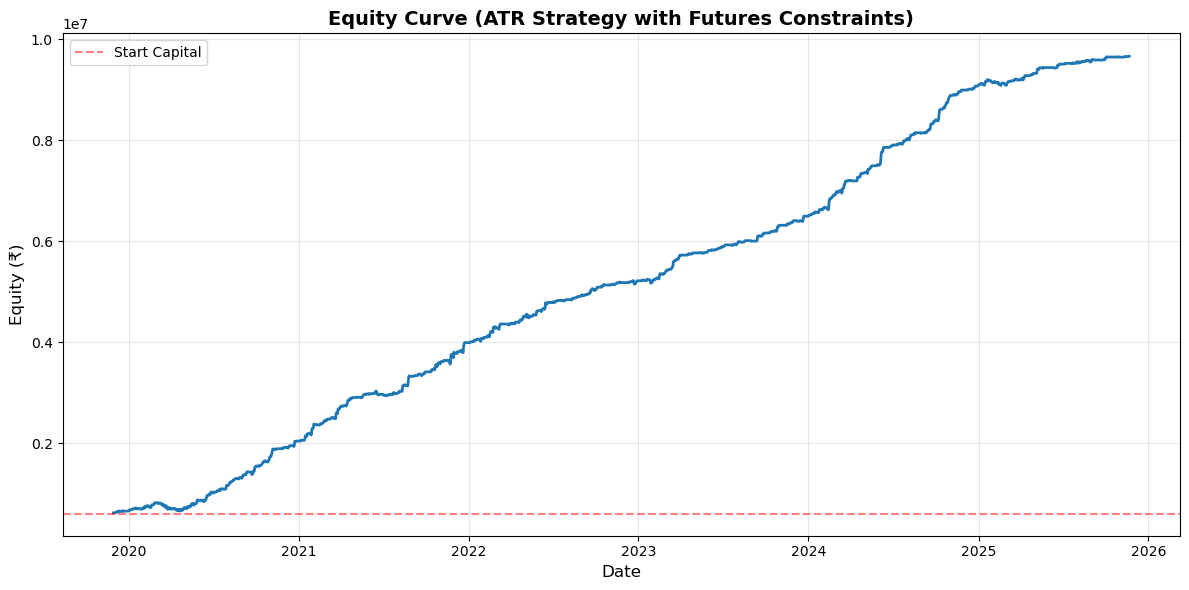

Drawdown chart saved to: C:\Users\sarda\Desktop\fibonacci_analysis\Drawdown_Chart_ATR_FuturesSim.png


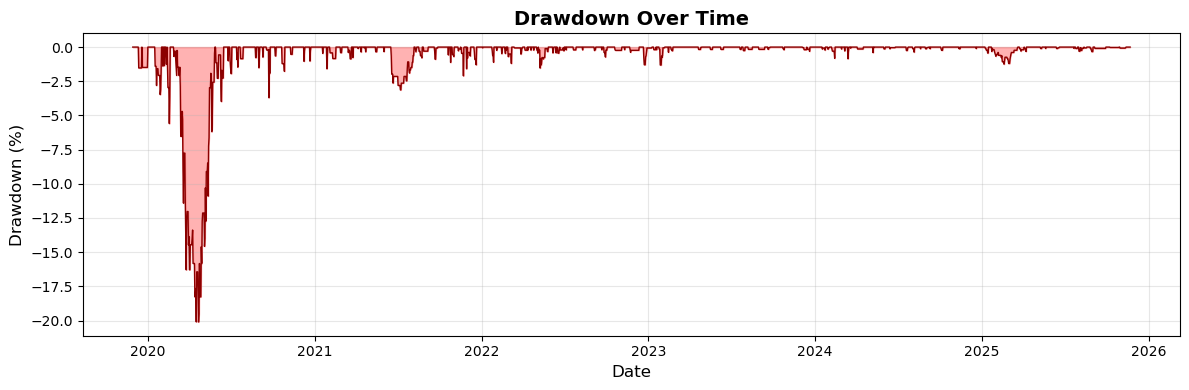


✓ Analysis complete!
Available variables: strategy_summary, equity_series, trades_cleaned


In [5]:
import os
import math
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from scipy import stats

plt.rcParams.update({'figure.max_open_warning': 0})

# ---------------- USER CONFIG ----------------
OUT_ROOT = r"C:\Users\sarda\Desktop"
OUT_DIR = os.path.join(OUT_ROOT, "fibonacci_analysis")
os.makedirs(OUT_DIR, exist_ok=True)

# Filenames to search
POSSIBLE_FILES = [
    "Executed_Trades_ATR_Futures_Sim.xlsx",
    "Executed_Trades_ATR_Futures_Sim.csv",
    "Executed_Trades_Futures_Sim.xlsx",
    "Executed_Trades_Futures_Sim.csv",
    "Executed_Trades_Cleaned.xlsx",
    "Detailed_Trade_Log_ATR.xlsx",
    "Detailed_Trade_Log.xlsx"
]

# Match simulation parameters
START_CAPITAL = 600_000.0
MARGIN_PER_LOT = 150_000.0
# ---------------------------------------------

# 1) Try to load trades DataFrame from notebook variables
trades_df = None
for name in ("df_ex", "executed_trades", "trades_df", "trades_cleaned", "df", "all_trades"):
    if name in globals() and isinstance(globals()[name], pd.DataFrame):
        trades_df = globals()[name].copy()
        print(f"Loaded trades from notebook variable: '{name}' ({len(trades_df)} rows)")
        break

# 2) If not found, try loading from disk
if trades_df is None:
    found = False
    # Check current directory
    for fn in POSSIBLE_FILES:
        full = os.path.join(os.getcwd(), fn)
        if os.path.exists(full):
            trades_path = full
            found = True
            break
    # Check OUT_DIR
    if not found:
        for fn in POSSIBLE_FILES:
            full = os.path.join(OUT_DIR, fn)
            if os.path.exists(full):
                trades_path = full
                found = True
                break
    
    if found:
        print(f"Loading trades from file: {trades_path}")
        try:
            if trades_path.lower().endswith(".csv"):
                trades_df = pd.read_csv(trades_path)
            else:
                trades_df = pd.read_excel(trades_path)
            print(f"Loaded {len(trades_df)} rows from '{trades_path}'")
        except Exception as e:
            raise RuntimeError(f"Failed to read '{trades_path}': {e}")
    else:
        raise FileNotFoundError(
            f"Could not find executed trades. Checked files: {POSSIBLE_FILES}\n"
            f"Place 'Executed_Trades_ATR_Futures_Sim.xlsx' in current directory or {OUT_DIR}"
        )

# Normalize column names
cols_map = {c.lower().strip(): c for c in trades_df.columns}

def find_col(candidate_names):
    for name in candidate_names:
        low = name.lower()
        if low in cols_map:
            return cols_map[low]
    return None

# Identify key columns
entry_col = find_col(["entry date","entry_date","entrydate","entry","actual entry date"])
exit_col  = find_col(["exit date","exit_date","exitdate","exit","actual exit date"])
pnl_col   = find_col(["pnl","p&l","pnl.1","realized pnl","actual pnl","pnl_amt"])
pos_size_col = find_col(["position size","position_size","notional","position"])
days_col = find_col(["days held","days_held","daysheld","days"])
stock_col = find_col(["stock","symbol","ticker"])

# Validate PnL column
if pnl_col is None:
    possible_numeric = [c for c in trades_df.columns if trades_df[c].dtype.kind in "fi"]
    raise ValueError(
        f"Could not find PnL column. Expected names like 'PnL' or 'P&L'.\n"
        f"Available columns: {list(trades_df.columns)}\n"
        f"Numeric columns: {possible_numeric}"
    )

# Parse dates
if entry_col is not None:
    trades_df[entry_col] = pd.to_datetime(trades_df[entry_col], errors='coerce')
if exit_col is not None:
    trades_df[exit_col] = pd.to_datetime(trades_df[exit_col], errors='coerce')

# Fallback for missing exit dates
if exit_col is None or trades_df[exit_col].isna().all():
    if entry_col is None:
        trades_df["Exit Date"] = pd.to_datetime("today")
    else:
        trades_df["Exit Date"] = pd.to_datetime(trades_df[entry_col])
    exit_col = "Exit Date"

# Ensure PnL is numeric
trades_df[pnl_col] = pd.to_numeric(trades_df[pnl_col], errors='coerce').fillna(0.0)

# Sort by exit date
trades_df = trades_df.sort_values(exit_col).reset_index(drop=True)

# Build daily equity curve
first_date = trades_df[exit_col].min()
last_date  = trades_df[exit_col].max()

if pd.isna(first_date) or pd.isna(last_date):
    raise ValueError("Exit dates are invalid or missing.")

all_days = pd.date_range(start=first_date.date(), end=last_date.date(), freq='D')
equity = pd.Series(index=all_days, dtype=float)
current_cash = float(START_CAPITAL)

# Sum PnL by exit date
pnl_by_date = trades_df.groupby(exit_col)[pnl_col].sum()
pnl_by_date.index = pd.to_datetime(pnl_by_date.index).normalize()

for day in all_days:
    if day in pnl_by_date.index:
        current_cash += float(pnl_by_date.loc[day])
    equity.loc[day] = current_cash

equity = equity.ffill().fillna(START_CAPITAL)
daily_returns = equity.pct_change().fillna(0.0)

# ---------- Metrics ----------
def annualize_return(total_return, days):
    years = days / 365.25
    if years <= 0:
        return np.nan
    return (1.0 + total_return) ** (1.0/years) - 1.0

total_return = (equity.iloc[-1] / equity.iloc[0]) - 1.0
num_days = (equity.index[-1] - equity.index[0]).days if equity.index[-1] != equity.index[0] else 1
CAGR = annualize_return(total_return, num_days)

ann_vol = daily_returns.std(ddof=1) * np.sqrt(252)
ann_return = daily_returns.mean() * 252
sharpe = ann_return / ann_vol if ann_vol > 0 else np.nan

# Sortino
downside_returns = daily_returns.copy()
downside_returns[downside_returns > 0] = 0.0
downside_std = np.sqrt((downside_returns**2).mean()) * np.sqrt(252)
sortino = ann_return / downside_std if downside_std > 0 else np.nan

# Drawdown
cum_max = equity.cummax()
drawdown = (equity - cum_max) / cum_max
max_drawdown = drawdown.min()
is_draw = equity < cum_max
max_dd_duration = 0
curr = 0
for flag in is_draw:
    if flag:
        curr += 1
        if curr > max_dd_duration:
            max_dd_duration = curr
    else:
        curr = 0

calmar = CAGR / abs(max_drawdown) if max_drawdown < 0 else np.nan

# Trade stats
total_trades = len(trades_df)
wins = trades_df[trades_df[pnl_col] > 0]
losses = trades_df[trades_df[pnl_col] < 0]
win_count = len(wins)
loss_count = len(losses)
win_rate = (win_count / total_trades * 100) if total_trades > 0 else np.nan
avg_win = wins[pnl_col].mean() if win_count > 0 else 0.0
avg_loss = losses[pnl_col].mean() if loss_count > 0 else 0.0
gross_profit = wins[pnl_col].sum() if win_count > 0 else 0.0
gross_loss = -losses[pnl_col].sum() if loss_count > 0 else 0.0
profit_factor = (gross_profit / gross_loss) if gross_loss > 0 else np.nan
expectancy = (win_rate/100.0) * avg_win + (1 - win_rate/100.0) * avg_loss

# Average holding period
avg_holding = None
if days_col is not None and days_col in trades_df.columns:
    avg_holding = trades_df[days_col].mean()
elif 'Days Held' in trades_df.columns:
    avg_holding = trades_df['Days Held'].mean()

years = num_days / 365.25
trades_per_year = total_trades / years if years > 0 else np.nan

# Win/loss streaks
pnl_signs = np.sign(trades_df[pnl_col].fillna(0.0))
max_win_streak = 0
max_loss_streak = 0
cur_win = cur_loss = 0
for s in pnl_signs:
    if s > 0:
        cur_win += 1
        cur_loss = 0
    elif s < 0:
        cur_loss += 1
        cur_win = 0
    else:
        cur_win = cur_loss = 0
    max_win_streak = max(max_win_streak, cur_win)
    max_loss_streak = max(max_loss_streak, cur_loss)

# Distribution moments
pnl_skew = float(stats.skew(trades_df[pnl_col])) if total_trades > 2 else np.nan
pnl_kurt = float(stats.kurtosis(trades_df[pnl_col], fisher=False)) if total_trades > 3 else np.nan
num_negative_days = int((daily_returns < 0).sum())

# Average return per trade
if pos_size_col is not None and pos_size_col in trades_df.columns:
    avg_return_pct = (trades_df[pnl_col] / trades_df[pos_size_col]).mean() * 100
else:
    avg_return_pct = np.nan

summary = {
    "Start Capital": float(START_CAPITAL),
    "End Capital": float(equity.iloc[-1]),
    "Total Return (%)": float(total_return * 100),
    "CAGR (%)": float(CAGR * 100) if not np.isnan(CAGR) else np.nan,
    "Annualized Vol (%)": float(ann_vol * 100),
    "Annualized Return (%)": float(ann_return * 100),
    "Sharpe (ann)": float(sharpe) if not np.isnan(sharpe) else np.nan,
    "Sortino (ann)": float(sortino) if not np.isnan(sortino) else np.nan,
    "Max Drawdown (%)": float(max_drawdown * 100),
    "Max Drawdown Days": int(max_dd_duration),
    "Calmar": float(calmar) if not np.isnan(calmar) else np.nan,
    "Total Trades": int(total_trades),
    "Winning Trades": int(win_count),
    "Losing Trades": int(loss_count),
    "Win Rate (%)": float(win_rate),
    "Average Winning Trade": float(avg_win),
    "Average Losing Trade": float(avg_loss),
    "Gross Profit": float(gross_profit),
    "Gross Loss": float(gross_loss),
    "Profit Factor": float(profit_factor) if not np.isnan(profit_factor) else np.nan,
    "Expectancy per Trade": float(expectancy),
    "Avg Return per Trade (%)": float(avg_return_pct) if not np.isnan(avg_return_pct) else None,
    "Avg Holding Days": float(avg_holding) if avg_holding is not None else None,
    "Trades per Year": float(trades_per_year),
    "Longest Win Streak": int(max_win_streak),
    "Longest Loss Streak": int(max_loss_streak),
    "PnL Skewness": float(pnl_skew) if not np.isnan(pnl_skew) else np.nan,
    "PnL Kurtosis": float(pnl_kurt) if not np.isnan(pnl_kurt) else np.nan,
    "Equity Negative Days": int(num_negative_days)
}

# ---------- Save outputs ----------
summary_df = pd.DataFrame.from_dict(summary, orient='index', columns=['Value'])
summary_path = os.path.join(OUT_DIR, "Strategy_Metrics_Summary_ATR_FuturesSim.xlsx")
summary_df.to_excel(summary_path)

equity_df = equity.rename("Equity").reset_index().rename(columns={"index":"Date"})
equity_path = os.path.join(OUT_DIR, "Equity_Curve_Daily_ATR_FuturesSim.xlsx")
equity_df.to_excel(equity_path, index=False)

trades_out = trades_df.copy()
trades_out.columns = [str(c) for c in trades_out.columns]
trades_path_out = os.path.join(OUT_DIR, "Executed_Trades_Cleaned_ATR_FuturesSim.xlsx")
trades_out.to_excel(trades_path_out, index=False)

print("\n✓ Metrics computed and files saved:")
print(f" - {summary_path}")
print(f" - {equity_path}")
print(f" - {trades_path_out}")

# Pretty-print summary
print("\n" + "="*80)
print("STRATEGY PERFORMANCE SUMMARY (ATR + Futures Constraints)")
print("="*80)
for k, v in summary.items():
    if isinstance(v, float):
        if pd.isna(v):
            fmt = "NaN"
        else:
            fmt = f"{v:,.2f}"
    elif v is None:
        fmt = "N/A"
    else:
        fmt = v
    print(f"{k:30s}: {fmt}")
print("="*80)

# ---------- Additional Analysis ----------
# Exit reason breakdown
if 'Exit Reason' in trades_df.columns or 'exit reason' in trades_df.columns:
    exit_reason_col = find_col(['exit reason', 'exitreason', 'exit_reason'])
    if exit_reason_col:
        print("\nExit Reason Breakdown:")
        print(trades_df[exit_reason_col].value_counts())
        print()

# Monthly returns if sufficient data
if len(equity) > 30:
    monthly_equity = equity.resample('M').last()
    monthly_returns = monthly_equity.pct_change().dropna()
    print(f"Best Month: {monthly_returns.max()*100:.2f}%")
    print(f"Worst Month: {monthly_returns.min()*100:.2f}%")
    print(f"Average Month: {monthly_returns.mean()*100:.2f}%")
    print()

# ---------- Plot equity curve ----------
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(equity.index, equity.values, linewidth=2)
ax.set_title("Equity Curve (ATR Strategy with Futures Constraints)", fontsize=14, fontweight='bold')
ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("Equity (₹)", fontsize=12)
ax.grid(True, alpha=0.3)
ax.axhline(y=START_CAPITAL, color='red', linestyle='--', alpha=0.5, label='Start Capital')
ax.legend()
plt.tight_layout()
plot_path = os.path.join(OUT_DIR, "Equity_Curve_ATR_FuturesSim.png")
plt.savefig(plot_path, dpi=150)
print(f"Equity curve saved to: {plot_path}")
plt.show()

# Drawdown plot
fig, ax = plt.subplots(figsize=(12, 4))
ax.fill_between(drawdown.index, drawdown.values * 100, 0, alpha=0.3, color='red')
ax.plot(drawdown.index, drawdown.values * 100, color='darkred', linewidth=1)
ax.set_title("Drawdown Over Time", fontsize=14, fontweight='bold')
ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("Drawdown (%)", fontsize=12)
ax.grid(True, alpha=0.3)
plt.tight_layout()
dd_plot_path = os.path.join(OUT_DIR, "Drawdown_Chart_ATR_FuturesSim.png")
plt.savefig(dd_plot_path, dpi=150)
print(f"Drawdown chart saved to: {dd_plot_path}")
plt.show()

# Expose for interactive use
globals()['strategy_summary'] = summary
globals()['equity_series'] = equity
globals()['trades_cleaned'] = trades_df

print("\n✓ Analysis complete!")
print("Available variables: strategy_summary, equity_series, trades_cleaned")

MODIFIED FIB

In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
import warnings
warnings.filterwarnings('ignore')

# ---------- CONFIG ----------
VERBOSE = True            # set False to silence progress prints
BACKTEST_YEARS = 4
POSITION_SIZE = 500000    # used by execute_trade PnL calculations (kept as in your code)
MAX_HOLD_DAYS = 60       # approx 2 months trading sessions
MONITOR_MONTHS = 6

# Futures / capital constraints (your new rules)
START_CAPITAL = 600_000      # starting trading capital (₹)
MARGIN_PER_LOT = 150_000     # margin required per open futures lot (₹)
# ----------------------------

# --- stocks list (unchanged) ---
stocks = [
    'NSE:360ONE', 'NSE:ABB', 'NSE:ADANIENSOL', 'NSE:ADANIENT', 'NSE:ADANIGREEN', 'NSE:ADANIPORTS',
    'NSE:ATGL', 'NSE:ABCAPITAL', 'NSE:ABFRL', 'NSE:ALKEM', 'NSE:AMBER', 'NSE:AMBUJACEM',
    'NSE:ANGELONE', 'NSE:APLAPOLLO', 'NSE:APOLLOHOSP', 'NSE:ASHOKLEY', 'NSE:ASIANPAINT',
    'NSE:ASTRAL', 'NSE:AUBANK', 'NSE:AUROPHARMA', 'NSE:DMART', 'NSE:AXISBANK', 'NSE:BAJAJ-AUTO',
    'NSE:BAJFINANCE', 'NSE:BAJAJFINSV', 'NSE:BANDHANBNK', 'NSE:BANKBARODA', 'NSE:BANKINDIA',
    'NSE:BDL', 'NSE:BEL', 'NSE:BHARATFORG', 'NSE:BHEL', 'NSE:BPCL', 'NSE:BHARTIARTL',
    'NSE:BIOCON', 'NSE:BLUESTARCO', 'NSE:BOSCHLTD', 'NSE:BRITANNIA', 'NSE:BSE', 'NSE:CANBK',
    'NSE:CDSL', 'NSE:CESC', 'NSE:CGPOWER', 'NSE:CHOLAFIN', 'NSE:CIPLA', 'NSE:COALINDIA',
    'NSE:COFORGE', 'NSE:COLPAL', 'NSE:CAMS', 'NSE:CONCOR', 'NSE:CROMPTON', 'NSE:CUMMINSIND',
    'NSE:CYIENT', 'NSE:DABUR', 'NSE:DALBHARAT', 'NSE:DELHIVERY', 'NSE:DIVISLAB', 'NSE:DIXON',
    'NSE:DLF', 'NSE:DRREDDY', 'NSE:EICHERMOT', 'NSE:ETERNAL', 'NSE:EXIDEIND', 'NSE:FORTIS',
    'NSE:NYKAA', 'NSE:GAIL', 'NSE:GLENMARK', 'NSE:GMRAIRPORT', 'NSE:GODREJCP', 'NSE:GODREJPROP',
    'NSE:GRANULES', 'NSE:GRASIM', 'NSE:HAVELLS', 'NSE:HCLTECH', 'NSE:HDFCAMC', 'NSE:HDFCBANK',
    'NSE:HDFCLIFE', 'NSE:HEROMOTOCO', 'NSE:HFCL', 'NSE:HINDALCO', 'NSE:HAL', 'NSE:HINDPETRO',
    'NSE:HINDUNILVR', 'NSE:HINDZINC', 'NSE:HUDCO', 'NSE:ICICIBANK', 'NSE:ICICIGI', 'NSE:ICICIPRULI',
    'NSE:IDEA', 'NSE:IDFCFIRSTB', 'NSE:IIFL', 'NSE:INDIANB', 'NSE:IEX', 'NSE:IOC', 'NSE:IRCTC',
    'NSE:IRFC', 'NSE:IREDA', 'NSE:IGL', 'NSE:INDUSTOWER', 'NSE:INDUSINDBK', 'NSE:NAUKRI',
    'NSE:INFY', 'NSE:INOXWIND', 'NSE:INDIGO', 'NSE:IRB', 'NSE:ITC', 'NSE:JSL', 'NSE:JINDALSTEL',
    'NSE:JIOFIN', 'NSE:JSWENERGY', 'NSE:JSWSTEEL', 'NSE:JUBLFOOD', 'NSE:KALYANKJIL', 'NSE:KAYNES',
    'NSE:KEI', 'NSE:KFINTECH', 'NSE:KOTAKBANK', 'NSE:KPITTECH', 'NSE:LTF', 'NSE:LT', 'NSE:LAURUSLABS',
    'NSE:LICHSGFIN', 'NSE:LICI', 'NSE:LTIM', 'NSE:LUPIN', 'NSE:LODHA', 'NSE:MANAPPURAM',
    'NSE:MANKIND', 'NSE:MARICO', 'NSE:MARUTI', 'NSE:MFSL', 'NSE:MAXHEALTH', 'NSE:MAZDOCK',
    'NSE:MOTHERSON', 'NSE:MPHASIS', 'NSE:MCX', 'NSE:MUTHOOTFIN', 'NSE:NATIONALUM', 'NSE:NBCC',
    'NSE:NCC', 'NSE:NESTLEIND', 'NSE:NHPC', 'NSE:^NSEI', 'NSE:^NSEBANK','NSE:NMDC', 'NSE:NTPC', 'NSE:NUVAMA',
    'NSE:OBEROIRLTY', 'NSE:ONGC', 'NSE:OIL', 'NSE:PAYTM', 'NSE:OFSS', 'NSE:PAGEIND', 'NSE:PATANJALI',
    'NSE:POLICYBZR', 'NSE:PERSISTENT', 'NSE:PETRONET', 'NSE:PGEL', 'NSE:PIIND', 'NSE:PIDILITIND',
    'NSE:PPLPHARMA', 'NSE:PNBHOUSING', 'NSE:POLYCAB', 'NSE:POONAWALLA', 'NSE:PFC', 'NSE:POWERGRID',
    'NSE:PRESTIGE', 'NSE:PNB', 'NSE:RVNL', 'NSE:RBLBANK', 'NSE:RELIANCE', 'NSE:RECLTD', 'NSE:SBICARD',
    'NSE:SBILIFE', 'NSE:SHREECEM', 'NSE:SHRIRAMFIN', 'NSE:SIEMENS', 'NSE:SJVN', 'NSE:SOLARINDS',
    'NSE:SONACOMS', 'NSE:SRF', 'NSE:SBIN', 'NSE:SAIL', 'NSE:SUNPHARMA', 'NSE:SUPREMEIND', 'NSE:SUZLON',
    'NSE:SYNGENE', 'NSE:TATACHEM', 'NSE:TCS', 'NSE:TATACONSUM', 'NSE:TATAELXSI', 'NSE:TATAMOTORS',
    'NSE:TATAPOWER', 'NSE:TATASTEEL', 'NSE:TATATECH', 'NSE:TECHM', 'NSE:FEDERALBNK', 'NSE:INDHOTEL',
    'NSE:PHOENIXLTD', 'NSE:TITAGARH', 'NSE:TITAN', 'NSE:TORNTPHARM', 'NSE:TORNTPOWER', 'NSE:TRENT',
    'NSE:TIINDIA', 'NSE:TVSMOTOR', 'NSE:ULTRACEMCO', 'NSE:UNIONBANK', 'NSE:UNITDSPR', 'NSE:UNOMINDA',
    'NSE:UPL', 'NSE:VBL', 'NSE:VEDL', 'NSE:VOLTAS', 'NSE:WIPRO', 'NSE:YESBANK', 'NSE:ZYDUSLIFE'
]
# Transform stock symbols to yfinance format
exceptions = {'^NSEI', '^NSEBANK'}
transformed_stocks = []
for s in stocks:
    symbol = s.split(':', 1)[1].strip() if ':' in s else s.strip()
    symbol_up = symbol.upper()
    if symbol_up in exceptions:
        transformed_stocks.append(symbol_up)
    else:
        transformed_stocks.append(symbol_up + '.NS')

# --- header ---
print("="*80)
print("FIBONACCI 0.786 BACKTEST (LATEST-UPMOVE-ONLY) with FUTURES MARGIN SIM")
print("="*80)
print(f"Start capital: ₹{START_CAPITAL:,} | Margin per lot: ₹{MARGIN_PER_LOT:,}")
print(f"Backtest years: {BACKTEST_YEARS} | Position notional used for PnL: ₹{POSITION_SIZE:,}")
print("="*80)

# ------------------ helpers (same logic, slightly adapted) ------------------
def fetch_stock_data_for_period(stock, start_date, end_date):
    try:
        if pd.to_datetime(end_date) <= pd.to_datetime(start_date):
            return None
        ticker = yf.Ticker(stock)
        data = ticker.history(start=start_date, end=end_date, interval="1d")
        if data is None or len(data) == 0:
            return None
        data.index = data.index.tz_localize(None)
        return data
    except Exception:
        return None

def analyze_green_candles_period(data):
    if data is None or len(data) == 0:
        return []
    data = data.copy()
    data['Is Green'] = data['Close'] > data['Open']
    streak_start = None
    streak_low = None
    valid_streaks = []
    for i in range(len(data)):
        row = data.iloc[i]
        if row['Is Green']:
            if streak_start is None:
                streak_start = row.name
                streak_low = row['Low']
            streak_high = row['High']
        else:
            if streak_start is not None:
                change = ((streak_high - streak_low) / streak_low) * 100
                if change >= 14:
                    valid_streaks.append({
                        "Start Date": streak_start,
                        "End Date": data.iloc[i-1].name,
                        "Streak Low": streak_low,
                        "Streak High": streak_high,
                        "Total Change (%)": round(change, 2)
                    })
                streak_start = None
                streak_low = None
    # last open streak
    if streak_start is not None:
        change = ((streak_high - streak_low) / streak_low) * 100
        if change >= 14:
            valid_streaks.append({
                "Start Date": streak_start,
                "End Date": data.index[-1],
                "Streak Low": streak_low,
                "Streak High": streak_high,
                "Total Change (%)": round(change, 2)
            })
    return valid_streaks

def calculate_fib_and_find_entry(stock, data, streak, monitor_end_date):
    try:
        start_date = pd.to_datetime(streak['Start Date'])
        end_date = pd.to_datetime(streak['End Date'])
        monitor_end_date = pd.to_datetime(monitor_end_date)
        window_data = data[data.index <= monitor_end_date]
        if window_data.empty:
            return None
        # streak slice
        try:
            streak_slice = window_data.loc[start_date:end_date]
        except Exception:
            idx_start = window_data.index.get_indexer([start_date], method='nearest')[0]
            idx_end = window_data.index.get_indexer([end_date], method='nearest')[0]
            streak_slice = window_data.iloc[idx_start:idx_end+1] if idx_start is not None and idx_end is not None else pd.DataFrame()
        if streak_slice.empty:
            return None
        # starting_low
        try:
            first_candle_idx = window_data.index.get_loc(start_date)
        except KeyError:
            first_candle_idx = window_data.index.get_indexer([start_date], method='nearest')[0]
        if first_candle_idx > 0:
            previous_candle_low = window_data.iloc[first_candle_idx - 1]['Low']
            first_candle_low = streak['Streak Low']
            starting_low = min(previous_candle_low, first_candle_low)
        else:
            starting_low = streak['Streak Low']
        initial_peak = streak['Streak High']
        try:
            end_idx = window_data.index.get_loc(end_date)
        except KeyError:
            end_idx = window_data.index.get_indexer([end_date], method='nearest')[0]
        if end_idx + 1 >= len(window_data):
            return None
        monitoring_data = window_data.iloc[end_idx + 1:]
        if monitoring_data.empty:
            return None
        current_peak = initial_peak
        for monitor_date, row in monitoring_data.iterrows():
            if row['High'] > current_peak:
                current_peak = row['High']
            fib_786_level = current_peak - 0.786 * (current_peak - starting_low)
            lower_bound = fib_786_level * 0.9925
            upper_bound = fib_786_level * 1.0075
            candle_prices = [row['Low'], row['High'], row['Open'], row['Close']]
            if any(lower_bound <= p <= upper_bound for p in candle_prices):
                touching_prices = [p for p in candle_prices if lower_bound <= p <= upper_bound]
                entry_price = min(touching_prices, key=lambda x: abs(x - fib_786_level))
                # stop at 1-level behavior and target at 1.5x earlier in your original code
                stop_loss = starting_low * (1 - 0.002)
                points_to_sl = entry_price - stop_loss
                if points_to_sl <= 0:
                    return None
                target = entry_price + (points_to_sl * 1.5)
                return {
                    'stock': stock,
                    'streak_start_date': start_date,
                    'touch_date': monitor_date,
                    'entry_date': monitor_date,
                    'entry_price': round(entry_price, 2),
                    'stop_loss': round(stop_loss, 2),
                    'target': round(target, 2),
                    'starting_low': round(starting_low, 2),
                    'final_peak': round(current_peak, 2),
                    'fib_786_level': round(fib_786_level, 2),
                    'streak_end': end_date
                }
        return None
    except Exception:
        return None

def execute_trade(stock, trade_setup, full_data):
    """
    Use your original execute_trade logic: simulate forward up to MAX_HOLD_DAYS from entry.
    Returns dict with Exit Date and PnL etc. (same format as you used earlier).
    """
    entry_date = trade_setup['entry_date']
    entry_price = trade_setup['entry_price']
    stop_loss = trade_setup['stop_loss']
    target = trade_setup['target']
    future_data = full_data[full_data.index > entry_date].head(MAX_HOLD_DAYS)
    if len(future_data) == 0:
        return None
    position_size = POSITION_SIZE
    quantity = position_size / entry_price
    for exit_date, row in future_data.iterrows():
        if row['High'] >= target:
            pnl = (target - entry_price) * quantity
            return {
                'Stock': stock,
                'Entry Date': entry_date.strftime('%Y-%m-%d'),
                'Exit Date': exit_date.strftime('%Y-%m-%d'),
                'Entry Price': entry_price,
                'Exit Price': round(target, 2),
                'Exit Reason': 'Target Hit',
                'PnL': round(pnl, 2),
                'Quantity': round(quantity, 2),
                'Position Size': position_size,
                'Days Held': (exit_date - entry_date).days,
                'trade_setup': trade_setup
            }
        if row['Low'] <= stop_loss:
            exit_price = row['Low']
            pnl = (exit_price - entry_price) * quantity
            return {
                'Stock': stock,
                'Entry Date': entry_date.strftime('%Y-%m-%d'),
                'Exit Date': exit_date.strftime('%Y-%m-%d'),
                'Entry Price': entry_price,
                'Exit Price': round(exit_price, 2),
                'Exit Reason': 'Stop Loss Hit',
                'PnL': round(pnl, 2),
                'Quantity': round(quantity, 2),
                'Position Size': position_size,
                'Days Held': (exit_date - entry_date).days,
                'trade_setup': trade_setup
            }
    # time exit
    last_row = future_data.iloc[-1]
    exit_price = last_row['Close']
    pnl = (exit_price - entry_price) * quantity
    return {
        'Stock': stock,
        'Entry Date': entry_date.strftime('%Y-%m-%d'),
        'Exit Date': future_data.index[-1].strftime('%Y-%m-%d'),
        'Entry Price': entry_price,
        'Exit Price': round(exit_price, 2),
        'Exit Reason': 'Time Exit (2 months)',
        'PnL': round(pnl, 2),
        'Quantity': round(quantity, 2),
        'Position Size': position_size,
        'Days Held': (future_data.index[-1] - entry_date).days,
        'trade_setup': trade_setup
    }

# ---------------- Gather all possible setups & simulated outcomes ----------------
today = datetime.now()
start_backtest = today - relativedelta(years=BACKTEST_YEARS)

setups = []   # will store dicts containing simulated result for each setup (entry+exit info)
stocks_processed = 0

if VERBOSE: print("Scanning universe for setups and simulating each to compute exit / pnl ...")

for stock in transformed_stocks:
    stocks_processed += 1
    if VERBOSE:
        print(f"[{stocks_processed}/{len(transformed_stocks)}] Fetching {stock} history {start_backtest.date()} -> {today.date()} ...", end=' ')
    full_data = fetch_stock_data_for_period(stock, start_backtest, today + relativedelta(days=1))
    if full_data is None or len(full_data) == 0:
        if VERBOSE: print("NO DATA")
        continue
    if VERBOSE: print(f"OK ({len(full_data)} rows)")

    streaks = analyze_green_candles_period(full_data)
    if len(streaks) == 0:
        if VERBOSE: print("  -> no streaks")
        continue
    streaks = sorted(streaks, key=lambda s: pd.to_datetime(s['Start Date']))

    # For latest-upmove-only rule we replace earlier streaks with later ones as you asked.
    active_opportunity = None
    for streak in streaks:
        sstart = pd.to_datetime(streak['Start Date'])
        send = pd.to_datetime(streak['End Date'])
        # When new streak appears, it becomes active and supersedes older one (as requested)
        active_opportunity = {
            'streak_start': sstart,
            'streak_end': send,
            'expiry': sstart + relativedelta(months=MONITOR_MONTHS),
            'streak_obj': streak
        }
        monitor_end = min(active_opportunity['expiry'], pd.to_datetime(today))
        # ensure we have sufficient data to monitor
        if full_data.index.max() < monitor_end:
            ext = fetch_stock_data_for_period(stock, start_backtest, monitor_end + relativedelta(days=1))
            if ext is not None and len(ext) > 0:
                full_data = ext
        # find an entry (if any) for this active upmove
        setup = calculate_fib_and_find_entry(stock, full_data, streak, monitor_end)
        if setup is not None:
            # simulate the trade to determine exit date and PnL
            sim = execute_trade(stock, setup, full_data)
            if sim is None:
                continue
            # normalize entry/exit to timestamps and attach metadata
            sim['stock'] = stock
            sim['entry_ts'] = pd.to_datetime(sim['Entry Date'])
            sim['exit_ts'] = pd.to_datetime(sim['Exit Date'])
            sim['trade_setup'] = setup
            setups.append(sim)
            if VERBOSE:
                print(f"    [Setup] {stock} entry {sim['Entry Date']} exit {sim['Exit Date']} PnL ₹{sim['PnL']:,}")
        else:
            if VERBOSE:
                print(f"    [NoTouch] {stock} streak {sstart.date()} none by {monitor_end.date()}")

# if no setups found
if len(setups) == 0:
    print("No setups found in backtest window. Exiting.")
    raise SystemExit

# ---------------- Build chronological event stream ----------------
# For each simulated setup we create two events: entry and exit
events = []
for i, s in enumerate(setups):
    events.append({'date': s['entry_ts'], 'type': 'entry', 'id': i})
    events.append({'date': s['exit_ts'],  'type': 'exit',  'id': i})

# Sort events: by date, and for same date process exits before entries to free margin (but we handle same-day entry-exit specially)
def event_sort_key(ev):
    # type priority: exit first (0), entry second (1)
    priority = 0 if ev['type'] == 'exit' else 1
    return (ev['date'], priority)
events.sort(key=event_sort_key)

# ---------------- Event-driven capital & position simulation ----------------
cash = float(START_CAPITAL)
locked_margin = 0.0
open_positions = {}   # id -> sim dict (only those actually opened)
executed_trades = []  # record of trades actually executed (opened and later closed)

def current_capacity(cash_amt):
    return int(cash_amt // MARGIN_PER_LOT)

if VERBOSE:
    print("\nStarting event-driven simulation ...")
    print(f"Initial cash: ₹{cash:,.2f} | initial capacity (slots): {current_capacity(cash)}")

# Track whether a setup was attempted but skipped due to capacity
skipped_setups = 0

for ev in events:
    ev_date = ev['date']
    ev_type = ev['type']
    sid = ev['id']
    s = setups[sid]
    # process exit event
    if ev_type == 'exit':
        # If this setup was opened earlier, close it now
        if sid in open_positions:
            sim = open_positions.pop(sid)
            # free margin
            cash += MARGIN_PER_LOT
            locked_margin -= MARGIN_PER_LOT
            # add realized PnL
            cash += float(sim['PnL'])
            # record executed trade result (augment with actual open/close)
            rec = sim.copy()
            rec['Actual Entry Date'] = rec['Entry Date']
            rec['Actual Exit Date'] = rec['Exit Date']
            rec['Actual PnL'] = rec['PnL']
            rec['Used Margin'] = MARGIN_PER_LOT
            executed_trades.append(rec)
            if VERBOSE:
                print(f"[{ev_date.date()}] EXIT  {sim['Stock']} closed. PnL ₹{sim['PnL']:,}. Cash now ₹{cash:,.2f} | slots free: {current_capacity(cash) - len(open_positions)}")
        else:
            # Not opened (either skipped due to full capacity when entry fired), but maybe entry==exit same day and capacity available now.
            # If entry and exit are same date and capacity available, we try to open then immediately close.
            # Check if this setup's entry date == exit date and capacity available
            if s['entry_ts'] == s['exit_ts']:
                capacity = current_capacity(cash)
                if len(open_positions) < capacity:
                    # open then immediately close
                    # open: lock margin
                    cash -= MARGIN_PER_LOT
                    locked_margin += MARGIN_PER_LOT
                    # simulate immediate close: free margin + add PnL
                    cash += MARGIN_PER_LOT
                    cash += float(s['PnL'])
                    rec = s.copy()
                    rec['Actual Entry Date'] = rec['Entry Date']
                    rec['Actual Exit Date'] = rec['Exit Date']
                    rec['Actual PnL'] = rec['PnL']
                    rec['Used Margin'] = MARGIN_PER_LOT
                    executed_trades.append(rec)
                    if VERBOSE:
                        print(f"[{ev_date.date()}] SAME-DAY ENTRY/EXIT {s['Stock']} executed. PnL ₹{s['PnL']:,}. Cash now ₹{cash:,.2f}")
                else:
                    # cannot open because no capacity at that moment
                    skipped_setups += 1
                    if VERBOSE:
                        print(f"[{ev_date.date()}] SAME-DAY {s['Stock']} skipped (no capacity).")
            else:
                # normal exit for a trade that was never opened - ignore
                if VERBOSE:
                    print(f"[{ev_date.date()}] EXIT event for {s['Stock']} ignored (was not opened).")
    else:
        # entry event: attempt to open according to FCFS and capacity
        capacity = current_capacity(cash)
        if len(open_positions) < capacity:
            # open trade: lock margin and keep the simulated trade in open_positions
            open_positions[sid] = s
            cash -= MARGIN_PER_LOT
            locked_margin += MARGIN_PER_LOT
            if VERBOSE:
                print(f"[{ev_date.date()}] OPEN   {s['Stock']} opened. Entry {s['Entry Date']}. Slots used: {len(open_positions)}/{capacity}. Cash remaining ₹{cash:,.2f}")
        else:
            # no capacity - skip this setup (FCFS)
            skipped_setups += 1
            if VERBOSE:
                print(f"[{ev_date.date()}] SKIP   {s['Stock']} entry skipped (no free margin slot).")

# After all events, if any open positions remain (shouldn't happen since we added exit events), close them at their simulated exit (already handled)
# But to be safe, finalize any open positions (force close at their simulated exit and account PnL)
if len(open_positions) > 0:
    if VERBOSE: print("\nFinalizing leftover open positions (should be none)...")
    for sid, sim in list(open_positions.items()):
        # free margin and add pnl
        cash += MARGIN_PER_LOT
        locked_margin -= MARGIN_PER_LOT
        cash += float(sim['PnL'])
        rec = sim.copy()
        rec['Actual Entry Date'] = rec['Entry Date']
        rec['Actual Exit Date'] = rec['Exit Date']
        rec['Actual PnL'] = rec['PnL']
        rec['Used Margin'] = MARGIN_PER_LOT
        executed_trades.append(rec)
        if VERBOSE:
            print(f"Finalized {sim['Stock']} PnL ₹{sim['PnL']:,}. Cash now ₹{cash:,.2f}")
    open_positions.clear()

# ---------------- Postprocess & metrics for executed trades ----------------
print("\n✓ Simulation complete.")
print(f"Start capital: ₹{START_CAPITAL:,} | End capital: ₹{cash:,.2f} | Skipped setups: {skipped_setups}")
print(f"Executed trades: {len(executed_trades)}")

if len(executed_trades) == 0:
    print("No executed trades under margin constraints. Try increasing BACKTEST_YEARS, or relax margin/capacity to test.")
else:
    df_ex = pd.DataFrame(executed_trades)
    # sanitize columns: Entry/Exit as datetime
    df_ex['Entry Date'] = pd.to_datetime(df_ex['Entry Date'])
    df_ex['Exit Date'] = pd.to_datetime(df_ex['Exit Date'])
    # Keep consistent column names used earlier
    df_ex.rename(columns={'Entry Date':'Entry Date', 'Exit Date':'Exit Date', 'PnL':'PnL'}, inplace=True)
    # Save
    df_ex.to_excel('Executed_Trades_Futures_Sim.xlsx', index=False)
    print("Saved 'Executed_Trades_Futures_Sim.xlsx'")

    # Metrics similar to previous block
    total_trades = len(df_ex)
    winning_trades = len(df_ex[df_ex['PnL'] > 0])
    losing_trades = len(df_ex[df_ex['PnL'] < 0])
    win_rate = (winning_trades / total_trades * 100) if total_trades > 0 else 0
    total_pnl = df_ex['PnL'].sum()
    avg_return_per_trade = (df_ex['PnL'] / df_ex['Position Size']).mean() * 100
    winning_df = df_ex[df_ex['PnL'] > 0]
    losing_df = df_ex[df_ex['PnL'] < 0]
    avg_win = winning_df['PnL'].mean() if len(winning_df) > 0 else 0
    avg_loss = losing_df['PnL'].mean() if len(losing_df) > 0 else 0
    gross_profit = winning_df['PnL'].sum() if len(winning_df) > 0 else 0
    gross_loss = abs(losing_df['PnL'].sum()) if len(losing_df) > 0 else 0
    profit_factor = (gross_profit / gross_loss) if gross_loss > 0 else float('inf')
    expectancy = (win_rate/100 * avg_win) + ((1 - win_rate/100) * avg_loss)
    best_trade = df_ex.loc[df_ex['PnL'].idxmax()] if len(df_ex) > 0 else None
    worst_trade = df_ex.loc[df_ex['PnL'].idxmin()] if len(df_ex) > 0 else None
    avg_holding_days = df_ex['Days Held'].mean()

    print("\n" + "="*80)
    print("FUTURES SIMULATION PERFORMANCE METRICS")
    print("="*80)
    print(f"Total Executed Trades: {total_trades}")
    print(f"Winning Trades: {winning_trades}")
    print(f"Losing Trades: {losing_trades}")
    print(f"Win Rate: {win_rate:.2f}%")
    print(f"Total PnL (realized added to cash): ₹{total_pnl:,.2f}")
    print(f"Ending Cash: ₹{cash:,.2f}")
    print(f"Average Return (PnL / position size): {avg_return_per_trade:.4f}%")
    print(f"Average Winning Trade: ₹{avg_win:,.2f}")
    print(f"Average Losing Trade: ₹{avg_loss:,.2f}")
    print(f"Profit Factor: {profit_factor:.2f}")
    print(f"Expectancy per Trade: ₹{expectancy:.2f}")
    print(f"Average Holding Period: {avg_holding_days:.1f} days")
    if best_trade is not None:
        print(f"Best Trade: {best_trade['Stock']} | Entry: {best_trade['Entry Date'].date()} | PnL: ₹{best_trade['PnL']:,.2f}")
    if worst_trade is not None:
        print(f"Worst Trade: {worst_trade['Stock']} | Entry: {worst_trade['Entry Date'].date()} | PnL: ₹{worst_trade['PnL']:,.2f}")
    print("\nSaved executed trades to 'Executed_Trades_Futures_Sim.xlsx' for inspection.")

FIBONACCI 0.786 BACKTEST (LATEST-UPMOVE-ONLY) with FUTURES MARGIN SIM
Start capital: ₹600,000 | Margin per lot: ₹150,000
Backtest years: 4 | Position notional used for PnL: ₹500,000
Scanning universe for setups and simulating each to compute exit / pnl ...
[1/217] Fetching 360ONE.NS history 2021-11-20 -> 2025-11-20 ... OK (990 rows)
    [Setup] 360ONE.NS entry 2023-12-19 exit 2023-12-28 PnL ₹24,327.28
    [Setup] 360ONE.NS entry 2024-04-22 exit 2024-04-24 PnL ₹35,741.86
    [NoTouch] 360ONE.NS streak 2024-06-26 none by 2024-12-26
    [Setup] 360ONE.NS entry 2025-03-19 exit 2025-03-24 PnL ₹38,154.14
    [NoTouch] 360ONE.NS streak 2025-04-11 none by 2025-10-11
[2/217] Fetching ABB.NS history 2021-11-20 -> 2025-11-20 ... OK (991 rows)
    [Setup] ABB.NS entry 2021-12-20 exit 2021-12-22 PnL ₹32,071.31
    [Setup] ABB.NS entry 2022-09-26 exit 2022-10-06 PnL ₹32,047.97
    [NoTouch] ABB.NS streak 2023-04-24 none by 2023-10-24
    [NoTouch] ABB.NS streak 2024-02-20 none by 2024-08-20
    [NoT

Loaded trades DataFrame from notebook variable: 'df_ex' (rows: 536)

✓ Metrics computed and files saved:
 - C:\Users\sarda\Desktop\fibonacci_analysis\Strategy_Metrics_Summary_FuturesSim.xlsx
 - C:\Users\sarda\Desktop\fibonacci_analysis\Equity_Curve_Daily_FuturesSim.xlsx
 - C:\Users\sarda\Desktop\fibonacci_analysis\Executed_Trades_Cleaned_FuturesSim.xlsx

SUMMARY (top-level):
Start Capital                 : 600,000.00
End Capital                   : 3,661,406.79
Total Return (%)              : 476.49
CAGR (%)                      : 55.42
Annualized Vol (%)            : 41.05
Annualized Return (%)         : 38.37
Sharpe (ann)                  : 0.93
Sortino (ann)                 : 1.60
Max Drawdown (%)              : -58.26
Max Drawdown Days             : 396
Calmar                        : 0.95
Total Trades                  : 536
Winning Trades                : 293
Losing Trades                 : 243
Win Rate (%)                  : 54.66
Average Winning Trade         : 41,728.43
Average

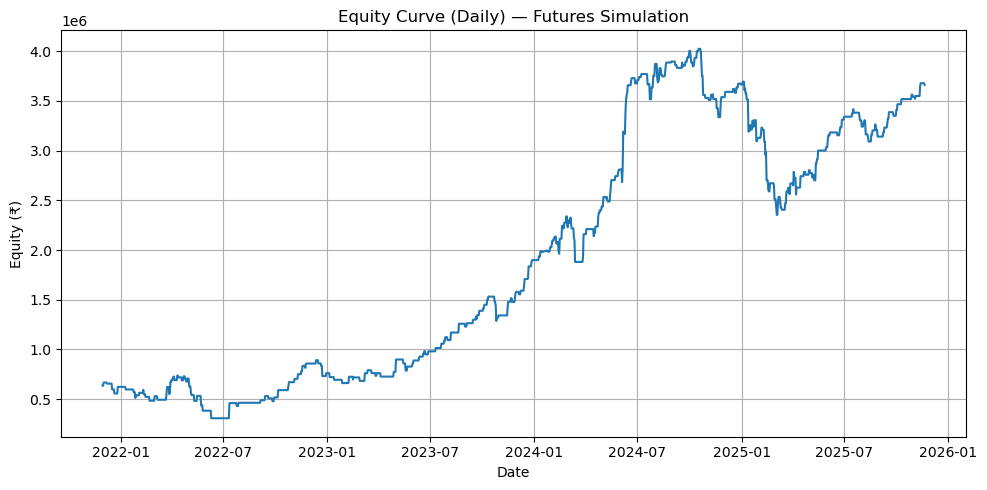


Done — available variables in notebook: strategy_summary, equity_series, trades_cleaned


In [5]:
# Cell 21 — Futures simulation performance & trader-oriented metrics
# Saves outputs into C:\Users\sarda\Desktop\fibonacci_analysis
import os
import math
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from scipy import stats

plt.rcParams.update({'figure.max_open_warning': 0})

# ---------------- USER CONFIG ----------------
OUT_ROOT = r"C:\Users\sarda\Desktop"
OUT_DIR = os.path.join(OUT_ROOT, "fibonacci_analysis")
os.makedirs(OUT_DIR, exist_ok=True)

# Filenames to search if trades df not in-memory
POSSIBLE_FILES = [
    "Executed_Trades_Futures_Sim.xlsx",
    "Executed_Trades_Futures_Sim.csv",
    "Executed_Trades_Futures_Sim.xls",
    "Executed_Trades_Cleaned.xlsx",
    "Executed_Trades_Cleaned.csv",
    "Detailed_Trade_Log2.xlsx",
    "Detailed_Trade_Log.xlsx"
]

# Match your simulation parameters for reporting (used only for labels)
START_CAPITAL = 600_000.0
MARGIN_PER_LOT = 150_000.0
# ---------------------------------------------

# 1) Try to load trades DataFrame from notebook variables (safe check)
trades_df = None
for name in ("df_ex", "executed_trades", "trades_df", "trades_cleaned", "trades_df_unique", "trades_executed"):
    if name in globals() and isinstance(globals()[name], pd.DataFrame):
        trades_df = globals()[name].copy()
        print(f"Loaded trades DataFrame from notebook variable: '{name}' (rows: {len(trades_df)})")
        break

# 2) If not found, try to load from disk (cwd and OUT_DIR)
if trades_df is None:
    found = False
    # check current working dir
    for fn in POSSIBLE_FILES:
        full = os.path.join(os.getcwd(), fn)
        if os.path.exists(full):
            trades_path = full
            found = True
            break
    # check OUT_DIR as well
    if not found:
        for fn in POSSIBLE_FILES:
            full = os.path.join(OUT_DIR, fn)
            if os.path.exists(full):
                trades_path = full
                found = True
                break
    if found:
        print(f"Loading trades from file: {trades_path}")
        try:
            if trades_path.lower().endswith(".csv"):
                trades_df = pd.read_csv(trades_path)
            else:
                trades_df = pd.read_excel(trades_path)
            print(f"Loaded {len(trades_df)} rows from '{trades_path}'")
        except Exception as e:
            raise RuntimeError(f"Failed to read trades file '{trades_path}': {e}")
    else:
        raise FileNotFoundError(
            "Could not find executed trades DataFrame in memory or any known files.\n"
            f"Checked notebook variables and filenames: {POSSIBLE_FILES}\n"
            f"Place 'Executed_Trades_Futures_Sim.xlsx' (or one of POSSIBLE_FILES) in the notebook working directory or in {OUT_DIR},\n"
            "or run the simulation cell so the trades DataFrame exists in memory."
        )

# Normalize column names map (lower -> original)
cols_map = {c.lower().strip(): c for c in trades_df.columns}

def find_col(candidate_names):
    for name in candidate_names:
        low = name.lower()
        if low in cols_map:
            return cols_map[low]
    return None

# Identify key columns (robust to name differences)
entry_col = find_col(["entry date","entry_date","entrydate","entry"])
exit_col  = find_col(["exit date","exit_date","exitdate","exit"])
pnl_col   = find_col(["pnl","p&l","pnl.1","realized pnl","realised pnl","pnl_amt","pnl_amount","actual pnl"])
pos_size_col = find_col(["position size","position_size","notional","position"])
days_col = find_col(["days held","days_held","daysheld","days"])

# Validate PnL col
if pnl_col is None:
    # show helpful message
    possible_numeric = [c for c in trades_df.columns if trades_df[c].dtype.kind in "fi"]
    raise ValueError("Could not find a PnL column in the trades DataFrame. Expected names like 'PnL' or 'P&L'.\n"
                     f"Available columns: {list(trades_df.columns)}\n"
                     f"Numeric columns: {possible_numeric}")

# Parse dates if present
if entry_col is not None:
    trades_df[entry_col] = pd.to_datetime(trades_df[entry_col], errors='coerce')
if exit_col is not None:
    trades_df[exit_col] = pd.to_datetime(trades_df[exit_col], errors='coerce')

# If exit date missing or all NaT, fallback to entry date
if exit_col is None or trades_df[exit_col].isna().all():
    if entry_col is None:
        trades_df["Exit Date"] = pd.to_datetime("today")
    else:
        trades_df["Exit Date"] = pd.to_datetime(trades_df[entry_col])
    exit_col = "Exit Date"

# Ensure PnL numeric
trades_df[pnl_col] = pd.to_numeric(trades_df[pnl_col], errors='coerce').fillna(0.0)

# Sort by exit date (we credit cash at exit)
trades_df = trades_df.sort_values(exit_col).reset_index(drop=True)

# Build daily equity by crediting realized PnL on each trade's exit date
first_date = trades_df[exit_col].min()
last_date  = trades_df[exit_col].max()
if pd.isna(first_date) or pd.isna(last_date):
    raise ValueError("Exit dates appear invalid or missing in the trades DataFrame.")

all_days = pd.date_range(start=first_date.date(), end=last_date.date(), freq='D')
equity = pd.Series(index=all_days, dtype=float)
current_cash = float(START_CAPITAL)

# sum PnL by exit date for speed
pnl_by_date = trades_df.groupby(exit_col)[pnl_col].sum()
pnl_by_date.index = pd.to_datetime(pnl_by_date.index).normalize()

for day in all_days:
    if day in pnl_by_date.index:
        current_cash += float(pnl_by_date.loc[day])
    equity.loc[day] = current_cash

equity = equity.ffill().fillna(START_CAPITAL)
daily_returns = equity.pct_change().fillna(0.0)

# ---------- Metrics ----------
def annualize_return(total_return, days):
    years = days / 365.25
    if years <= 0:
        return np.nan
    return (1.0 + total_return) ** (1.0/years) - 1.0

total_return = (equity.iloc[-1] / equity.iloc[0]) - 1.0
num_days = (equity.index[-1] - equity.index[0]).days if equity.index[-1] != equity.index[0] else 1
CAGR = annualize_return(total_return, num_days)

ann_vol = daily_returns.std(ddof=1) * np.sqrt(252)
ann_return = daily_returns.mean() * 252
sharpe = ann_return / ann_vol if ann_vol > 0 else np.nan

# Sortino
downside_returns = daily_returns.copy()
downside_returns[downside_returns > 0] = 0.0
downside_std = np.sqrt((downside_returns**2).mean()) * np.sqrt(252)
sortino = ann_return / downside_std if downside_std > 0 else np.nan

# Drawdown
cum_max = equity.cummax()
drawdown = (equity - cum_max) / cum_max
max_drawdown = drawdown.min()
is_draw = equity < cum_max
max_dd_duration = 0
curr = 0
for flag in is_draw:
    if flag:
        curr += 1
        if curr > max_dd_duration:
            max_dd_duration = curr
    else:
        curr = 0

calmar = CAGR / abs(max_drawdown) if max_drawdown < 0 else np.nan

# Trade stats
total_trades = len(trades_df)
wins = trades_df[trades_df[pnl_col] > 0]
losses = trades_df[trades_df[pnl_col] < 0]
win_count = len(wins)
loss_count = len(losses)
win_rate = (win_count / total_trades * 100) if total_trades > 0 else np.nan
avg_win = wins[pnl_col].mean() if win_count>0 else 0.0
avg_loss = losses[pnl_col].mean() if loss_count>0 else 0.0
gross_profit = wins[pnl_col].sum() if win_count>0 else 0.0
gross_loss = -losses[pnl_col].sum() if loss_count>0 else 0.0
profit_factor = (gross_profit / gross_loss) if gross_loss>0 else np.nan
expectancy = (win_rate/100.0) * avg_win + (1 - win_rate/100.0) * avg_loss

# Avg holding period if column exists
avg_holding = None
if days_col is not None and days_col in trades_df.columns:
    avg_holding = trades_df[days_col].mean()
elif 'Days Held' in trades_df.columns:
    avg_holding = trades_df['Days Held'].mean()

years = num_days / 365.25
trades_per_year = total_trades / years if years>0 else np.nan

# win/loss streaks
pnl_signs = np.sign(trades_df[pnl_col].fillna(0.0))
max_win_streak = 0
max_loss_streak = 0
cur_win = cur_loss = 0
for s in pnl_signs:
    if s > 0:
        cur_win += 1
        cur_loss = 0
    elif s < 0:
        cur_loss += 1
        cur_win = 0
    else:
        cur_win = cur_loss = 0
    max_win_streak = max(max_win_streak, cur_win)
    max_loss_streak = max(max_loss_streak, cur_loss)

# distribution moments
pnl_skew = float(stats.skew(trades_df[pnl_col])) if total_trades>2 else np.nan
pnl_kurt = float(stats.kurtosis(trades_df[pnl_col], fisher=False)) if total_trades>3 else np.nan
num_negative_days = int((daily_returns < 0).sum())

summary = {
    "Start Capital": float(START_CAPITAL),
    "End Capital": float(equity.iloc[-1]),
    "Total Return (%)": float(total_return * 100),
    "CAGR (%)": float(CAGR * 100) if not np.isnan(CAGR) else np.nan,
    "Annualized Vol (%)": float(ann_vol * 100),
    "Annualized Return (%)": float(ann_return * 100),
    "Sharpe (ann)": float(sharpe) if not np.isnan(sharpe) else np.nan,
    "Sortino (ann)": float(sortino) if not np.isnan(sortino) else np.nan,
    "Max Drawdown (%)": float(max_drawdown * 100),
    "Max Drawdown Days": int(max_dd_duration),
    "Calmar": float(calmar) if not np.isnan(calmar) else np.nan,
    "Total Trades": int(total_trades),
    "Winning Trades": int(win_count),
    "Losing Trades": int(loss_count),
    "Win Rate (%)": float(win_rate),
    "Average Winning Trade": float(avg_win),
    "Average Losing Trade": float(avg_loss),
    "Gross Profit": float(gross_profit),
    "Gross Loss": float(gross_loss),
    "Profit Factor": float(profit_factor) if not np.isnan(profit_factor) else np.nan,
    "Expectancy per Trade": float(expectancy),
    "Avg Holding Days": float(avg_holding) if avg_holding is not None else None,
    "Trades per Year": float(trades_per_year),
    "Longest Win Streak": int(max_win_streak),
    "Longest Loss Streak": int(max_loss_streak),
    "PnL Skewness": float(pnl_skew) if not np.isnan(pnl_skew) else np.nan,
    "PnL Kurtosis": float(pnl_kurt) if not np.isnan(pnl_kurt) else np.nan,
    "Equity Negative Days": int(num_negative_days)
}

# ---------- Save outputs to OUT_DIR ----------
summary_df = pd.DataFrame.from_dict(summary, orient='index', columns=['Value'])
summary_path = os.path.join(OUT_DIR, "Strategy_Metrics_Summary_FuturesSim.xlsx")
summary_df.to_excel(summary_path)

equity_df = equity.rename("Equity").reset_index().rename(columns={"index":"Date"})
equity_path = os.path.join(OUT_DIR, "Equity_Curve_Daily_FuturesSim.xlsx")
equity_df.to_excel(equity_path, index=False)

trades_out = trades_df.copy()
# normalize column names for saving
trades_out.columns = [str(c) for c in trades_out.columns]
trades_path_out = os.path.join(OUT_DIR, "Executed_Trades_Cleaned_FuturesSim.xlsx")
trades_out.to_excel(trades_path_out, index=False)

print("\n✓ Metrics computed and files saved:")
print(" -", summary_path)
print(" -", equity_path)
print(" -", trades_path_out)

# Pretty-print summary to console
print("\nSUMMARY (top-level):")
for k,v in summary.items():
    if isinstance(v, float):
        if pd.isna(v):
            fmt = "NaN"
        else:
            fmt = f"{v:,.2f}"
    else:
        fmt = v
    print(f"{k:30s}: {fmt}")

# ---------- Plot equity curve ----------
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(equity.index, equity.values)
ax.set_title("Equity Curve (Daily) — Futures Simulation")
ax.set_xlabel("Date")
ax.set_ylabel("Equity (₹)")
ax.grid(True)
plt.tight_layout()
plt.show()

# expose for interactive use
globals()['strategy_summary'] = summary
globals()['equity_series'] = equity
globals()['trades_cleaned'] = trades_df

print("\nDone — available variables in notebook: strategy_summary, equity_series, trades_cleaned")

In [7]:
# Cell 22 — Open Positions Tracker (paste & run after your simulation cell)
import os
import pandas as pd
import numpy as np
from datetime import datetime
from pathlib import Path

# ---------- USER CONFIG ----------
OUT_ROOT = r"C:\Users\sarda\Desktop"
OUT_DIR = os.path.join(OUT_ROOT, "fibonacci_analysis")
os.makedirs(OUT_DIR, exist_ok=True)

# Possible in-memory variable names that might contain executed trades
IN_MEMORY_NAMES = ["executed_trades", "df_ex", "trades_cleaned", "trades_df", "trades_df_unique", "executed_trades_df"]

# Possible filenames to search (cwd and OUT_DIR)
POSSIBLE_FILES = [
    "Executed_Trades_Futures_Sim.xlsx",
    "Executed_Trades_Futures_Sim.csv",
    "Executed_Trades_Futures_Sim.xls",
    "Executed_Trades_Cleaned.xlsx",
    "Executed_Trades_Cleaned.csv",
    "Detailed_Trade_Log2.xlsx",
    "Detailed_Trade_Log.xlsx"
]

# 1) Try to load trades DataFrame from memory
trades_df = None
for name in IN_MEMORY_NAMES:
    if name in globals() and isinstance(globals()[name], pd.DataFrame):
        trades_df = globals()[name].copy()
        print(f"Loaded trades from in-memory variable '{name}' ({len(trades_df)} rows).")
        break

# 2) If not present, search files in cwd and OUT_DIR
if trades_df is None:
    cwd = Path.cwd()
    found_path = None
    for fn in POSSIBLE_FILES:
        p = cwd / fn
        if p.exists():
            found_path = p
            break
    if found_path is None:
        for fn in POSSIBLE_FILES:
            p = Path(OUT_DIR) / fn
            if p.exists():
                found_path = p
                break
    if found_path is None:
        raise FileNotFoundError(
            f"Couldn't find executed trades. Checked in-memory names {IN_MEMORY_NAMES} and files {POSSIBLE_FILES} "
            f"in current working dir and {OUT_DIR}."
        )
    print(f"Loading trades from file: {found_path}")
    if found_path.suffix.lower() == ".csv":
        trades_df = pd.read_csv(found_path)
    else:
        trades_df = pd.read_excel(found_path)
    print(f"Loaded {len(trades_df)} rows from {found_path.name}.")

# Normalize columns map
cols_map = {c.lower().strip(): c for c in trades_df.columns}

def find_col(candidates):
    for c in candidates:
        low = c.lower()
        if low in cols_map:
            return cols_map[low]
    return None

# Find key columns (robust)
stock_col = find_col(["actual stock","stock","symbol","ticker"])
entry_col = find_col(["actual entry date","actual_entry_date","entry date","entry_date","entrydate","entry"])
exit_col  = find_col(["actual exit date","actual_exit_date","exit date","exit_date","exitdate","exit"])
entry_price_col = find_col(["entry price","entry_price","entryprice"])
exit_price_col  = find_col(["exit price","exit_price","exitprice"])
pnl_col = find_col(["actual pnl","pnl","p&l","realized pnl","pnl_amount"])

if stock_col is None:
    raise ValueError(f"Could not find a stock column. Columns found: {list(trades_df.columns)}")

# Fall back if needed
if entry_col is None:
    entry_col = find_col(["entry date","entry_date","entry"])
if exit_col is None:
    exit_col = find_col(["exit date","exit_date","exit"])

if entry_col is None or exit_col is None:
    raise ValueError("Entry/Exit date columns not found. Expected columns like 'Entry Date' and 'Exit Date'.")

# Parse datetimes and normalize to date (no time)
trades_df[entry_col] = pd.to_datetime(trades_df[entry_col], errors='coerce').dt.normalize()
trades_df[exit_col]  = pd.to_datetime(trades_df[exit_col],  errors='coerce').dt.normalize()

# Ensure Entry Price / Exit Price columns exist (try extracting from trade_setup dict if present)
if entry_price_col is None:
    if 'Entry Price' in trades_df.columns:
        entry_price_col = 'Entry Price'
    elif 'trade_setup' in trades_df.columns:
        trades_df['Entry Price'] = trades_df['trade_setup'].apply(lambda x: x.get('entry_price') if isinstance(x, dict) else np.nan)
        entry_price_col = 'Entry Price'
    else:
        trades_df['Entry Price'] = np.nan
        entry_price_col = 'Entry Price'
else:
    trades_df['Entry Price'] = pd.to_numeric(trades_df[entry_price_col], errors='coerce')

if exit_price_col is None:
    if 'Exit Price' in trades_df.columns:
        exit_price_col = 'Exit Price'
    else:
        trades_df['Exit Price'] = np.nan
        exit_price_col = 'Exit Price'
else:
    trades_df['Exit Price'] = pd.to_numeric(trades_df[exit_price_col], errors='coerce')

# Filter out invalid rows
valid_mask = (~trades_df[entry_col].isna()) & (~trades_df[exit_col].isna())
if valid_mask.sum() == 0:
    raise ValueError("No trades with valid Entry and Exit dates found.")
trades_df = trades_df.loc[valid_mask].reset_index(drop=True)

# Build setups structure
setups = []
for idx, row in trades_df.iterrows():
    setups.append({
        'id': idx,
        'stock': row[stock_col],
        'entry_dt': pd.to_datetime(row[entry_col]),
        'exit_dt': pd.to_datetime(row[exit_col]),
        'entry_price': float(row.get('Entry Price', np.nan)) if not pd.isna(row.get('Entry Price', np.nan)) else np.nan,
        'exit_price': float(row.get('Exit Price', np.nan)) if not pd.isna(row.get('Exit Price', np.nan)) else np.nan
    })

# Build events list (entry + exit)
events = []
for s in setups:
    events.append({'date': s['entry_dt'], 'type': 'entry', 'id': s['id']})
    events.append({'date': s['exit_dt'],  'type': 'exit',  'id': s['id']})

# Sorting rule:
# - For different trades: process exits before entries (so exits free capacity first)
# - For same trade where entry==exit (same-day), process entry before exit so we show same-day open->close
def event_sort_key(ev):
    ev_date = ev['date']
    ev_id = ev['id']
    ev_type = ev['type']
    s = next((x for x in setups if x['id'] == ev_id), None)
    same_day = s is not None and (s['entry_dt'].normalize() == s['exit_dt'].normalize())
    # exits first generally, but if exit belongs to a same-day trade then delay exit after entry
    if ev_type == 'exit' and not same_day:
        priority = 0
    else:
        priority = 1
    tie = 0 if ev_type == 'entry' else 1
    return (ev_date, priority, tie)

events.sort(key=event_sort_key)

# Iterate events and capture open positions snapshot after each event
open_positions = {}  # id -> dict
timeline = []
for ev in events:
    ev_date = ev['date'].normalize()
    ev_type = ev['type']
    sid = ev['id']
    s = next((x for x in setups if x['id'] == sid), None)
    if s is None:
        continue
    stock = s['stock']
    if ev_type == 'entry':
        # open it
        open_positions[sid] = {
            'Stock': stock,
            'Entry Date': s['entry_dt'].date(),
            'Entry Price': s['entry_price']
        }
        action = 'Opened'
    else:
        # exit: remove if present
        if sid in open_positions:
            pos = open_positions.pop(sid)
            pos['Exit Date'] = s['exit_dt'].date()
            pos['Exit Price'] = s['exit_price']
            action = 'Closed'
        else:
            action = 'Ignored Exit'  # trade was not open in our timeline (e.g., skipped earlier)

    # Create human-readable snapshot string
    if len(open_positions) == 0:
        open_str = ""
    else:
        items = sorted(open_positions.values(), key=lambda x: pd.to_datetime(x['Entry Date']))
        open_str = "; ".join([
            f"{it['Stock']}@{it['Entry Price']:.2f} ({it['Entry Date']})" if not pd.isna(it['Entry Price']) else f"{it['Stock']} ({it['Entry Date']})"
            for it in items
        ])

    timeline.append({
        'Event Date': ev_date.date(),
        'Event Type': ev_type,
        'Stock': stock,
        'Action': action,
        'Entry Date': s['entry_dt'].date(),
        'Exit Date': s['exit_dt'].date(),
        'Entry Price': s['entry_price'],
        'Exit Price': s['exit_price'],
        'Open Positions After': open_str,
        'Open Positions Count': len(open_positions)
    })

# Save timeline to Excel and CSV in OUT_DIR
timeline_df = pd.DataFrame(timeline)
timeline_df = timeline_df.sort_values(['Event Date', 'Event Type']).reset_index(drop=True)

out_xlsx = os.path.join(OUT_DIR, "Open_Positions_Timeline.xlsx")
out_csv  = os.path.join(OUT_DIR, "Open_Positions_Timeline.csv")
timeline_df.to_excel(out_xlsx, index=False)
timeline_df.to_csv(out_csv, index=False)

# Also save final open positions snapshot
final_open = []
for sid, pos in open_positions.items():
    final_open.append({
        'Stock': pos['Stock'],
        'Entry Date': pos['Entry Date'],
        'Entry Price': pos['Entry Price']
    })
final_open_df = pd.DataFrame(final_open)
final_out = os.path.join(OUT_DIR, "Final_Open_Positions.xlsx")
final_open_df.to_excel(final_out, index=False)

print(f"Saved timeline -> {out_xlsx} ({len(timeline_df)} rows)")
print(f"Saved timeline CSV -> {out_csv}")
print(f"Saved final open positions -> {final_out} ({len(final_open_df)} rows)")

# Expose dataframes for interactive notebook usage
globals()['open_positions_timeline_df'] = timeline_df
globals()['final_open_positions_df'] = final_open_df

print("Done. Variables available: open_positions_timeline_df, final_open_positions_df")

Loaded trades from in-memory variable 'df_ex' (1428 rows).
Saved timeline -> C:\Users\sarda\Desktop\fibonacci_analysis\Open_Positions_Timeline.xlsx (2856 rows)
Saved timeline CSV -> C:\Users\sarda\Desktop\fibonacci_analysis\Open_Positions_Timeline.csv
Saved final open positions -> C:\Users\sarda\Desktop\fibonacci_analysis\Final_Open_Positions.xlsx (0 rows)
Done. Variables available: open_positions_timeline_df, final_open_positions_df


In [9]:
# Cell 22 — Open Positions Tracker (fixed + snapshots)
import os
from pathlib import Path
import pandas as pd
import numpy as np
from datetime import datetime

# ---------- USER CONFIG ----------
OUT_ROOT = r"C:\Users\sarda\Desktop"
OUT_DIR = os.path.join(OUT_ROOT, "fibonacci_analysis")
os.makedirs(OUT_DIR, exist_ok=True)

# Names to look for in-memory (from your notebook)
IN_MEMORY_NAMES = [
    "executed_trades", "df_ex", "trades_cleaned", "trades_df", "trades_df_unique",
    "executed_trades_df", "Executed_Trades_Futures_Sim", "executed_trades"
]

# File names to search (cwd then OUT_DIR)
POSSIBLE_FILES = [
    "Executed_Trades_Futures_Sim.xlsx",
    "Executed_Trades_Futures_Sim.csv",
    "Executed_Trades_Cleaned.xlsx",
    "Executed_Trades_Cleaned.csv",
    "Detailed_Trade_Log2.xlsx",
    "Detailed_Trade_Log.xlsx",
    "Detailed_Trade_Log2.csv",
    "Executed_Trades_Futures_Sim.csv"
]
# ----------------------------------

def load_trades_from_memory():
    for name in IN_MEMORY_NAMES:
        if name in globals() and isinstance(globals()[name], pd.DataFrame):
            df = globals()[name].copy()
            print(f"Loaded trades DataFrame from memory variable '{name}' ({len(df)} rows).")
            return df
    return None

def load_trades_from_file():
    cwd = Path.cwd()
    # check CWD
    for fn in POSSIBLE_FILES:
        p = cwd / fn
        if p.exists():
            print(f"Loading trades from file (cwd): {p}")
            return p
    # check OUT_DIR
    outp = Path(OUT_DIR)
    for fn in POSSIBLE_FILES:
        p = outp / fn
        if p.exists():
            print(f"Loading trades from file (OUT_DIR): {p}")
            return p
    return None

# 1) try memory
trades_df = load_trades_from_memory()

# 2) try files
if trades_df is None:
    path = load_trades_from_file()
    if path is None:
        raise FileNotFoundError(
            "Could not find executed trades DataFrame in memory or files. "
            f"Place one of {POSSIBLE_FILES} in the notebook CWD or {OUT_DIR}, or run the simulation cell so a DataFrame exists in memory."
        )
    # load file
    if path.suffix.lower() == ".csv":
        trades_df = pd.read_csv(path)
    else:
        trades_df = pd.read_excel(path)
    print(f"Loaded {len(trades_df)} rows from {path.name}.")

# Normalize column names map (lowercase -> original)
cols_map = {c.lower().strip(): c for c in trades_df.columns}

def find_col(candidates):
    for c in candidates:
        if c.lower() in cols_map:
            return cols_map[c.lower()]
    return None

# Find common column names robustly
stock_col = find_col(["actual stock","stock","symbol","ticker","Stock"])
entry_col = find_col(["actual entry date","actual_entry_date","entry date","entry_date","entrydate","entry","Entry Date"])
exit_col  = find_col(["actual exit date","actual_exit_date","exit date","exit_date","exitdate","exit","Exit Date"])
entry_price_col = find_col(["entry price","entry_price","entryprice","Entry Price"])
exit_price_col  = find_col(["exit price","exit_price","exitprice","Exit Price"])
pnl_col = find_col(["actual pnl","actual_pnl","pnl","p&l","realized pnl","pnl_amount"])

# Basic validations / fallbacks
if stock_col is None:
    # try any column called 'Stock' ignoring case
    candidates = [c for c in trades_df.columns if c.lower() in ("stock","symbol","ticker")]
    if candidates:
        stock_col = candidates[0]
if stock_col is None:
    raise ValueError(f"Could not locate a stock column. Columns found: {list(trades_df.columns)}")

if entry_col is None:
    entry_col = find_col(["entry date","entry_date","entry"])
if exit_col is None:
    exit_col = find_col(["exit date","exit_date","exit"])

if entry_col is None or exit_col is None:
    raise ValueError(
        "Could not find Entry/Exit date columns. Expected names like 'Entry Date' and 'Exit Date' "
        f"— available columns: {list(trades_df.columns)}"
    )

# Coerce datetimes and normalize to date (no tz/time)
trades_df[entry_col] = pd.to_datetime(trades_df[entry_col], errors="coerce").dt.normalize()
trades_df[exit_col]  = pd.to_datetime(trades_df[exit_col],  errors="coerce").dt.normalize()

# Ensure entry/exit price columns exist (try extracting from nested 'trade_setup' if present)
if entry_price_col is None:
    if 'Entry Price' in trades_df.columns:
        entry_price_col = 'Entry Price'
    elif 'trade_setup' in trades_df.columns:
        trades_df['Entry Price'] = trades_df['trade_setup'].apply(lambda x: x.get('entry_price') if isinstance(x, dict) else np.nan)
        entry_price_col = 'Entry Price'
    else:
        trades_df['Entry Price'] = np.nan
        entry_price_col = 'Entry Price'
else:
    trades_df['Entry Price'] = pd.to_numeric(trades_df[entry_price_col], errors='coerce')

if exit_price_col is None:
    if 'Exit Price' in trades_df.columns:
        exit_price_col = 'Exit Price'
    else:
        trades_df['Exit Price'] = np.nan
        exit_price_col = 'Exit Price'
else:
    trades_df['Exit Price'] = pd.to_numeric(trades_df[exit_price_col], errors='coerce')

# Filter rows that have both entry & exit dates (we need both to build timeline)
valid_mask = (~trades_df[entry_col].isna()) & (~trades_df[exit_col].isna())
if valid_mask.sum() == 0:
    raise ValueError("No valid trades with both Entry and Exit dates found in the trades DataFrame.")
trades_df = trades_df.loc[valid_mask].reset_index(drop=True)

# Build setups list (id -> meta)
setups = []
for idx, row in trades_df.iterrows():
    entry_dt = pd.to_datetime(row[entry_col])
    exit_dt  = pd.to_datetime(row[exit_col])
    setups.append({
        "id": idx,
        "stock": str(row[stock_col]),
        "entry_dt": entry_dt,
        "exit_dt": exit_dt,
        "entry_price": float(row.get('Entry Price', np.nan)) if not pd.isna(row.get('Entry Price', np.nan)) else np.nan,
        "exit_price": float(row.get('Exit Price', np.nan)) if not pd.isna(row.get('Exit Price', np.nan)) else np.nan,
    })

# Build events (entry + exit per setup)
events = []
for s in setups:
    events.append({"date": s["entry_dt"], "type":"entry", "id": s["id"]})
    events.append({"date": s["exit_dt"],  "type":"exit",  "id": s["id"]})

# Sorting rule:
# - For different trades on the same day: process exits first (so exits free slots in a capacity-aware sim)
# - For the exact same trade with same-day entry==exit: process entry before exit (so you can record same-day open->close)
def event_sort_key(ev):
    s = next((x for x in setups if x['id'] == ev['id']), None)
    if s is None:
        return (ev['date'], 1, 1, ev['id'])
    same_day = s['entry_dt'].normalize() == s['exit_dt'].normalize()
    # exit first generally (priority 0) unless it's the same-day trade exit (then delay exit)
    if ev['type'] == 'exit' and not same_day:
        priority = 0
    else:
        priority = 1
    # tie-breaker: entry before exit when priority same
    tie = 0 if ev['type']=='entry' else 1
    return (ev['date'].normalize(), priority, tie, ev['id'])

events.sort(key=event_sort_key)

# Iterate events building timeline snapshots
open_positions = {}   # id -> dict (entry info)
timeline = []         # list of snapshots after each event
# We'll also keep a dict of snapshots keyed by event-date for daily snapshot sheet
for ev in events:
    ev_date = ev['date'].normalize()
    ev_type = ev['type']
    sid = ev['id']
    s = next((x for x in setups if x['id'] == sid), None)
    if s is None:
        continue
    stock = s['stock']
    if ev_type == 'entry':
        # open
        open_positions[sid] = {
            "Stock": stock,
            "Entry Date": s['entry_dt'].date(),
            "Entry Price": s['entry_price']
        }
        action = "Opened"
    else:
        # exit: remove if present
        if sid in open_positions:
            pos = open_positions.pop(sid)
            pos['Exit Date'] = s['exit_dt'].date()
            pos['Exit Price'] = s['exit_price']
            action = "Closed"
        else:
            # exit for a trade that was not open in our sequence (e.g., skipped or entry processed after exit due to ordering) 
            action = "Ignored Exit"

    # Build human-readable snapshot of open positions after this event
    if len(open_positions) == 0:
        open_str = ""
    else:
        items = sorted(open_positions.values(), key=lambda x: pd.to_datetime(x['Entry Date']))
        open_str = "; ".join([
            f"{it['Stock']}@{it['Entry Price']:.2f} ({it['Entry Date']})" if not pd.isna(it.get('Entry Price')) else f"{it['Stock']} ({it['Entry Date']})"
            for it in items
        ])

    timeline.append({
        "Event Date": ev_date.date(),
        "Event Type": ev_type,
        "Stock": stock,
        "Action": action,
        "Entry Date": s['entry_dt'].date(),
        "Exit Date": s['exit_dt'].date(),
        "Entry Price": s['entry_price'],
        "Exit Price": s['exit_price'],
        "Open Positions After": open_str,
        "Open Positions Count": len(open_positions)
    })

# Convert timeline to DataFrame and save
timeline_df = pd.DataFrame(timeline).sort_values(["Event Date", "Event Type"]).reset_index(drop=True)
out_xlsx = os.path.join(OUT_DIR, "Open_Positions_Timeline.xlsx")
out_csv  = os.path.join(OUT_DIR, "Open_Positions_Timeline.csv")
timeline_df.to_excel(out_xlsx, index=False)
timeline_df.to_csv(out_csv, index=False)
print(f"Saved timeline -> {out_xlsx} ({len(timeline_df)} rows)")

# Create a per-date snapshot table (one row per unique event date) - helps quick inspection
snapshot_rows = []
# get unique dates in chronological order
unique_dates = sorted({row["Event Date"] for row in timeline})
for d in unique_dates:
    rows_on_date = [r for r in timeline if r["Event Date"] <= d]
    # reconstruct open positions after processing all events up to date d
    # we can parse the 'Open Positions After' string from the last event that had that date
    last_event_on_or_before = max([r for r in timeline if r["Event Date"] <= d], key=lambda x: (x["Event Date"], 0))
    open_positions_str = last_event_on_or_before["Open Positions After"]
    open_count = last_event_on_or_before["Open Positions Count"]
    snapshot_rows.append({
        "Date": d,
        "Open Positions Count": open_count,
        "Open Positions (summary)": open_positions_str
    })

snapshot_df = pd.DataFrame(snapshot_rows)
snap_xlsx = os.path.join(OUT_DIR, "Open_Positions_Snapshots_ByDate.xlsx")
snapshot_df.to_excel(snap_xlsx, index=False)
print(f"Saved daily/event snapshots -> {snap_xlsx} ({len(snapshot_df)} rows)")

# Final open positions (after all events processed)
final_open = []
for sid, pos in open_positions.items():
    final_open.append({
        "Stock": pos["Stock"],
        "Entry Date": pos["Entry Date"],
        "Entry Price": pos["Entry Price"]
    })
final_open_df = pd.DataFrame(final_open)

# If final_open_df is empty, include a single informative row to avoid a completely empty Excel file
if final_open_df.empty:
    final_open_df = pd.DataFrame([{
        "Stock": "—",
        "Entry Date": "No open positions at end of timeline",
        "Entry Price": np.nan
    }])

final_out = os.path.join(OUT_DIR, "Final_Open_Positions.xlsx")
final_open_df.to_excel(final_out, index=False)
print(f"Saved final open positions -> {final_out} ({len(final_open_df)} rows)")

# Expose variables for interactive notebook use
globals()['open_positions_timeline_df'] = timeline_df
globals()['open_positions_snapshots_df'] = snapshot_df
globals()['final_open_positions_df'] = final_open_df

print("Done. Variables exposed: open_positions_timeline_df, open_positions_snapshots_df, final_open_positions_df")

Loaded trades DataFrame from memory variable 'df_ex' (1428 rows).
Saved timeline -> C:\Users\sarda\Desktop\fibonacci_analysis\Open_Positions_Timeline.xlsx (2856 rows)
Saved daily/event snapshots -> C:\Users\sarda\Desktop\fibonacci_analysis\Open_Positions_Snapshots_ByDate.xlsx (1239 rows)
Saved final open positions -> C:\Users\sarda\Desktop\fibonacci_analysis\Final_Open_Positions.xlsx (1 rows)
Done. Variables exposed: open_positions_timeline_df, open_positions_snapshots_df, final_open_positions_df
